# <span style="color: #2E75B6; font-size: 32px;">Loading and Initializing Datasets 📊 </span>

In [37]:
import pandas as pd

# Reading Car Insurance Claims Data
insurance_df = pd.read_csv(r"D:\USA\Semester 1 MSU\CMSE 830\Final Project\Car Insurance Claim Data\car_insurance_claim.csv")

# Reading Vehicle Features Data
features_df = pd.read_csv(r"D:\USA\Semester 1 MSU\CMSE 830\Final Project\Vehicle features data\Vehicle features data.csv")

# Reading Vehicle Maintenance Data
maintenance_df = pd.read_csv(r"D:\USA\Semester 1 MSU\CMSE 830\Final Project\Vehicle Maintenance Data\vehicle_maintenance_data.csv")

# Display basic information about each dataset
print("\nCar Insurance Claims Dataset Shape:", insurance_df.shape)
print("Vehicle Features Dataset Shape:", features_df.shape)
print("Vehicle Maintenance Dataset Shape:", maintenance_df.shape)


Car Insurance Claims Dataset Shape: (10302, 27)
Vehicle Features Dataset Shape: (58592, 44)
Vehicle Maintenance Dataset Shape: (50000, 20)


<span style="color: #2E75B6; font-size: 28px;">Step 1: Initial Data Assessment 📊</span>

In [38]:
def analyze_dataset(df, name):
    """
    Perform initial analysis of dataset
    """
    print(f"\n{'='*50}")
    print(f"Analysis for {name}")
    print(f"{'='*50}")
    
    # Basic info
    print(f"\nShape: {df.shape}")
    print(f"\nDuplicate rows: {df.duplicated().sum()}")
    
    # Missing values
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    print("\nMissing Values:")
    print(missing)
    
    # Data types
    print("\nData Types:")
    print(df.dtypes)

    # Sample of potentially problematic values
    print("\nSample of First 5 Rows:")
    print(df.head())

# Analyze each dataset
analyze_dataset(insurance_df, "Insurance Claims Dataset")
analyze_dataset(features_df, "Vehicle Features Dataset")
analyze_dataset(maintenance_df, "Vehicle Maintenance Dataset")


Analysis for Insurance Claims Dataset

Shape: (10302, 27)

Duplicate rows: 1

Missing Values:
AGE             7
YOJ           548
INCOME        570
HOME_VAL      575
OCCUPATION    665
CAR_AGE       639
dtype: int64

Data Types:
ID              int64
KIDSDRIV        int64
BIRTH          object
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME         object
PARENT1        object
HOME_VAL       object
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK       object
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM       object
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT        object
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

Sample of First 5 Rows:
          ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349  

<span style="color: #2E75B6; font-size: 28px;">Insurance Claims Dataset Analysis & Cleaning Plan 📊</span>

Dataset Overview

Rows: 10,302
Columns: 27
Duplicates: 1 row


Missing Values Issues

AGE: 7 missing
YOJ (Years on Job): 548 missing
INCOME: 570 missing
HOME_VAL: 575 missing
OCCUPATION: 665 missing
CAR_AGE: 639 missing


Data Type Issues

Money columns stored as objects with '$' and commas: INCOME, HOME_VAL, BLUEBOOK, OLDCLAIM, CLM_AMT
Date stored as string: BIRTH
Categorical variables need encoding: PARENT1, MSTATUS, GENDER, EDUCATION, etc.
Some categorical columns have 'z_' prefix that needs cleaning


Proposed Cleaning Steps:
A. Handle Missing Values

AGE: Impute with median (small number of missing values)
YOJ, INCOME, HOME_VAL, CAR_AGE: Impute with median/mode based on occupation groups
OCCUPATION: Create new category "Unknown" or impute based on INCOME and EDUCATION

B. Data Type Conversions

Convert BIRTH to datetime
Convert money columns to float (remove '$' and ',')
Remove 'z_' prefix from categorical variables
Convert categorical variables to appropriate encodings

C. Remove Duplicates

Identify and remove the single duplicate row

<span style="color: #2E75B6; font-size: 28px;">Vehicle Features Dataset Analysis & Cleaning Plan 📊</span>

Dataset Overview

Rows: 58,592
Columns: 44
Duplicates: No duplicates
Missing Values: None reported


Data Type Issues
A. Object (String) Columns That Need Standardization:

Binary columns (Yes/No): is_esc, is_tpms, is_brake_assist, etc.
Categorical columns: area_cluster, segment, model, fuel_type
Technical specifications: max_torque, max_power, engine_type

B. Numeric Columns:

Float: policy_tenure, age_of_car, age_of_policyholder, turning_radius
Integer: population_density, make, airbags, displacement, etc.


Proposed Cleaning Steps:
A. Binary Columns Standardization

Convert all Yes/No columns to 1/0
Affects 15+ columns like is_esc, is_tpms, is_brake_assist, etc.

B. Categorical Encoding

area_cluster: maintain as categorical
segment, model, fuel_type: consider label or one-hot encoding
engine_type, transmission_type: label encoding

C. Technical Specifications

Parse max_torque and max_power to extract numeric values
Standardize units if inconsistent


Potential Feature Engineering:

Power-to-weight ratio (using max_power and gross_weight)
Size metrics (using length, width, height)
Safety score (using airbags, ncap_rating, and other safety features)

<span style="color: #2E75B6; font-size: 28px;">Vehicle Maintenance Dataset Analysis & Cleaning Plan 📊</span>

Dataset Overview

Rows: 50,000
Columns: 20
Duplicates: No duplicates
Missing Values: None reported


Data Type Issues
A. Date Columns:

Last_Service_Date
Warranty_Expiry_Date
(Currently stored as object, need datetime conversion)

B. Categorical Columns:

Vehicle_Model (Truck, Van, Bus)
Maintenance_History (Good, Average, Poor)
Fuel_Type (Electric, Petrol)
Transmission_Type (Automatic, Manual)
Owner_Type (First, Second, Third)
Condition Columns:

Tire_Condition (New, Good)
Brake_Condition (New, Good, Worn Out)
Battery_Status (Weak, New)




Numeric Columns:

Mileage
Reported_Issues
Vehicle_Age
Engine_Size
Odometer_Reading
Insurance_Premium
Service_History
Accident_History
Fuel_Efficiency
Need_Maintenance (Binary: 0/1)


Proposed Cleaning Steps:
A. Date Conversions

Convert Last_Service_Date and Warranty_Expiry_Date to datetime
Create new feature for days since last service
Create new feature for days until warranty expiry

B. Categorical Encoding

Ordinal encoding for:

Maintenance_History (Poor < Average < Good)
Owner_Type (First < Second < Third)
Condition ratings (Worn Out < Good < New)


One-hot encoding for:

Vehicle_Model
Fuel_Type
Transmission_Type



C. Feature Engineering

Service frequency (Service_History/Vehicle_Age)
Risk score (combining Accident_History and Reported_Issues)
Overall condition score (combining Tire, Brake, and Battery conditions)

<span style="color: #2E75B6; font-size: 28px;">Initial Data Cleaning for Insurance Dataset 🧹</span>

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime

def clean_insurance_data(df):
    """
    Initial cleaning of insurance dataset
    """
    # Make a copy to avoid modifying original data
    df_clean = df.copy()
    
    # 1. Remove duplicates
    df_clean = df_clean.drop_duplicates()
    
    # 2. Clean monetary columns (remove $ and commas, convert to float)
    monetary_columns = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']
    for col in monetary_columns:
        df_clean[col] = df_clean[col].replace('[\$,]', '', regex=True).astype(float)
    
    # 3. Convert BIRTH to datetime
    df_clean['BIRTH'] = pd.to_datetime(df_clean['BIRTH'], format='%d%b%y')
    
    # 4. Remove 'z_' prefix from categorical variables
    categorical_columns = ['MSTATUS', 'GENDER', 'CAR_TYPE', 'URBANICITY']
    for col in categorical_columns:
        df_clean[col] = df_clean[col].str.replace('z_', '')
    
    # 5. Standardize Yes/No columns
    binary_columns = ['PARENT1', 'RED_CAR', 'REVOKED']
    for col in binary_columns:
        df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0, 'yes': 1, 'no': 0})
    
    return df_clean

# Clean the data
insurance_clean = clean_insurance_data(insurance_df)

# Display changes
print("\nShape after removing duplicates:", insurance_clean.shape)
print("\nUpdated Data Types:")
print(insurance_clean.dtypes)

# Sample of cleaned data
print("\nSample of Cleaned Data (First 5 rows):")
print(insurance_clean.head())

# Verify monetary columns are now numeric
monetary_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']
print("\nMonetary Columns Statistics:")
print(insurance_clean[monetary_cols].describe())

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
C:\Users\siddh\AppData\Local\Temp\ipykernel_19544\3855982489.py:18: SyntaxWarning: invalid escape sequence '\$'
  df_clean[col] = df_clean[col].replace('[\$,]', '', regex=True).astype(float)



Shape after removing duplicates: (10301, 27)

Updated Data Types:
ID                     int64
KIDSDRIV               int64
BIRTH         datetime64[ns]
AGE                  float64
HOMEKIDS               int64
YOJ                  float64
INCOME               float64
PARENT1                int64
HOME_VAL             float64
MSTATUS               object
GENDER                object
EDUCATION             object
OCCUPATION            object
TRAVTIME               int64
CAR_USE               object
BLUEBOOK             float64
TIF                    int64
CAR_TYPE              object
RED_CAR                int64
OLDCLAIM             float64
CLM_FREQ               int64
REVOKED                int64
MVR_PTS                int64
CLM_AMT              float64
CAR_AGE              float64
CLAIM_FLAG             int64
URBANICITY            object
dtype: object

Sample of Cleaned Data (First 5 rows):
          ID  KIDSDRIV      BIRTH   AGE  HOMEKIDS   YOJ   INCOME  PARENT1  \
0   63581743       

<span style="color: #2E75B6; font-size: 28px;">Initial Data Cleaning for Vehicle Features Dataset 🧹</span>

In [40]:
import pandas as pd
import numpy as np

def clean_vehicle_features_data(df):
    """
    Initial cleaning of vehicle features dataset
    """
    # Make a copy to avoid modifying original data
    df_clean = df.copy()
    
    # 1. Convert all Yes/No columns to binary (0/1)
    binary_columns = [
        'is_esc', 'is_adjustable_steering', 'is_tpms',
        'is_parking_sensors', 'is_parking_camera',
        'is_front_fog_lights', 'is_rear_window_wiper',
        'is_rear_window_washer', 'is_rear_window_defogger',
        'is_brake_assist', 'is_power_door_locks',
        'is_central_locking', 'is_power_steering',
        'is_driver_seat_height_adjustable',
        'is_day_night_rear_view_mirror', 'is_ecw',
        'is_speed_alert'
    ]
    
    for col in binary_columns:
        df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0})
    
    # 2. Clean area_cluster (ensure consistent format)
    df_clean['area_cluster'] = df_clean['area_cluster'].str.strip()
    
    # 3. Standardize categorical columns
    df_clean['fuel_type'] = df_clean['fuel_type'].str.strip()
    df_clean['segment'] = df_clean['segment'].str.strip()
    df_clean['model'] = df_clean['model'].str.strip()
    df_clean['engine_type'] = df_clean['engine_type'].str.strip()
    df_clean['transmission_type'] = df_clean['transmission_type'].str.strip()
    df_clean['steering_type'] = df_clean['steering_type'].str.strip()
    df_clean['rear_brakes_type'] = df_clean['rear_brakes_type'].str.strip()
    
    # 4. Ensure policy_id is string type
    df_clean['policy_id'] = df_clean['policy_id'].astype(str)
    
    # 5. Ensure numeric columns are proper numeric types
    numeric_columns = [
        'policy_tenure', 'age_of_car', 'age_of_policyholder',
        'population_density', 'make', 'airbags', 'displacement',
        'cylinder', 'gear_box', 'turning_radius', 'length',
        'width', 'height', 'gross_weight', 'ncap_rating'
    ]
    
    for col in numeric_columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    return df_clean

# Clean the data
features_clean = clean_vehicle_features_data(features_df)

# Display results
print("\nShape of cleaned dataset:", features_clean.shape)

print("\nUpdated Data Types:")
print(features_clean.dtypes)

print("\nSample of binary columns after conversion (first 5 rows):")
binary_cols = [col for col in features_clean.columns if col.startswith('is_')]
print(features_clean[binary_cols].head())

print("\nUnique values in categorical columns:")
categorical_cols = ['fuel_type', 'segment', 'transmission_type', 'engine_type']
for col in categorical_cols:
    print(f"\n{col}:", features_clean[col].unique())


Shape of cleaned dataset: (58592, 44)

Updated Data Types:
policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                                int64
is_adjustable_steering                int64
is_tpms                               int64
is_parking_sensors                    int64
is_parking_camera                     int64
rear_brakes_type                     object
displacement                          int64
cylinder        

<span style="color: #2E75B6; font-size: 28px;">Initial Data Cleaning for Vehicle Maintenance Dataset 🧹</span>

In [41]:
import pandas as pd
from datetime import datetime

def clean_maintenance_data(df):
    """
    Initial cleaning of vehicle maintenance dataset
    """
    # Make a copy to avoid modifying original data
    df_clean = df.copy()
    
    # 1. Convert date columns to datetime
    date_columns = ['Last_Service_Date', 'Warranty_Expiry_Date']
    for col in date_columns:
        df_clean[col] = pd.to_datetime(df_clean[col])
    
    # 2. Standardize categorical columns
    # Vehicle Model
    df_clean['Vehicle_Model'] = df_clean['Vehicle_Model'].str.strip()
    
    # Maintenance History (maintain order: Poor < Average < Good)
    maintenance_map = {'Poor': 0, 'Average': 1, 'Good': 2}
    df_clean['Maintenance_History_Code'] = df_clean['Maintenance_History'].map(maintenance_map)
    
    # Standardize Fuel Type and Transmission Type
    df_clean['Fuel_Type'] = df_clean['Fuel_Type'].str.strip()
    df_clean['Transmission_Type'] = df_clean['Transmission_Type'].str.strip()
    
    # Owner Type (maintain order: First < Second < Third)
    owner_map = {'First': 1, 'Second': 2, 'Third': 3}
    df_clean['Owner_Type_Code'] = df_clean['Owner_Type'].map(owner_map)
    
    # Condition Columns (maintain order: Worn Out < Good < New)
    condition_map = {'Worn Out': 0, 'Good': 1, 'New': 2}
    
    for col in ['Tire_Condition', 'Brake_Condition']:
        df_clean[f'{col}_Code'] = df_clean[col].map(condition_map)
    
    # Battery Status (Weak = 0, New = 1)
    df_clean['Battery_Status_Code'] = df_clean['Battery_Status'].map({'Weak': 0, 'New': 1})
    
    # 3. Ensure numeric columns are properly typed
    numeric_columns = [
        'Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size',
        'Odometer_Reading', 'Insurance_Premium', 'Service_History',
        'Accident_History', 'Fuel_Efficiency', 'Need_Maintenance'
    ]
    
    for col in numeric_columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    return df_clean

# Clean the data
maintenance_clean = clean_maintenance_data(maintenance_df)

# Display results
print("\nShape of cleaned dataset:", maintenance_clean.shape)

print("\nUpdated Data Types:")
print(maintenance_clean.dtypes)

print("\nSample of encoded categorical columns (first 5 rows):")
encoded_cols = [
    'Maintenance_History_Code', 'Owner_Type_Code', 
    'Tire_Condition_Code', 'Brake_Condition_Code', 
    'Battery_Status_Code'
]
print(maintenance_clean[encoded_cols].head())

print("\nDate columns sample (first 5 rows):")
date_cols = ['Last_Service_Date', 'Warranty_Expiry_Date']
print(maintenance_clean[date_cols].head())

print("\nUnique values in categorical columns:")
categorical_cols = ['Vehicle_Model', 'Fuel_Type', 'Transmission_Type']
for col in categorical_cols:
    print(f"\n{col}:", maintenance_clean[col].unique())


Shape of cleaned dataset: (50000, 25)

Updated Data Types:
Vehicle_Model                       object
Mileage                              int64
Maintenance_History                 object
Reported_Issues                      int64
Vehicle_Age                          int64
Fuel_Type                           object
Transmission_Type                   object
Engine_Size                          int64
Odometer_Reading                     int64
Last_Service_Date           datetime64[ns]
Warranty_Expiry_Date        datetime64[ns]
Owner_Type                          object
Insurance_Premium                    int64
Service_History                      int64
Accident_History                     int64
Fuel_Efficiency                    float64
Tire_Condition                      object
Brake_Condition                     object
Battery_Status                      object
Need_Maintenance                     int64
Maintenance_History_Code             int64
Owner_Type_Code                      

<span style="color: #2E75B6; font-size: 28px;">Missing Value Analysis & Imputation for Insurance Dataset 📊</span>

Part 1: Missing Value Analysis and Visualization

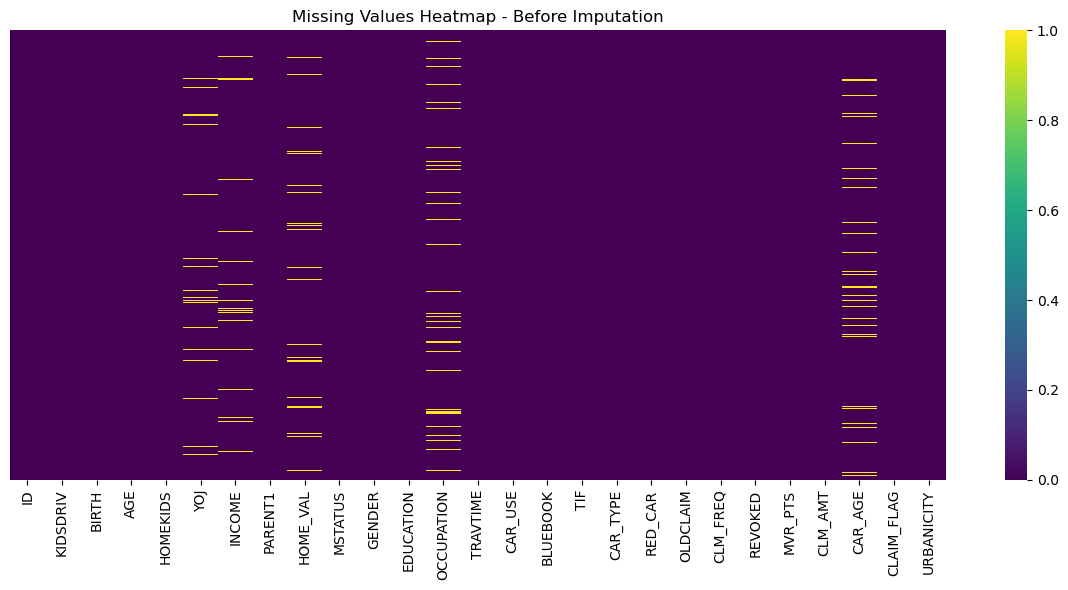


Missing Value Percentages Before Imputation:
        Column  Missing_Percentage
12  OCCUPATION            6.455684
24     CAR_AGE            6.203281
8     HOME_VAL            5.581982
6       INCOME            5.533443
5          YOJ            5.319872
3          AGE            0.067955


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

def analyze_missing_values(df, title):
    """
    Create missing value heatmap and store missing value percentages
    """
    # Calculate missing value percentages
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Create heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title(f'Missing Values Heatmap - {title}')
    plt.tight_layout()
    plt.show()
    
    # Store missing value info in DataFrame
    missing_info = pd.DataFrame({
        'Column': missing_percentages.index,
        'Missing_Percentage': missing_percentages.values
    })
    missing_info = missing_info[missing_info['Missing_Percentage'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )
    
    return missing_info

# Create copy of cleaned insurance data
insurance_missing = insurance_clean.copy()

# Analyze missing values before imputation
missing_before = analyze_missing_values(insurance_missing, "Before Imputation")
print("\nMissing Value Percentages Before Imputation:")
print(missing_before)

Part 2: Missing Value Imputation

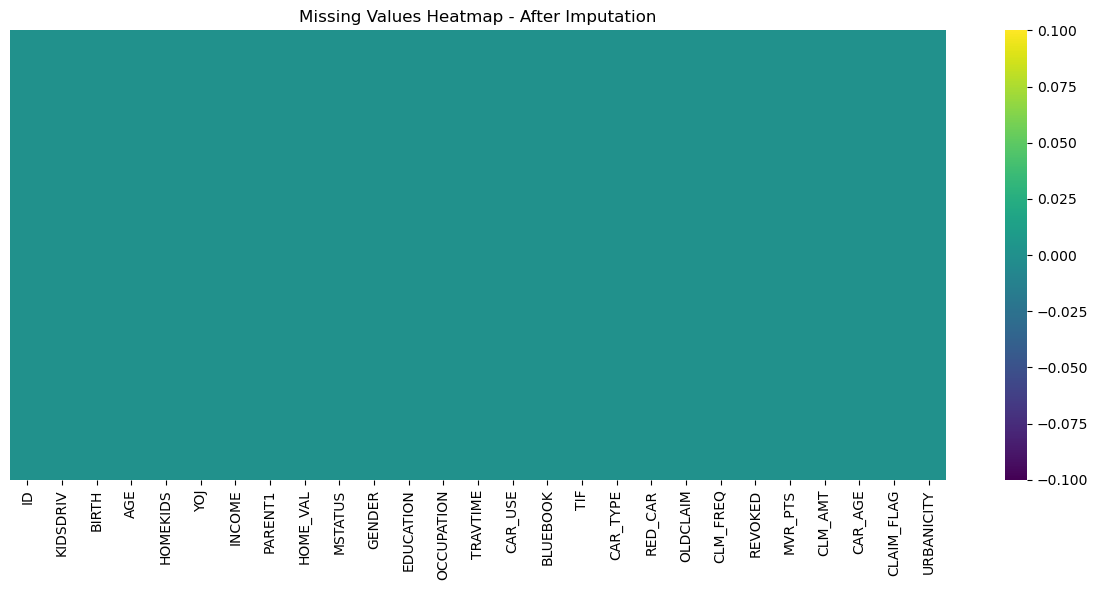


Missing Value Percentages After Imputation:
Empty DataFrame
Columns: [Column, Missing_Percentage]
Index: []

Verification - Missing Values Count:
Before: 3004
After: 0


In [43]:
def impute_missing_values(df):
    """
    Impute missing values using various techniques
    """
    df_imputed = df.copy()
    
    # 1. Simple imputation for AGE (small number of missing values)
    df_imputed['AGE'] = df_imputed['AGE'].fillna(df_imputed['AGE'].median())
    
    # 2. Mode imputation for categorical
    df_imputed['OCCUPATION'] = df_imputed['OCCUPATION'].fillna(df_imputed['OCCUPATION'].mode()[0])
    
    # 3. Prepare data for KNN imputation of numerical values
    numerical_cols = ['YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']
    
    # Create subset of features for KNN
    knn_features = ['AGE', 'HOMEKIDS', 'CLM_FREQ', 'MVR_PTS', 'TIF'] + numerical_cols
    
    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=5)
    
    # Prepare data for KNN (handle non-numeric values in INCOME and HOME_VAL)
    df_num = df_imputed[knn_features].copy()
    df_num['INCOME'] = pd.to_numeric(df_num['INCOME'].fillna(0))
    df_num['HOME_VAL'] = pd.to_numeric(df_num['HOME_VAL'].fillna(0))
    
    # Perform KNN imputation
    imputed_values = imputer.fit_transform(df_num)
    
    # Update original dataframe with imputed values
    df_imputed[numerical_cols] = pd.DataFrame(
        imputed_values, 
        columns=knn_features, 
        index=df_imputed.index
    )[numerical_cols]
    
    return df_imputed

# Perform imputation
insurance_imputed = impute_missing_values(insurance_missing)

# Analyze missing values after imputation
missing_after = analyze_missing_values(insurance_imputed, "After Imputation")
print("\nMissing Value Percentages After Imputation:")
print(missing_after)

# Store both DataFrames for comparison
insurance_before_imputation = insurance_missing.copy()
insurance_after_imputation = insurance_imputed.copy()

# Print verification
print("\nVerification - Missing Values Count:")
print("Before:", insurance_before_imputation.isnull().sum().sum())
print("After:", insurance_after_imputation.isnull().sum().sum())

<span style="color: #2E75B6; font-size: 28px;">Adding Missing Values and Handling Missing Values in Vehicle Features Dataset 📊</span>

 <span style="color: #2E75B6; font-size: 20px;">Part 1: Adding Missing Values and Initial Analysis</span>

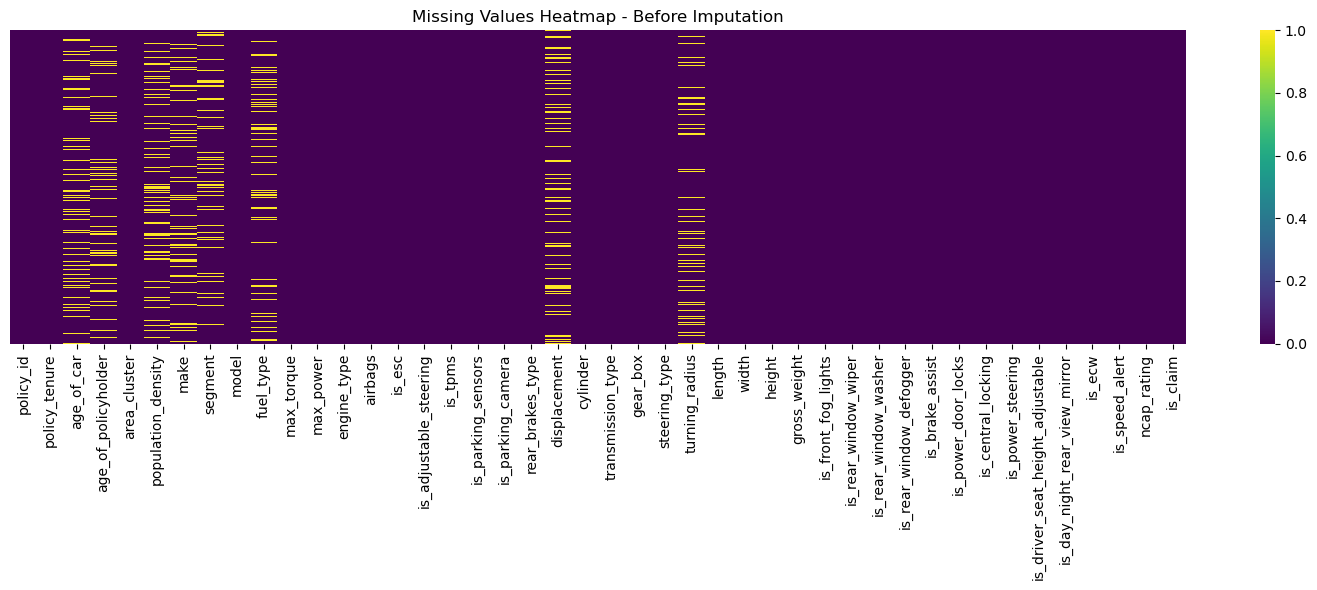


Missing Value Percentages Before Imputation:
                 Column  Missing_Percentage
7               segment           15.246109
6                  make           15.208561
2            age_of_car           14.978154
9             fuel_type           14.967914
25       turning_radius           14.938900
20         displacement           14.933779
5    population_density           14.932073
3   age_of_policyholder           14.715319


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

def introduce_missing_values(df, columns_to_nullify, missing_percentage=0.1):
    """
    Introduce missing values to specified columns
    """
    df_with_missing = df.copy()
    
    for column in columns_to_nullify:
        mask = np.random.random(len(df)) < missing_percentage
        df_with_missing.loc[mask, column] = np.nan
    
    return df_with_missing

def analyze_missing_values(df, title):
    """
    Create missing value heatmap and store missing value percentages
    """
    # Calculate missing percentages
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Create heatmap
    plt.figure(figsize=(15, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title(f'Missing Values Heatmap - {title}')
    plt.tight_layout()
    plt.show()
    
    # Store missing value info
    missing_info = pd.DataFrame({
        'Column': missing_percentages.index,
        'Missing_Percentage': missing_percentages.values
    })
    missing_info = missing_info[missing_info['Missing_Percentage'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )
    
    return missing_info

# Create copy of cleaned features data
features_complete = features_clean.copy()

# Introduce missing values to selected columns
columns_to_nullify = [
    'age_of_car', 
    'age_of_policyholder',
    'population_density',
    'displacement',
    'turning_radius',
    'make',
    'segment',
    'fuel_type'
]

features_missing = introduce_missing_values(
    features_complete, 
    columns_to_nullify, 
    missing_percentage=0.15
)

# Analyze missing values before imputation
missing_before = analyze_missing_values(features_missing, "Before Imputation")
print("\nMissing Value Percentages Before Imputation:")
print(missing_before)

 <span style="color: #2E75B6; font-size: 20px;">Part 2: Missing Value Imputation</span>

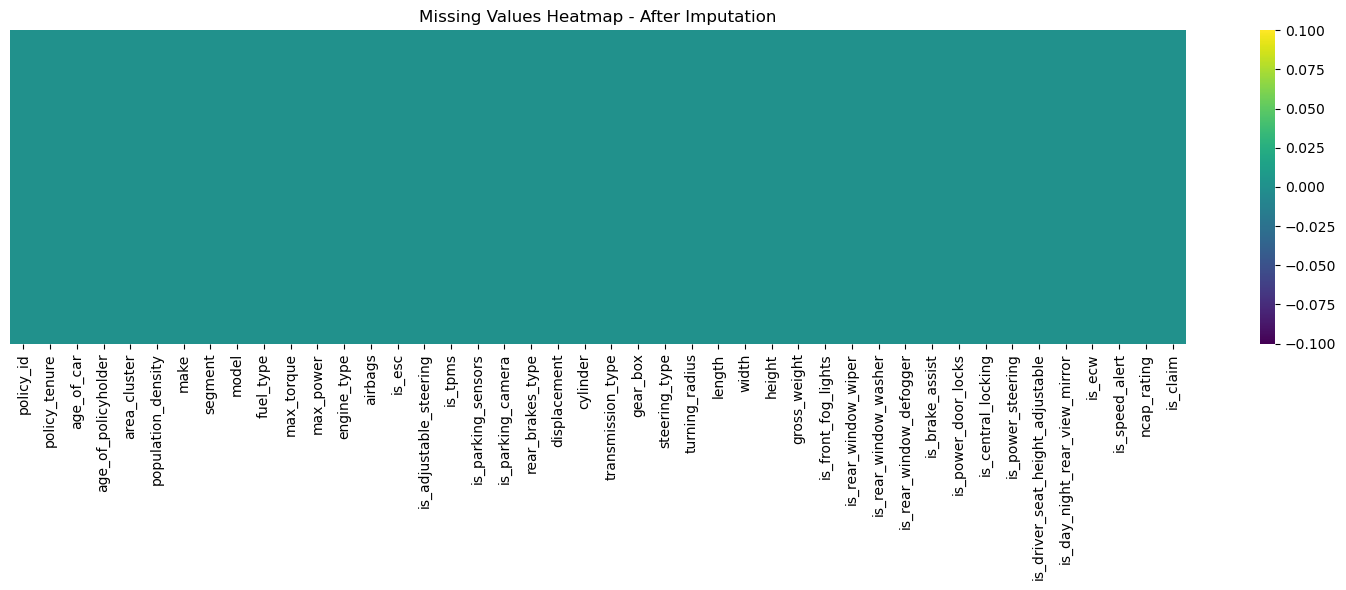


Missing Value Percentages After Imputation:
Empty DataFrame
Columns: [Column, Missing_Percentage]
Index: []

Verification - Missing Values Count:
Before: 70264
After: 0

Statistical Comparison for Numerical Columns:

age_of_car:
Before Imputation: count    49816.000000
mean         0.069384
std          0.056592
min          0.000000
25%          0.020000
50%          0.060000
75%          0.110000
max          1.000000
Name: age_of_car, dtype: float64
After Imputation: count    58592.000000
mean         0.069289
std          0.053827
min          0.000000
25%          0.020000
50%          0.060000
75%          0.106000
max          1.000000
Name: age_of_car, dtype: float64

age_of_policyholder:
Before Imputation: count    49970.000000
mean         0.469644
std          0.123039
min          0.288462
25%          0.365385
50%          0.451923
75%          0.548077
max          0.971154
Name: age_of_policyholder, dtype: float64
After Imputation: count    58592.000000
mean         0.4

In [45]:
def impute_missing_values(df):
    """
    Impute missing values using various techniques
    """
    df_imputed = df.copy()
    
    # 1. Mode imputation for categorical columns
    categorical_cols = ['segment', 'fuel_type']
    for col in categorical_cols:
        df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mode()[0])
    
    # 2. Prepare numerical columns for KNN imputation
    numerical_cols = [
        'age_of_car', 'age_of_policyholder', 'population_density',
        'displacement', 'turning_radius', 'make'
    ]
    
    # Additional features for KNN
    knn_features = numerical_cols + [
        'policy_tenure', 'airbags', 'cylinder', 
        'gear_box', 'length', 'width', 'height'
    ]
    
    # Initialize KNN imputer
    imputer = KNNImputer(n_neighbors=5)
    
    # Perform KNN imputation
    df_num = df_imputed[knn_features]
    imputed_values = imputer.fit_transform(df_num)
    
    # Update original dataframe with imputed values
    df_imputed[numerical_cols] = pd.DataFrame(
        imputed_values, 
        columns=knn_features, 
        index=df_imputed.index
    )[numerical_cols]
    
    return df_imputed

# Perform imputation
features_imputed = impute_missing_values(features_missing)

# Analyze missing values after imputation
missing_after = analyze_missing_values(features_imputed, "After Imputation")
print("\nMissing Value Percentages After Imputation:")
print(missing_after)

# Store both DataFrames for comparison
features_before_imputation = features_missing.copy()
features_after_imputation = features_imputed.copy()

# Print verification
print("\nVerification - Missing Values Count:")
print("Before:", features_before_imputation.isnull().sum().sum())
print("After:", features_after_imputation.isnull().sum().sum())

# Statistical comparison before and after imputation
print("\nStatistical Comparison for Numerical Columns:")
numerical_cols = ['age_of_car', 'age_of_policyholder', 'population_density', 
                 'displacement', 'turning_radius', 'make']

for col in numerical_cols:
    print(f"\n{col}:")
    print("Before Imputation:", features_before_imputation[col].describe())
    print("After Imputation:", features_after_imputation[col].describe())

<span style="color: #2E75B6; font-size: 28px;">Missing Value Analysis & Imputation for Vehicle Maintenance Dataset 📊</span>

 <span style="color: #2E75B6; font-size: 20px;">Part 1: Missing Value Analysis and Visualization</span>

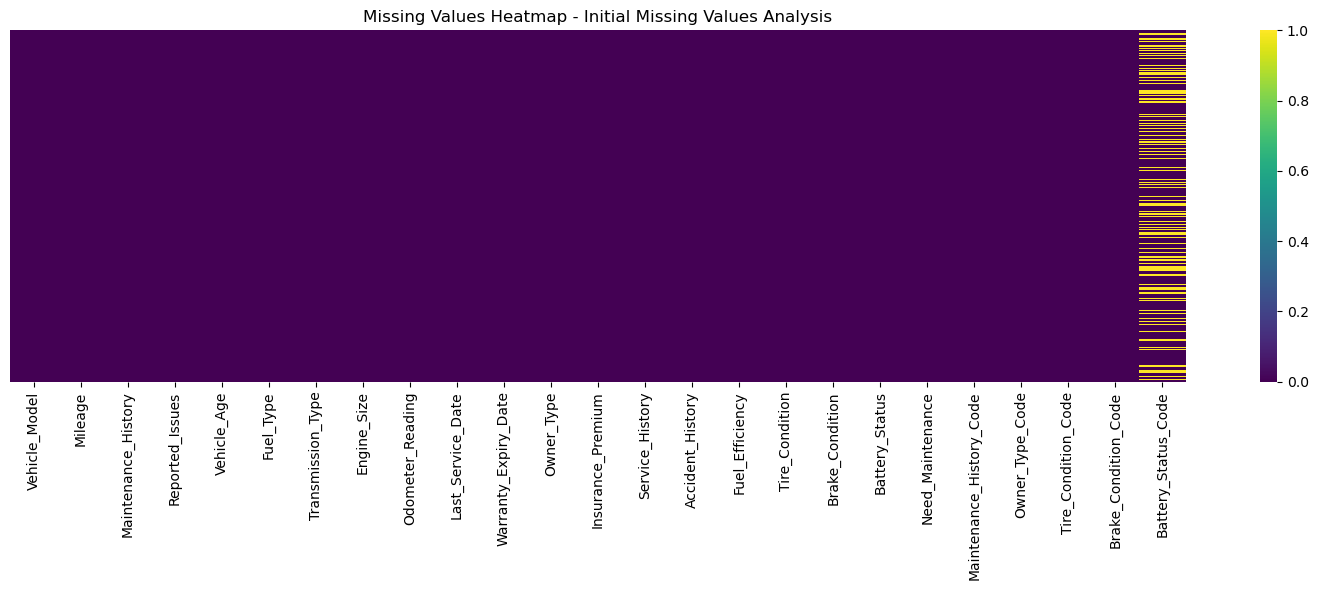


Missing Value Analysis:

Total number of missing values: 16657

Missing values by column:
Battery_Status_Code: 16657 missing values (33.31%)

Data Distribution Summary:
        Mileage  Reported_Issues  Vehicle_Age  Engine_Size  Odometer_Reading  \
count  50000.00         50000.00     50000.00     50000.00          50000.00   
mean   54931.23             2.50         5.49      1556.29          75551.19   
min    30001.00             0.00         1.00       800.00           1001.00   
25%    42471.50             1.00         3.00      1000.00          38009.00   
50%    54810.00             2.00         5.00      1500.00          75598.50   
75%    67391.50             4.00         8.00      2000.00         112999.50   
max    80000.00             5.00        10.00      2500.00         149999.00   
std    14401.91             1.71         2.88       627.68          43088.11   

                Last_Service_Date           Warranty_Expiry_Date  \
count                       50000        

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

def analyze_missing_values(df, title):
    """
    Create missing value heatmap and store missing value percentages
    """
    # Calculate missing percentages
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    # Create heatmap
    plt.figure(figsize=(15, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title(f'Missing Values Heatmap - {title}')
    plt.tight_layout()
    plt.show()
    
    # Store missing value info
    missing_info = pd.DataFrame({
        'Column': missing_percentages.index,
        'Missing_Percentage': missing_percentages.values
    })
    missing_info = missing_info[missing_info['Missing_Percentage'] > 0].sort_values(
        'Missing_Percentage', ascending=False
    )
    
    return missing_info

# Create copy of cleaned maintenance data
maintenance_missing = maintenance_clean.copy()

# Analyze initial missing values
missing_before = analyze_missing_values(maintenance_missing, "Initial Missing Values Analysis")

# Print detailed missing value information
print("\nMissing Value Analysis:")
print("\nTotal number of missing values:", maintenance_missing.isnull().sum().sum())
print("\nMissing values by column:")
for column in maintenance_missing.columns:
    missing_count = maintenance_missing[column].isnull().sum()
    if missing_count > 0:
        print(f"{column}: {missing_count} missing values ({missing_count/len(maintenance_missing)*100:.2f}%)")

# Additional information about data distribution
print("\nData Distribution Summary:")
print(maintenance_missing.describe().round(2))

<span style="color: #2E75B6; font-size: 20px;">Part 2: Missing Value Imputation</span>

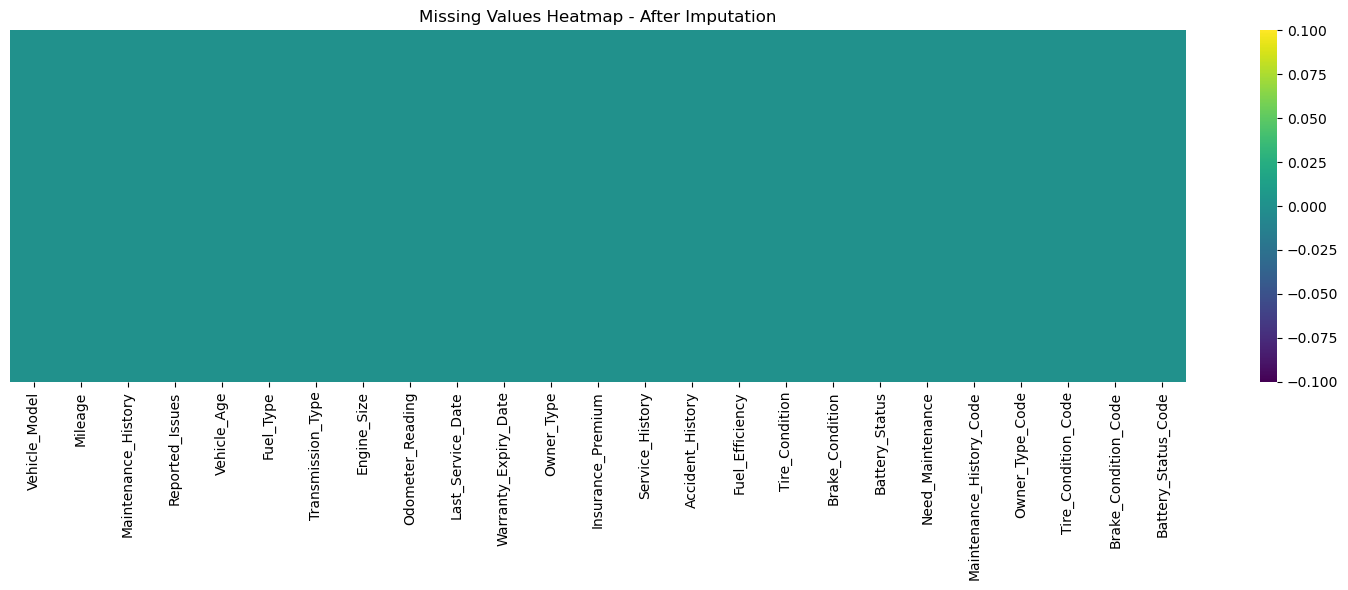


Missing Value Percentages After Imputation:
Empty DataFrame
Columns: [Column, Missing_Percentage]
Index: []

Verification - Missing Values Count:
Before: 16657
After: 0

Battery Status Code Distribution After Imputation:
Battery_Status_Code
1.0    0.50174
0.0    0.49826
Name: proportion, dtype: float64


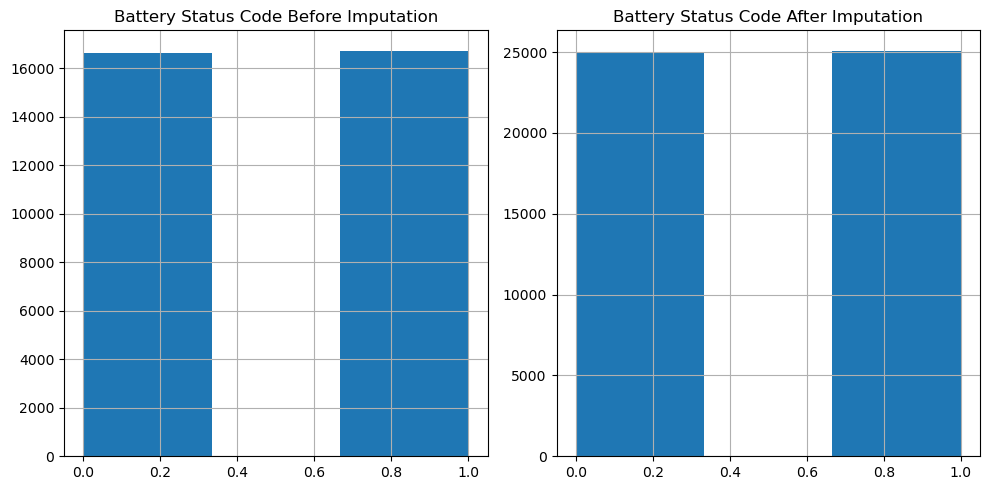

In [47]:
def impute_missing_values(df):
    """
    Impute missing values with focus on Battery_Status_Code
    """
    df_imputed = df.copy()
    
    # 1. KNN Imputation for Battery_Status_Code
    # Select features that might be relevant for battery status prediction
    features_for_battery = [
        'Vehicle_Age', 'Mileage', 'Maintenance_History_Code',
        'Service_History', 'Need_Maintenance',
        'Tire_Condition_Code', 'Brake_Condition_Code'
    ]
    
    # Prepare data for KNN
    impute_df = df_imputed[features_for_battery + ['Battery_Status_Code']].copy()
    
    # Initialize and fit KNN imputer
    imputer = KNNImputer(n_neighbors=5)
    imputed_values = imputer.fit_transform(impute_df)
    
    # Update the Battery_Status_Code with imputed values
    df_imputed['Battery_Status_Code'] = pd.DataFrame(
        imputed_values, 
        columns=features_for_battery + ['Battery_Status_Code'],
        index=df_imputed.index
    )['Battery_Status_Code']
    
    # Round the imputed values to nearest integer since it's a binary code (0 or 1)
    df_imputed['Battery_Status_Code'] = df_imputed['Battery_Status_Code'].round()
    
    return df_imputed

# Perform imputation
maintenance_imputed = impute_missing_values(maintenance_missing)

# Analyze missing values after imputation
missing_after = analyze_missing_values(maintenance_imputed, "After Imputation")
print("\nMissing Value Percentages After Imputation:")
print(missing_after)

# Store both DataFrames for comparison
maintenance_before_imputation = maintenance_missing.copy()
maintenance_after_imputation = maintenance_imputed.copy()

# Verification
print("\nVerification - Missing Values Count:")
print("Before:", maintenance_before_imputation['Battery_Status_Code'].isnull().sum())
print("After:", maintenance_after_imputation['Battery_Status_Code'].isnull().sum())

# Distribution analysis
print("\nBattery Status Code Distribution After Imputation:")
print(maintenance_after_imputation['Battery_Status_Code'].value_counts(normalize=True))

# Create comparison plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
maintenance_before_imputation['Battery_Status_Code'].hist(bins=3)
plt.title('Battery Status Code Before Imputation')

plt.subplot(1, 2, 2)
maintenance_after_imputation['Battery_Status_Code'].hist(bins=3)
plt.title('Battery Status Code After Imputation')
plt.tight_layout()
plt.show()

<span style="color: #2E75B6; font-size: 28px;">Analyzing Insurance Dataset for Encoding & Scaling 📊</span>

In [48]:
import pandas as pd
import numpy as np

# Using the insurance dataset after imputation
insurance_df = insurance_after_imputation.copy()

def analyze_categorical_columns(df):
    """
    Analyze categorical columns in detail
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    print("\n=== Categorical Columns Analysis ===")
    print("\nNumber of unique values in each categorical column:")
    print(df[categorical_columns].nunique())
    
    print("\nDetailed value counts for each categorical column:")
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[col].value_counts(normalize=True).multiply(100).round(2))

def analyze_numerical_columns(df):
    """
    Analyze numerical columns in detail
    """
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    print("\n=== Numerical Columns Analysis ===")
    print("\nDescriptive statistics for numerical columns:")
    print(df[numerical_columns].describe())

# General dataset information
print("=== General Dataset Information ===")
print(insurance_df.info())

# Analyze categorical columns
analyze_categorical_columns(insurance_df)

# Analyze numerical columns
analyze_numerical_columns(insurance_df)

# Store column types for encoding/scaling
categorical_cols = insurance_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\n=== Columns for Encoding/Scaling ===")
print("\nCategorical columns for encoding:")
for col in categorical_cols:
    print(f"{col}: {insurance_df[col].nunique()} unique values")

print("\nNumerical columns for scaling:")
for col in numerical_cols:
    print(f"{col}: range [{insurance_df[col].min()}, {insurance_df[col].max()}]")

=== General Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
Index: 10301 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10301 non-null  int64         
 1   KIDSDRIV    10301 non-null  int64         
 2   BIRTH       10301 non-null  datetime64[ns]
 3   AGE         10301 non-null  float64       
 4   HOMEKIDS    10301 non-null  int64         
 5   YOJ         10301 non-null  float64       
 6   INCOME      10301 non-null  float64       
 7   PARENT1     10301 non-null  int64         
 8   HOME_VAL    10301 non-null  float64       
 9   MSTATUS     10301 non-null  object        
 10  GENDER      10301 non-null  object        
 11  EDUCATION   10301 non-null  object        
 12  OCCUPATION  10301 non-null  object        
 13  TRAVTIME    10301 non-null  int64         
 14  CAR_USE     10301 non-null  object        
 15  BLUEBOOK    10301 non-null  float64    

<span style="color: #2E75B6; font-size: 28px;">Analyzing Vehicle Features Dataset for Encoding & Scaling 🚗</span>

In [49]:
import pandas as pd
import numpy as np

# Using the features dataset after handling missingness
features_df = features_after_imputation.copy()

def analyze_dataset_for_encoding(df, dataset_name):
    """
    Comprehensive analysis of columns for encoding and scaling decisions
    """
    print(f"\n{'='*20} {dataset_name} Analysis {'='*20}")
    
    # General dataset info
    print("\n=== General Dataset Information ===")
    print(df.info())
    
    # Analyze nominal categorical columns
    nominal_cols = ['segment', 'model', 'fuel_type', 'engine_type', 
                   'transmission_type', 'steering_type', 'area_cluster']
    print("\n=== Nominal Categorical Columns Analysis ===")
    for col in nominal_cols:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")
        print("Value counts:")
        print(df[col].value_counts(normalize=True).multiply(100).round(2))
    
    # Analyze ordinal columns (binary 'is_' columns)
    ordinal_cols = [col for col in df.columns if col.startswith('is_')]
    print("\n=== Ordinal/Binary Columns Analysis ===")
    for col in ordinal_cols:
        print(f"\n{col}:")
        print(df[col].value_counts(normalize=True).multiply(100).round(2))
    
    # Analyze numeric columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in ordinal_cols]
    print("\n=== Numeric Columns Analysis ===")
    print("\nDescriptive statistics:")
    print(df[numeric_cols].describe())

# Run analysis
analyze_dataset_for_encoding(features_df, "Vehicle Features Dataset")


==================== Vehicle Features Dataset Analysis ====================

=== General Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  float64
 6   make                              58592 non-null  float64
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque      

<span style="color: #2E75B6; font-size: 28px;">Analysing Vehicle Maintenance Dataset for Encoding & Scaling 🔧</span>

In [50]:
import pandas as pd
import numpy as np

# Using the maintenance dataset after handling missingness
maintenance_df = maintenance_after_imputation.copy()

def analyze_dataset_for_encoding(df, dataset_name):
    """
    Comprehensive analysis of columns for encoding and scaling decisions
    """
    print(f"\n{'='*20} {dataset_name} Analysis {'='*20}")
    
    # General dataset info
    print("\n=== General Dataset Information ===")
    print(df.info())
    
    # Analyze nominal categorical columns
    nominal_cols = ['Vehicle_Model', 'Fuel_Type', 'Transmission_Type']
    print("\n=== Nominal Categorical Columns Analysis ===")
    for col in nominal_cols:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")
        print("Value counts:")
        print(df[col].value_counts(normalize=True).multiply(100).round(2))
    
    # Analyze ordinal categorical columns
    ordinal_cols = ['Maintenance_History', 'Owner_Type', 
                    'Tire_Condition', 'Brake_Condition', 'Battery_Status']
    print("\n=== Ordinal Categorical Columns Analysis ===")
    for col in ordinal_cols:
        print(f"\n{col}:")
        print(f"Unique values: {df[col].nunique()}")
        print("Value counts:")
        print(df[col].value_counts(normalize=True).multiply(100).round(2))
    
    # Analyze numeric columns
    numeric_cols = ['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size',
                   'Odometer_Reading', 'Insurance_Premium', 'Service_History',
                   'Accident_History', 'Fuel_Efficiency']
    print("\n=== Numeric Columns Analysis ===")
    print("\nDescriptive statistics:")
    print(df[numeric_cols].describe())
    
    # Analyze datetime columns
    date_cols = ['Last_Service_Date', 'Warranty_Expiry_Date']
    print("\n=== Date Columns Analysis ===")
    for col in date_cols:
        print(f"\n{col}:")
        print(f"Date range: {df[col].min()} to {df[col].max()}")

# Run analysis
analyze_dataset_for_encoding(maintenance_df, "Vehicle Maintenance Dataset")


==================== Vehicle Maintenance Dataset Analysis ====================

=== General Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Vehicle_Model             50000 non-null  object        
 1   Mileage                   50000 non-null  int64         
 2   Maintenance_History       50000 non-null  object        
 3   Reported_Issues           50000 non-null  int64         
 4   Vehicle_Age               50000 non-null  int64         
 5   Fuel_Type                 50000 non-null  object        
 6   Transmission_Type         50000 non-null  object        
 7   Engine_Size               50000 non-null  int64         
 8   Odometer_Reading          50000 non-null  int64         
 9   Last_Service_Date         50000 non-null  datetime64[ns]
 10  Warranty_Expiry_Date     

<span style="color: #2E75B6; font-size: 28px;">Encoding and Scaling Insurance Dataset 🔄</span>

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder

def encode_and_scale_insurance_data(df):
    """
    Encode categorical variables and scale numerical variables with ordinal encoding for education and occupation
    """
    df_transformed = df.copy()
    
    # 1. Binary Encoding
    binary_cols = ['MSTATUS', 'GENDER', 'CAR_USE', 'URBANICITY']
    label_encoder = LabelEncoder()
    
    for col in binary_cols:
        df_transformed[col] = label_encoder.fit_transform(df[col])
    
    # 2. Ordinal Encoding for Education
    education_order = ['<High School', 'z_High School', 'Bachelors', 'Masters', 'PhD']
    education_encoder = OrdinalEncoder(categories=[education_order])
    df_transformed['EDUCATION'] = education_encoder.fit_transform(df[['EDUCATION']])
    
    # 3. Ordinal Encoding for Occupation
    occupation_order = ['Student', 'Home Maker', 'z_Blue Collar', 'Clerical', 
                       'Professional', 'Manager', 'Lawyer', 'Doctor']
    occupation_encoder = OrdinalEncoder(categories=[occupation_order])
    df_transformed['OCCUPATION'] = occupation_encoder.fit_transform(df[['OCCUPATION']])
    
    # 4. One-Hot Encoding for CAR_TYPE
    df_transformed = pd.get_dummies(
        df_transformed, 
        columns=['CAR_TYPE'],
        prefix=['CAR_TYPE'],
        drop_first=True
    )
    
    # 5. Scaling Numerical Variables
    nums_to_scale = [
        'AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 
        'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT', 'CAR_AGE'
    ]
    
    scaler = StandardScaler()
    df_transformed[nums_to_scale] = scaler.fit_transform(df_transformed[nums_to_scale])
    
    # 6. Columns to keep as is
    cols_as_is = [
        'ID', 'KIDSDRIV', 'HOMEKIDS', 'PARENT1', 'TIF', 
        'RED_CAR', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLAIM_FLAG'
    ]
    
    return df_transformed, scaler, education_encoder, occupation_encoder, label_encoder

# Apply transformations
insurance_transformed, scaler, education_encoder, occupation_encoder, label_encoder = encode_and_scale_insurance_data(insurance_df)

# Verify the transformations
print("\n=== Transformation Summary ===")
print(f"Original shape: {insurance_df.shape}")
print(f"Transformed shape: {insurance_transformed.shape}")

print("\nSample of transformed education values:")
print("Original -> Encoded")
for i, level in enumerate(education_encoder.categories_[0]):
    print(f"{level} -> {i}")

print("\nSample of transformed occupation values:")
print("Original -> Encoded")
for i, level in enumerate(occupation_encoder.categories_[0]):
    print(f"{level} -> {i}")

print("\nTransformed columns:")
print(insurance_transformed.columns.tolist())

# Store transformed dataset
insurance_encoded = insurance_transformed.copy()


=== Transformation Summary ===
Original shape: (10301, 27)
Transformed shape: (10301, 31)

Sample of transformed education values:
Original -> Encoded
<High School -> 0
z_High School -> 1
Bachelors -> 2
Masters -> 3
PhD -> 4

Sample of transformed occupation values:
Original -> Encoded
Student -> 0
Home Maker -> 1
z_Blue Collar -> 2
Clerical -> 3
Professional -> 4
Manager -> 5
Lawyer -> 6
Doctor -> 7

Transformed columns:
['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van']


<span style="color: #2E75B6; font-size: 28px;">Encoding and Scaling Vehicle Features Dataset 🔄</span>

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

def encode_and_scale_features_data(df):
    """
    Encode categorical variables and scale numerical variables for vehicle features dataset
    """
    df_transformed = df.copy()
    
    # 1. Drop high cardinality columns
    columns_to_drop = ['model', 'engine_type', 'area_cluster']
    df_transformed = df_transformed.drop(columns=columns_to_drop)
    
    # 2. One-Hot Encoding for nominal categorical variables
    nominal_cols = ['segment', 'fuel_type', 'transmission_type', 
                   'steering_type', 'rear_brakes_type']
    
    df_encoded = pd.get_dummies(
        df_transformed, 
        columns=nominal_cols,
        drop_first=True,
        prefix=nominal_cols
    )
    
    # 3. Binary columns already encoded (is_ columns)
    binary_cols = [col for col in df_encoded.columns if col.startswith('is_')]
    
    # 4. Scale numeric columns
    numeric_cols = [
        'policy_tenure', 'age_of_car', 'age_of_policyholder',
        'population_density', 'make', 'displacement', 'turning_radius',
        'length', 'width', 'height', 'gross_weight'
    ]
    
    scaler = StandardScaler()
    df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
    
    # 5. Keep these columns as is
    cols_as_is = ['policy_id', 'airbags', 'cylinder', 'gear_box', 
                  'ncap_rating', 'is_claim'] + binary_cols
    
    return df_encoded, scaler

# Apply transformations
features_transformed, scaler = encode_and_scale_features_data(features_df)

# Verification prints
print("\n=== Transformation Summary ===")
print(f"Original shape: {features_df.shape}")
print(f"Transformed shape: {features_transformed.shape}")

# Display columns in categories
print("\nColumns in transformed dataset by type:")

print("\nNumeric (Scaled) columns:")
numeric_cols = features_transformed.select_dtypes(include=['float64']).columns
print(numeric_cols.tolist())

print("\nBinary columns:")
binary_cols = [col for col in features_transformed.columns if col.startswith('is_')]
print(binary_cols)

print("\nOne-Hot encoded columns:")
encoded_cols = [col for col in features_transformed.columns 
               if any(col.startswith(prefix) for prefix in ['segment_', 'fuel_type_', 
                                                          'transmission_type_', 'steering_type_',
                                                          'rear_brakes_type_'])]
print(encoded_cols)

# Store transformed dataset
features_encoded = features_transformed.copy()


=== Transformation Summary ===
Original shape: (58592, 44)
Transformed shape: (58592, 47)

Columns in transformed dataset by type:

Numeric (Scaled) columns:
['policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'displacement', 'turning_radius', 'length', 'width', 'height', 'gross_weight']

Binary columns:
['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'is_claim']

One-Hot encoded columns:
['segment_B1', 'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility', 'fuel_type_Diesel', 'fuel_type_Petrol', 'transmission_type_Manual', 'steering_type_Manual', 'steering_type_Power', 'rear_brakes_type_Drum']


<span style="color: #2E75B6; font-size: 28px;">Encoding and Scaling Vehicle Maintenance Dataset 🔄</span>

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from datetime import datetime

def encode_and_scale_maintenance_data(df):
    """
    Encode categorical variables and scale numerical variables for vehicle maintenance dataset
    """
    df_transformed = df.copy()
    
    # 1. Fix Battery Status encoding first
    battery_status_order = ['Weak', 'Good', 'New']
    encoder = OrdinalEncoder(categories=[battery_status_order])
    df_transformed['Battery_Status_Code'] = encoder.fit_transform(
        df_transformed[['Battery_Status']]
    )
    
    # 2. Drop original categorical columns that are already encoded
    columns_to_drop = [
        'Maintenance_History', 'Owner_Type', 'Tire_Condition',
        'Brake_Condition', 'Battery_Status'
    ]
    df_transformed = df_transformed.drop(columns=columns_to_drop)
    
    # 3. One-Hot Encoding for nominal categorical variables
    nominal_cols = ['Vehicle_Model', 'Fuel_Type', 'Transmission_Type']
    df_encoded = pd.get_dummies(
        df_transformed, 
        columns=nominal_cols,
        drop_first=True,
        prefix=nominal_cols
    )
    
    # 4. Transform date columns to numeric features
    current_date = pd.Timestamp('2024-03-01')  # Using a reference date
    
    # Days since last service
    df_encoded['days_since_service'] = (
        current_date - df_encoded['Last_Service_Date']
    ).dt.days
    
    # Days until warranty expires
    df_encoded['days_until_warranty_expires'] = (
        df_encoded['Warranty_Expiry_Date'] - current_date
    ).dt.days
    
    # Drop original date columns
    df_encoded = df_encoded.drop(['Last_Service_Date', 'Warranty_Expiry_Date'], axis=1)
    
    # 5. Scale numeric columns
    numeric_cols = [
        'Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size',
        'Odometer_Reading', 'Insurance_Premium', 'Service_History',
        'Accident_History', 'Fuel_Efficiency', 'days_since_service',
        'days_until_warranty_expires'
    ]
    
    scaler = StandardScaler()
    df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
    
    # 6. Keep coded columns as is
    coded_cols = [
        'Maintenance_History_Code', 'Owner_Type_Code', 
        'Tire_Condition_Code', 'Brake_Condition_Code',
        'Battery_Status_Code', 'Need_Maintenance'
    ]
    
    return df_encoded, scaler, encoder

# Apply transformations
maintenance_transformed, scaler, battery_encoder = encode_and_scale_maintenance_data(maintenance_df)

# Verification prints
print("\n=== Transformation Summary ===")
print(f"Original shape: {maintenance_df.shape}")
print(f"Transformed shape: {maintenance_transformed.shape}")

# Verify Battery Status encoding
print("\n=== Battery Status Encoding Verification ===")
print("Battery Status Code mapping:")
for i, status in enumerate(['Weak', 'Good', 'New']):
    print(f"{status}: {i}")

# Display columns by category
print("\nColumns in transformed dataset by type:")

print("\nNumeric (Scaled) columns:")
numeric_cols = maintenance_transformed.select_dtypes(include=['float64']).columns
print(numeric_cols.tolist())

print("\nEncoded categorical columns:")
categorical_cols = [col for col in maintenance_transformed.columns 
                   if any(col.startswith(prefix) 
                         for prefix in ['Vehicle_Model_', 'Fuel_Type_', 'Transmission_Type_'])]
print(categorical_cols)

print("\nCode columns (kept as is):")
code_cols = [col for col in maintenance_transformed.columns if col.endswith('_Code')]
print(code_cols)

# Show sample of code columns
print("\n=== Sample of Code Columns (First 5 rows) ===")
print(maintenance_transformed[code_cols].head())

# Store transformed dataset
maintenance_encoded = maintenance_transformed.copy()


=== Transformation Summary ===
Original shape: (50000, 25)
Transformed shape: (50000, 25)

=== Battery Status Encoding Verification ===
Battery Status Code mapping:
Weak: 0
Good: 1
New: 2

Columns in transformed dataset by type:

Numeric (Scaled) columns:
['Mileage', 'Reported_Issues', 'Vehicle_Age', 'Engine_Size', 'Odometer_Reading', 'Insurance_Premium', 'Service_History', 'Accident_History', 'Fuel_Efficiency', 'Battery_Status_Code', 'days_since_service', 'days_until_warranty_expires']

Encoded categorical columns:
['Vehicle_Model_Car', 'Vehicle_Model_Motorcycle', 'Vehicle_Model_SUV', 'Vehicle_Model_Truck', 'Vehicle_Model_Van', 'Fuel_Type_Electric', 'Fuel_Type_Petrol', 'Transmission_Type_Manual']

Code columns (kept as is):
['Maintenance_History_Code', 'Owner_Type_Code', 'Tire_Condition_Code', 'Brake_Condition_Code', 'Battery_Status_Code']

=== Sample of Code Columns (First 5 rows) ===
   Maintenance_History_Code  Owner_Type_Code  Tire_Condition_Code  \
0                         2   

<span style="color: #2E75B6; font-size: 28px;">Checking and Removing Duplicates (Post-Encoding) 🔍</span>

In [54]:
# Using datasets after encoding and scaling
def check_and_remove_duplicates(df, dataset_name):
    """
    Check for duplicates and remove them if they exist
    """
    # Check for duplicates
    n_duplicates = df.duplicated().sum()
    
    print(f"\n=== {dataset_name} Duplicates Analysis ===")
    print(f"Number of duplicates found: {n_duplicates}")
    
    if n_duplicates > 0:
        # Remove duplicates and store in new dataframe
        df_no_duplicates = df.drop_duplicates()
        print(f"Shape before removing duplicates: {df.shape}")
        print(f"Shape after removing duplicates: {df_no_duplicates.shape}")
        return df_no_duplicates
    else:
        print("No duplicates found. Dataset remains unchanged.")
        return df

# 1. Insurance Dataset
insurance_final = check_and_remove_duplicates(insurance_encoded, "Insurance Dataset")

# 2. Vehicle Features Dataset
features_final = check_and_remove_duplicates(features_encoded, "Vehicle Features Dataset")

# 3. Vehicle Maintenance Dataset
maintenance_final = check_and_remove_duplicates(maintenance_encoded, "Vehicle Maintenance Dataset")

# Final verification print
print("\n=== Final Dataset Shapes ===")
print(f"Insurance Dataset: {insurance_final.shape}")
print(f"Vehicle Features Dataset: {features_final.shape}")
print(f"Vehicle Maintenance Dataset: {maintenance_final.shape}")

# Store final versions
insurance_final_df = insurance_final.copy()
features_final_df = features_final.copy()
maintenance_final_df = maintenance_final.copy()


=== Insurance Dataset Duplicates Analysis ===
Number of duplicates found: 0
No duplicates found. Dataset remains unchanged.

=== Vehicle Features Dataset Duplicates Analysis ===
Number of duplicates found: 0
No duplicates found. Dataset remains unchanged.

=== Vehicle Maintenance Dataset Duplicates Analysis ===
Number of duplicates found: 0
No duplicates found. Dataset remains unchanged.

=== Final Dataset Shapes ===
Insurance Dataset: (10301, 31)
Vehicle Features Dataset: (58592, 47)
Vehicle Maintenance Dataset: (50000, 25)


<span style="color: #2E75B6; font-size: 28px;">Data Integration Process Documentation 📊</span>

Overview
The data integration process combines three datasets: Insurance Claims, Vehicle Features, and Vehicle Maintenance, using a hybrid probabilistic matching approach with the Insurance dataset as the base.
1. Base Selection

Primary Dataset: Insurance Claims (10,301 records)
Supporting Datasets:

Vehicle Features (58,592 records)
Vehicle Maintenance (50,000 records)



2. Matching Features and Weights
Features Dataset Matching (Total: 100%)

Primary Features (60%)

CAR_TYPE/segment (25%)
FUEL_TYPE (20%)
CAR_AGE (15%)


Secondary Features (40%)

CAR_USE (15%)
BLUEBOOK value (10%)
URBANICITY (10%)
TIF (Time in Force) (5%)



Maintenance Dataset Matching (Total: 100%)

Primary Features (60%)

CAR_TYPE/Vehicle_Model (25%)
FUEL_TYPE (20%)
CAR_AGE (15%)


Secondary Features (40%)

ENGINE_SIZE (15%)
MILEAGE (10%)
SERVICE_HISTORY (10%)
TRANSMISSION_TYPE (5%)



3. Integration Process

Similarity Calculation

Numeric features: Normalized difference calculation
Text features: Fuzzy matching using token sort ratio
Weighted combination of all feature similarities


Record Matching

Each insurance record matched with best candidates from other datasets
Match quality scores calculated for each pairing
Only matches above similarity threshold (0.7) retained


Quality Control

Track overall match quality
Monitor feature-specific matching scores
Remove duplicate columns
Preserve original insurance record integrity



4. Output Dataset

Base insurance records with matched features
Added match quality metrics
Feature-specific matching scores
Cleaned and deduplicated columns

5. Integration Benefits

Maintains data integrity
Preserves important relationships
Provides comprehensive vehicle profiles
Enables better risk assessment
Tracks match quality for transparency

This integration approach ensures high-quality matches while maintaining the integrity of our insurance claims analysis focus.

<span style="color: #2E75B6; font-size: 28px;">Dataset Size Reduction  📊</span>


In [55]:
def reduce_datasets(features_final_df, maintenance_final_df, insurance_final_df):
    """
    Reduce the size of features and maintenance datasets while preserving distributions
    """
    print("Original Dataset Sizes:")
    print(f"Insurance: {len(insurance_final_df):,} rows")
    print(f"Features: {len(features_final_df):,} rows")
    print(f"Maintenance: {len(maintenance_final_df):,} rows")
    
    # Target size: 2.0 times insurance dataset size
    target_size = len(insurance_final_df) * 2.0
    
    # 1. Reduce Features Dataset
    # Create positive weights using exponential of standardized age
    features_weights = np.exp(features_final_df['age_of_car'] - 
                            features_final_df['age_of_car'].min())
    
    features_reduced = features_final_df.sample(
        n=int(target_size),
        weights=features_weights,
        random_state=42
    )
    
    # 2. Reduce Maintenance Dataset
    # Create positive weights using vehicle age
    maintenance_weights = maintenance_final_df['Vehicle_Age'] - \
                        maintenance_final_df['Vehicle_Age'].min() + 1
    
    maintenance_reduced = maintenance_final_df.sample(
        n=int(target_size),
        weights=maintenance_weights,
        random_state=42
    )
    
    print("\nReduced Dataset Sizes:")
    print(f"Insurance: {len(insurance_final_df):,} rows (unchanged)")
    print(f"Features: {len(features_reduced):,} rows")
    print(f"Maintenance: {len(maintenance_reduced):,} rows")
    
    # Verify distributions are maintained
    print("\nVerifying Key Features Distribution:")
    
    # Features dataset checks
    print("\nFeatures Dataset - Key Metrics:")
    print("Original vs Reduced")
    for col in ['age_of_car', 'fuel_type_Petrol', 'transmission_type_Manual']:
        if col in features_final_df.columns:
            orig_mean = features_final_df[col].mean()
            reduced_mean = features_reduced[col].mean()
            print(f"{col}: {orig_mean:.3f} vs {reduced_mean:.3f}")
    
    # Maintenance dataset checks
    print("\nMaintenance Dataset - Key Metrics:")
    print("Original vs Reduced")
    for col in ['Vehicle_Age', 'Fuel_Type_Petrol', 'Transmission_Type_Manual']:
        if col in maintenance_final_df.columns:
            orig_mean = maintenance_final_df[col].mean()
            reduced_mean = maintenance_reduced[col].mean()
            print(f"{col}: {orig_mean:.3f} vs {reduced_mean:.3f}")
    
    return features_reduced, maintenance_reduced

# Import numpy if not already imported
import numpy as np

# Reduce datasets
features_reduced_df, maintenance_reduced_df = reduce_datasets(
    features_final_df,
    maintenance_final_df,
    insurance_final_df
)

# Store reduced datasets
features_final_reduced = features_reduced_df.copy()
maintenance_final_reduced = maintenance_reduced_df.copy()

# Print shape of reduced datasets
print("\nFinal Dataset Shapes:")
print(f"Features: {features_final_reduced.shape}")
print(f"Maintenance: {maintenance_final_reduced.shape}")

Original Dataset Sizes:
Insurance: 10,301 rows
Features: 58,592 rows
Maintenance: 50,000 rows

Reduced Dataset Sizes:
Insurance: 10,301 rows (unchanged)
Features: 20,602 rows
Maintenance: 20,602 rows

Verifying Key Features Distribution:

Features Dataset - Key Metrics:
Original vs Reduced
age_of_car: -0.000 vs 0.684
fuel_type_Petrol: 0.447 vs 0.505
transmission_type_Manual: 0.652 vs 0.580

Maintenance Dataset - Key Metrics:
Original vs Reduced
Vehicle_Age: 0.000 vs 0.314
Fuel_Type_Petrol: 0.334 vs 0.334
Transmission_Type_Manual: 0.500 vs 0.499

Final Dataset Shapes:
Features: (20602, 47)
Maintenance: (20602, 25)


Saving daatsets to csv

In [56]:
# Save the insurance_final_df DataFrame to a CSV file
insurance_final_df.to_csv('insurance_final_df.csv', index=False)
print("insurance_final_df saved to 'insurance_final_df.csv'")

# Save the features_final_reduced DataFrame to a CSV file
features_final_reduced.to_csv('features_final_reduced.csv', index=False)
print("features_final_reduced saved to 'features_final_reduced.csv'")

# Save the maintenance_final_reduced DataFrame to a CSV file
maintenance_final_reduced.to_csv('maintenance_final_reduced.csv', index=False)
print("maintenance_final_reduced saved to 'maintenance_final_reduced.csv'")

insurance_final_df saved to 'insurance_final_df.csv'
features_final_reduced saved to 'features_final_reduced.csv'
maintenance_final_reduced saved to 'maintenance_final_reduced.csv'


### Loading 3 datsets 

In [71]:
insurance_final_df = pd.read_csv('insurance_final_df.csv')
features_final_reduced = pd.read_csv('features_final_reduced.csv')
maintenance_final_reduced = pd.read_csv('maintenance_final_reduced.csv')

### Merging 3 daatsets based on Policy ID column

In [72]:
import pandas as pd
import numpy as np


# Define a function to add the 'policy_id_no' column with at least 10000 unique values
def add_policy_id(df, num_unique_ids=10000):
    """
    Adds a 'policy_id_no' column to the DataFrame with at least `num_unique_ids` unique values.
    """
    # Generate unique policy_id_no values and ensure they are sufficient
    unique_ids = np.random.choice(range(1, 2 * num_unique_ids), size=num_unique_ids, replace=False)
    
    # Extend the unique_ids to match the number of rows in the DataFrame
    policy_ids = np.tile(unique_ids, len(df) // num_unique_ids + 1)[:len(df)]
    
    # Assign the generated 'policy_id_no' values
    df['policy_id_no'] = policy_ids
    
    return df

# Add 'policy_id_no' to each dataset
insurance_final_df = add_policy_id(insurance_final_df)
features_final_reduced = add_policy_id(features_final_reduced)
maintenance_final_reduced = add_policy_id(maintenance_final_reduced)

# Check the first few rows of each dataset to ensure 'policy_id_no' is added correctly
print("Insurance dataset with 'policy_id_no':")
print(insurance_final_df[['policy_id_no']].head())

print("\nFeatures dataset with 'policy_id_no':")
print(features_final_reduced[['policy_id_no']].head())

print("\nMaintenance dataset with 'policy_id_no':")
print(maintenance_final_reduced[['policy_id_no']].head())

# Now you can merge the datasets based on 'policy_id_no'
merged_ins_features = insurance_final_df.merge(features_final_reduced, on='policy_id_no', how='inner')
merged_all = merged_ins_features.merge(maintenance_final_reduced, on='policy_id_no', how='inner')

# Check the shape of the final merged dataset
print("\nShape of final merged dataset:")
print(merged_all.shape)

# Optionally, save the final merged dataset
merged_all.to_csv('final_integrated_dataset.csv', index=False)
print("\nFinal integrated dataset saved as 'final_integrated_dataset.csv'")


Insurance dataset with 'policy_id_no':
   policy_id_no
0         15068
1         14049
2          9526
3          8719
4          4721

Features dataset with 'policy_id_no':
   policy_id_no
0          5302
1           269
2         19070
3          3855
4         13287

Maintenance dataset with 'policy_id_no':
   policy_id_no
0         10420
1         17661
2          4444
3         17051
4         14210

Shape of final merged dataset:
(10980, 104)

Final integrated dataset saved as 'final_integrated_dataset.csv'


### Removing Duplicates from Final Dataset

In [73]:
# Load the final integrated dataset
final_integrated_df = pd.read_csv('final_integrated_dataset.csv')

# Check the shape before removing duplicates
print("Shape before removing duplicates:", final_integrated_df.shape)

# Remove duplicate rows
final_integrated_df_no_duplicates = final_integrated_df.drop_duplicates()

# Check the shape after removing duplicates
print("Shape after removing duplicates:", final_integrated_df_no_duplicates.shape)

# Optionally, save the cleaned dataset
final_integrated_df_no_duplicates.to_csv('final_integrated_no_duplicates.csv', index=False)

# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned dataset:")
print(final_integrated_df_no_duplicates.head())


Shape before removing duplicates: (10980, 104)
Shape after removing duplicates: (10980, 104)

First few rows of the cleaned dataset:
          ID  KIDSDRIV       BIRTH       AGE  HOMEKIDS       YOJ    INCOME  \
0  132761049         0  2056-01-21 -0.213647         0  0.130948  0.690250   
1  132761049         0  2056-01-21 -0.213647         0  0.130948  0.690250   
2  132761049         0  2056-01-21 -0.213647         0  0.130948  0.690250   
3  132761049         0  2056-01-21 -0.213647         0  0.130948  0.690250   
4  921317019         0  2051-11-18  0.367524         0  0.130948 -0.109507   

   PARENT1  HOME_VAL  MSTATUS  ...  Vehicle_Model_Car  \
0        0  0.853727        0  ...              False   
1        0  0.853727        0  ...               True   
2        0  0.853727        0  ...              False   
3        0  0.853727        0  ...               True   
4        0 -1.118405        0  ...              False   

   Vehicle_Model_Motorcycle  Vehicle_Model_SUV  Vehicle

In [61]:
print("Insurance sample columns:", insurance_final_df.columns)
print("Features sample columns:", features_final_reduced.columns)
print("Maintenance sample columns:", maintenance_final_reduced.columns)


Insurance sample columns: Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV',
       'CAR_TYPE_Sports Car', 'CAR_TYPE_Van'],
      dtype='object')
Features sample columns: Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'max_torque', 'max_power', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_powe

In [75]:
# List the columns in the DataFrame
columns_list = final_integrated_df.columns.tolist()

# Print the list of columns
print(columns_list)


['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'policy_id_no', 'policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'population_density', 'make', 'max_torque', 'max_power', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_a

### Missing Value check in Final Integrated Dataset

In [74]:
# Check for missing values in the dataset
missing_data = final_integrated_df_no_duplicates.isnull().sum()

# Print the columns with missing values and their count
print("Missing values in each column:")
print(missing_data[missing_data > 0])

# Optionally, you can calculate the percentage of missing values in each column
missing_percentage = (missing_data / len(final_integrated_df_no_duplicates)) * 100

# Print the percentage of missing values
print("\nPercentage of missing values in each column:")
print(missing_percentage[missing_percentage > 0])

# You can also get the total number of missing values in the entire dataset
total_missing = missing_data.sum()
print(f"\nTotal missing values in the dataset: {total_missing}")

# To check if any rows have missing values
rows_with_missing = final_integrated_df_no_duplicates[final_integrated_df_no_duplicates.isnull().any(axis=1)]
print(f"\nNumber of rows with missing values: {len(rows_with_missing)}")


Missing values in each column:
Series([], dtype: int64)

Percentage of missing values in each column:
Series([], dtype: float64)

Total missing values in the dataset: 0

Number of rows with missing values: 0


### Dropping redundant columns 

In [82]:
# List of columns to drop
columns_to_drop = [
    'ID', 'BLUEBOOK', 'RED_CAR', 'policy_id', 'policy_tenure', 
    'age_of_car', 'age_of_policyholder', 'population_density', 
    'make', 'Vehicle_Model_Car', 'Vehicle_Model_Motorcycle', 
    'Vehicle_Model_SUV', 'Vehicle_Model_Truck', 'Vehicle_Model_Van', 
    'Fuel_Type_Electric', 'Fuel_Type_Petrol', 'Transmission_Type_Manual', 
    'days_since_service', 'days_until_warranty_expires'
]

# Drop the specified columns from the dataset
final_integrated_df_cleaned = final_integrated_df.drop(columns=columns_to_drop)

# Check the new shape and remaining columns of the cleaned DataFrame
print("Shape of the cleaned dataset:", final_integrated_df_cleaned.shape)
print("Remaining columns in the cleaned dataset:")
print(final_integrated_df_cleaned.columns.tolist())


Shape of the cleaned dataset: (10980, 85)
Remaining columns in the cleaned dataset:
['KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'policy_id_no', 'max_torque', 'max_power', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim', 'segment

<span style="color: #2E75B6; font-size: 28px;">Check and Handle Class Imbalance 📊</span>

In [83]:
def analyze_binary_columns(df):
    """
    Identify and analyze imbalance in binary columns
    """
    # Find binary columns (columns with only 2 unique values)
    binary_cols = []
    for col in df.columns:
        if df[col].nunique() == 2:
            binary_cols.append(col)
    
    print(f"\nTotal binary columns found: {len(binary_cols)}")
    print("\n=== Binary Columns Distribution ===")
    print("\nColumn Name | Value Distribution | Imbalance Ratio")
    print("-" * 50)
    
    # Calculate distribution for each binary column
    imbalance_dict = {}
    for col in binary_cols:
        value_counts = df[col].value_counts(normalize=True) * 100
        # Calculate imbalance ratio (larger percentage / smaller percentage)
        imbalance_ratio = max(value_counts) / min(value_counts)
        imbalance_dict[col] = imbalance_ratio
        
        print(f"{col:30} | {value_counts.to_string()} | {imbalance_ratio:.2f}")
    
    # Sort columns by imbalance ratio
    print("\n=== Most Imbalanced Columns ===")
    sorted_imbalance = dict(sorted(imbalance_dict.items(), key=lambda x: x[1], reverse=True))
    for col, ratio in sorted_imbalance.items():
        if ratio > 1.5:  # Show columns with significant imbalance
            print(f"{col:30} | Imbalance Ratio: {ratio:.2f}")

# Run the analysis
analyze_binary_columns(final_integrated_df_cleaned)



Total binary columns found: 44

=== Binary Columns Distribution ===

Column Name | Value Distribution | Imbalance Ratio
--------------------------------------------------
PARENT1                        | PARENT1
0    86.958106
1    13.041894 | 6.67
MSTATUS                        | MSTATUS
1    60.009107
0    39.990893 | 1.50
GENDER                         | GENDER
0    54.234973
1    45.765027 | 1.19
CAR_USE                        | CAR_USE
1    63.570128
0    36.429872 | 1.75
REVOKED                        | REVOKED
0    88.224044
1    11.775956 | 7.49
CLAIM_FLAG                     | CLAIM_FLAG
0    73.278689
1    26.721311 | 2.74
URBANICITY                     | URBANICITY
1    79.489982
0    20.510018 | 3.88
CAR_TYPE_Panel Truck           | CAR_TYPE_Panel Truck
False    91.621129
True      8.378871 | 10.93
CAR_TYPE_Pickup                | CAR_TYPE_Pickup
False    83.178506
True     16.821494 | 4.94
CAR_TYPE_SUV                   | CAR_TYPE_SUV
False    71.010929
True     28.989071

<span style="color: #2E75B6; font-size: 28px;"> SMOTE Balancing with Visualization </span>

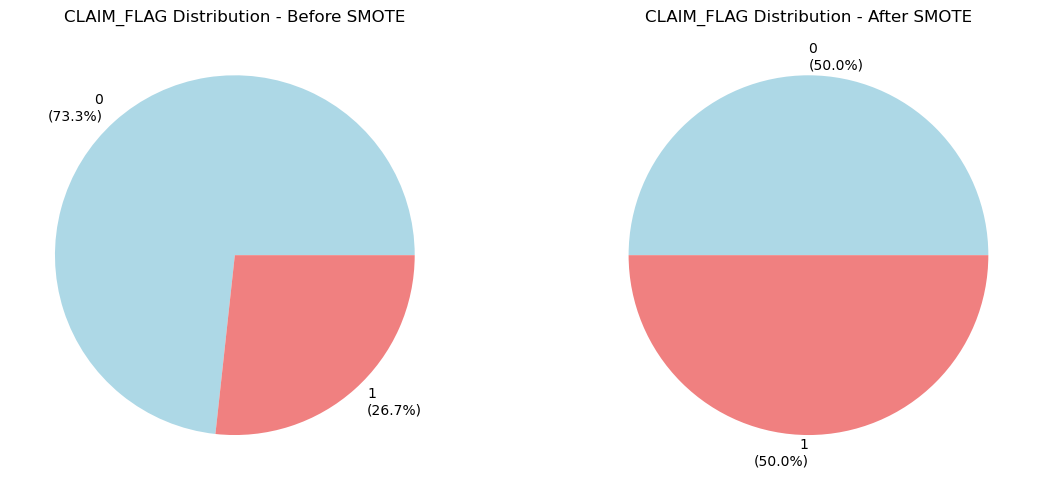


Balancing results for CLAIM_FLAG:

Before balancing:
               %
CLAIM_FLAG      
0           8046
1           2934

After balancing:
               %
CLAIM_FLAG      
0           8046
1           8046


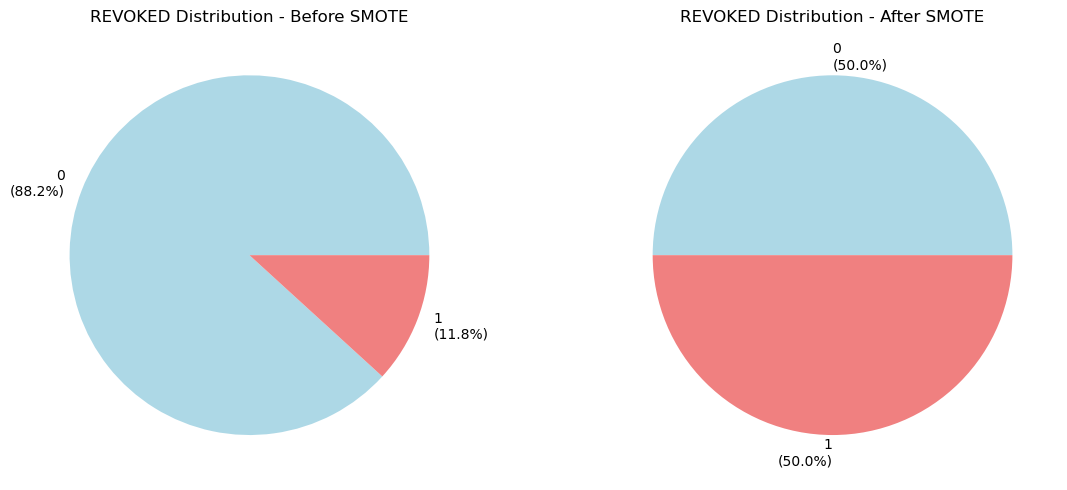


Balancing results for REVOKED:

Before balancing:
            %
REVOKED      
0        9687
1        1293

After balancing:
            %
REVOKED      
0        9687
1        9687


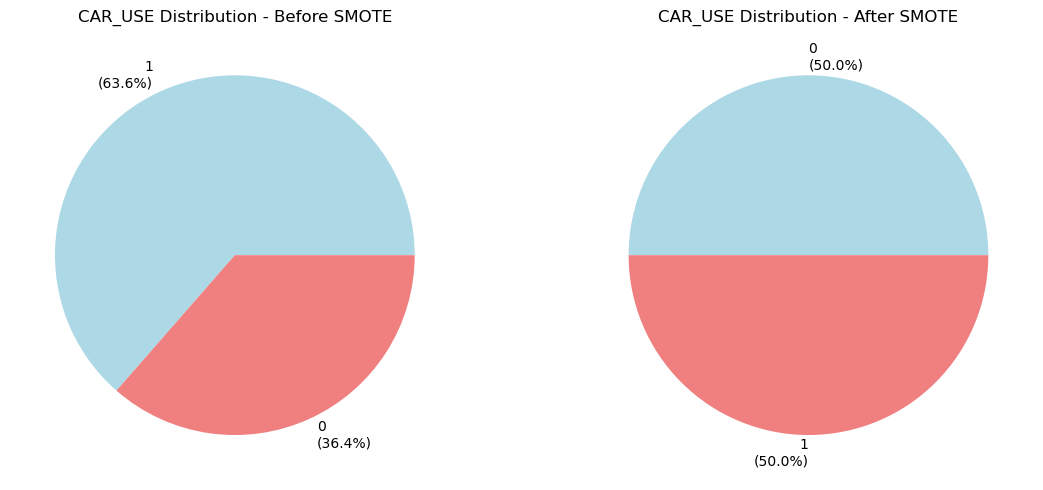


Balancing results for CAR_USE:

Before balancing:
            %
CAR_USE      
1        6980
0        4000

After balancing:
            %
CAR_USE      
0        6980
1        6980


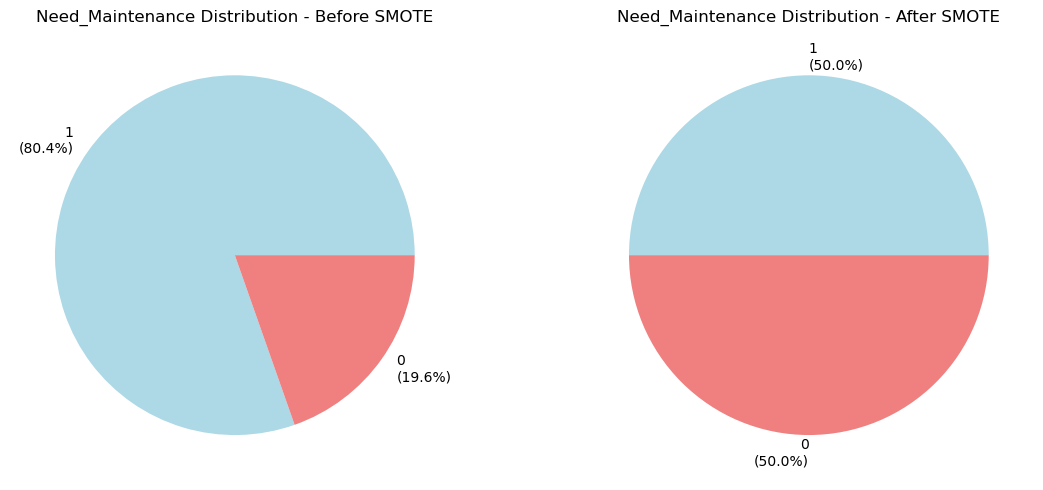


Balancing results for Need_Maintenance:

Before balancing:
                     %
Need_Maintenance      
1                 8827
0                 2153

After balancing:
                     %
Need_Maintenance      
1                 8827
0                 8827


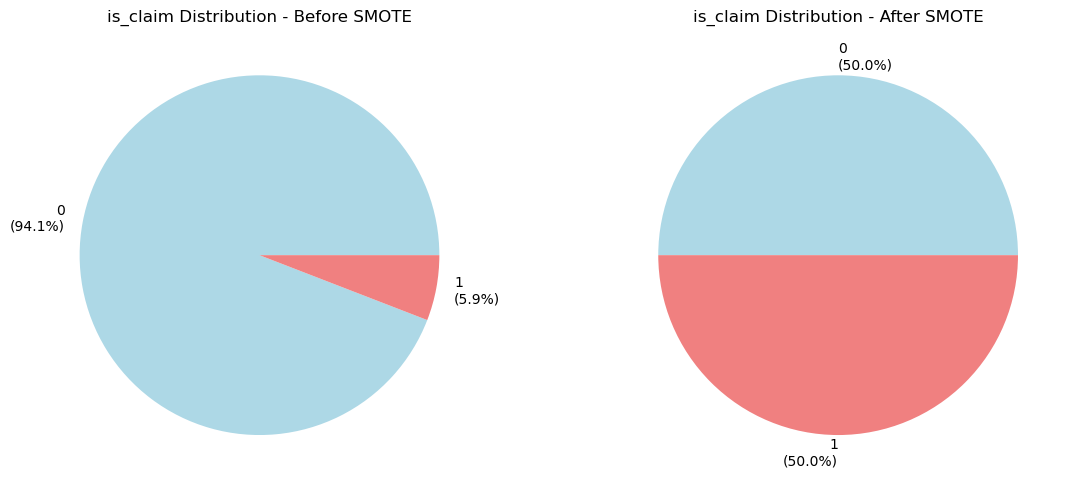


Balancing results for is_claim:

Before balancing:
              %
is_claim       
0         10335
1           645

After balancing:
              %
is_claim       
0         10335
1         10335


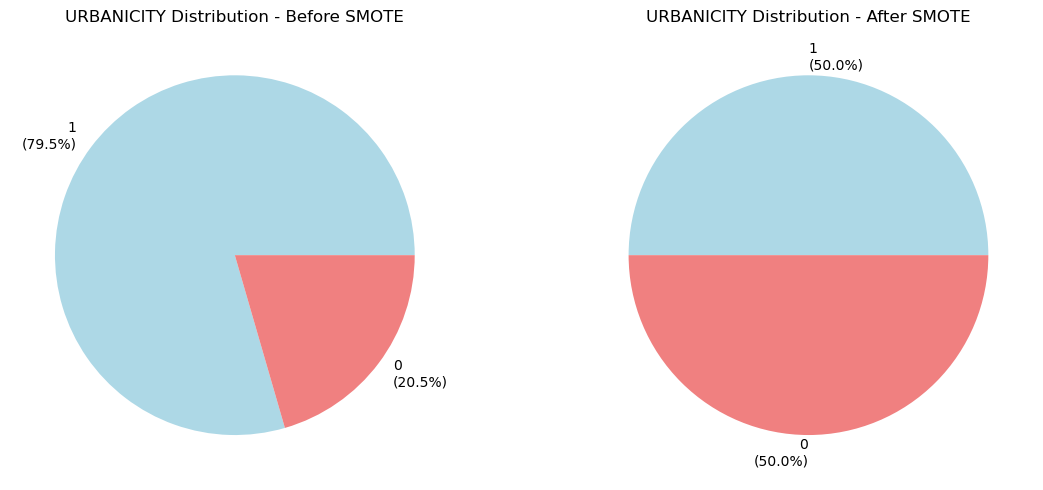


Balancing results for URBANICITY:

Before balancing:
               %
URBANICITY      
1           8728
0           2252

After balancing:
               %
URBANICITY      
1           8728
0           8728


In [85]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

def balance_and_visualize(final_integrated_df_cleaned, columns_to_balance):
    """
    Apply SMOTE and visualize results for selected columns
    """
    before_distributions = {}
    after_distributions = {}
    
    # Store original distributions
    for col in columns_to_balance:
        before_distributions[col] = final_integrated_df_cleaned[col].value_counts()
    
    # Apply SMOTE to each column separately
    balanced_dfs = {}
    for col in columns_to_balance:
        # Initialize SMOTE
        smote = SMOTE(random_state=42)
        
        # Select only numeric columns for SMOTE
        numeric_cols = final_integrated_df_cleaned.select_dtypes(include=['int64', 'float64']).columns
        X = final_integrated_df_cleaned[numeric_cols].drop(columns=[col] if col in numeric_cols else [])
        y = final_integrated_df_cleaned[col]
        
        # Apply SMOTE
        X_resampled, y_resampled = smote.fit_resample(X, y)
        
        # Store balanced data
        balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
        balanced_df[col] = y_resampled
        balanced_dfs[col] = balanced_df
        
        # Store new distribution
        after_distributions[col] = y_resampled.value_counts()
        
        # Plot comparison
        plot_balance_comparison(col, before_distributions[col], after_distributions[col])
        
        # Print statistics
        print(f"\nBalancing results for {col}:")
        print("\nBefore balancing:")
        print(before_distributions[col].to_frame('%').round(2))
        print("\nAfter balancing:")
        print(after_distributions[col].to_frame('%').round(2))
        
    return balanced_dfs

def plot_balance_comparison(column_name, before_counts, after_counts):
    """
    Create before/after pie charts for imbalance visualization
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Calculate percentages
    before_pct = before_counts / before_counts.sum() * 100
    after_pct = after_counts / after_counts.sum() * 100
    
    # Before plot
    ax1.pie(before_pct, labels=[f'{idx}\n({val:.1f}%)' for idx, val in before_pct.items()], 
            colors=['lightblue', 'lightcoral'])
    ax1.set_title(f'{column_name} Distribution - Before SMOTE')
    
    # After plot
    ax2.pie(after_pct, labels=[f'{idx}\n({val:.1f}%)' for idx, val in after_pct.items()], 
            colors=['lightblue', 'lightcoral'])
    ax2.set_title(f'{column_name} Distribution - After SMOTE')
    
    plt.tight_layout()
    plt.show()

# List of columns to balance
columns_to_balance = [
    'CLAIM_FLAG', 'REVOKED', 'CAR_USE', 
    'Need_Maintenance', 'is_claim', 'URBANICITY'
]

# Apply balancing and visualize
balanced_datasets = balance_and_visualize(final_integrated_df_cleaned, columns_to_balance)

<span style="color: #2E75B6; font-size: 28px;">Exploratory Data Analysis Plan 📊</span>

Univariate Analysis

Numeric Variables:

Income, Insurance Premium, Car Age
Claims Amount, Mileage


Categorical Variables:

Education, Car Type
Balanced binary variables we created




Bivariate Analysis (focusing on claim prediction)

Scatter plots between:

Income vs Claims Amount
Car Age vs Insurance Premium


Cross-tabulations:

Car Type vs Claims
Education vs Claims




Multivariate Analysis

PCA on vehicle features
Correlation matrix for all numeric variables
Advanced visualizations (parallel coordinates plot)


Correlation Analysis

Focus on identifying key predictors for claims
Group correlations by feature categories
Visualize with annotated heatmap


Dimensionality & Pattern Analysis

Feature importance analysis
Time-based patterns in claims
Group patterns by vehicle types

<span style="color: #2E75B6; font-size: 28px;">Step 1: Univariate Analysis 📈</span>

Checking available columns:

Missing columns:
[]

Final columns for analysis:
Numeric: ['CLM_AMT', 'INCOME', 'CAR_AGE', 'MVR_PTS', 'displacement', 'ncap_rating', 'length', 'Mileage', 'Engine_Size', 'Fuel_Efficiency', 'Insurance_Premium', 'Service_History']
Categorical: ['EDUCATION', 'OCCUPATION', 'Maintenance_History_Code']
=== Numeric Variables Summary Statistics ===
            CLM_AMT        INCOME       CAR_AGE       MVR_PTS  displacement  \
count  10980.000000  10980.000000  10980.000000  10980.000000  10980.000000   
mean      -0.000373     -0.006869     -0.014814      1.730510      0.261768   
std        0.962374      0.991877      0.999368      2.150829      0.873464   
min       -0.319860     -1.206063     -1.481730      0.000000     -1.375713   
25%       -0.319860     -0.736303     -1.124688      0.000000      0.126338   
50%       -0.319860     -0.149041     -0.053562      1.000000      0.130093   
75%       -0.080084      0.514447      0.660523      3.000000      1.241611 

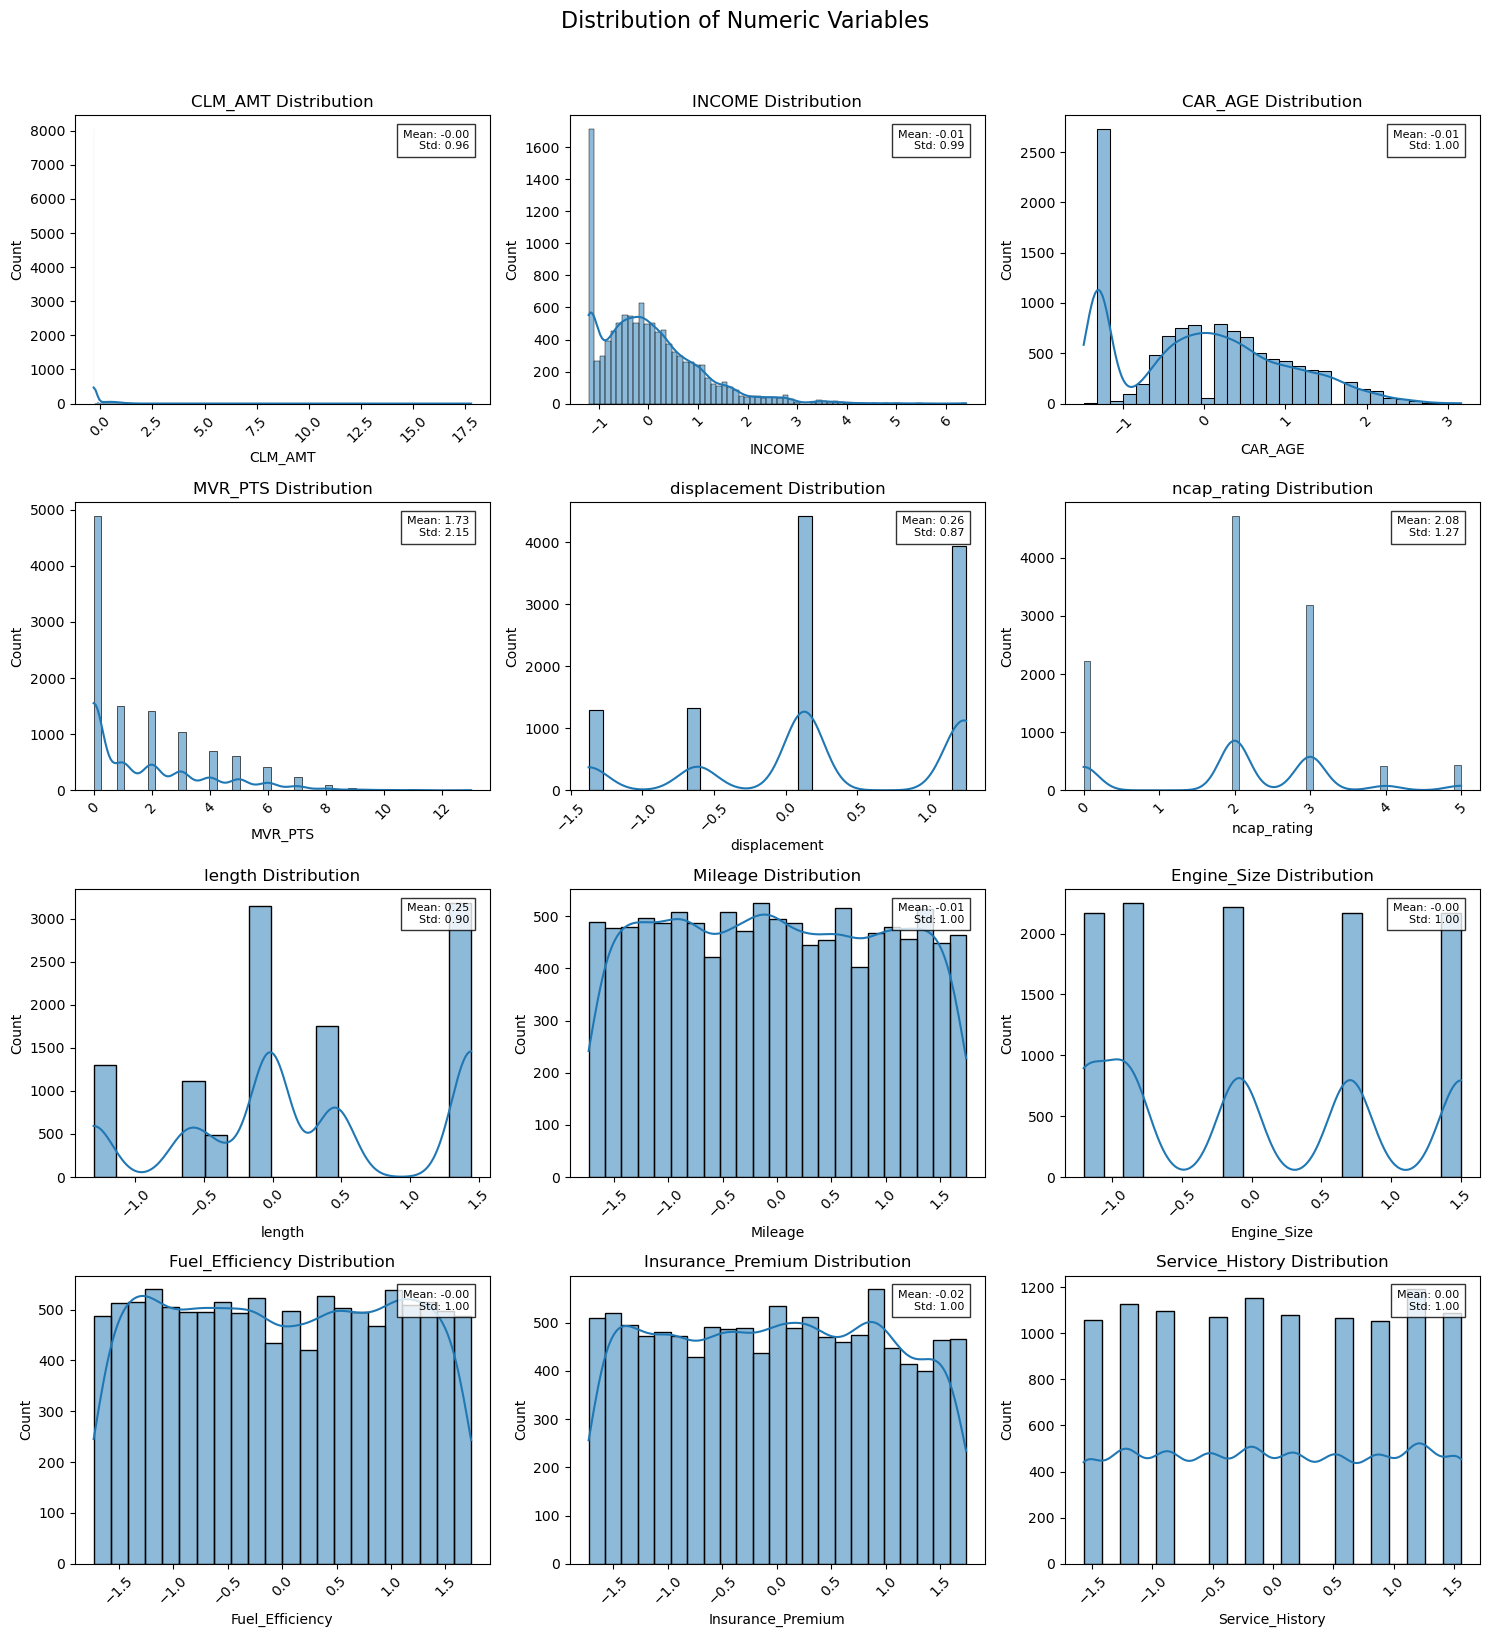

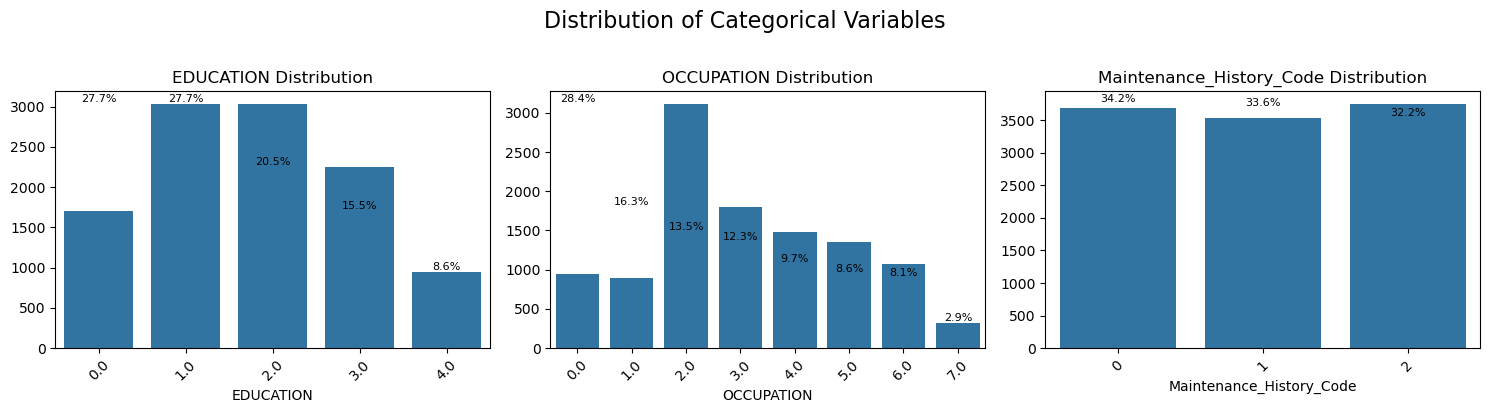


=== Key Insights ===
CLM_AMT skewness: 8.14
INCOME skewness: 1.20
CAR_AGE skewness: 0.29
MVR_PTS skewness: 1.32
displacement skewness: -0.39
ncap_rating skewness: -0.17
length skewness: -0.05
Mileage skewness: 0.02
Engine_Size skewness: 0.26
Fuel_Efficiency skewness: 0.01
Insurance_Premium skewness: 0.02
Service_History skewness: -0.00


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_numeric_variables(df, numeric_cols):
    """
    Plot histograms and boxplots for numeric variables in a compact way
    """
    # Calculate number of rows needed
    n_rows = (len(numeric_cols) + 2) // 3  # 3 columns per row
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
    fig.suptitle('Distribution of Numeric Variables', fontsize=16, y=1.02)
    axes = axes.ravel()  # Flatten axes array
    
    for idx, col in enumerate(numeric_cols):
        # Histogram with KDE
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Add summary statistics
        stats = df[col].describe()
        stats_text = f'Mean: {stats["mean"]:.2f}\nStd: {stats["std"]:.2f}'
        axes[idx].text(0.95, 0.95, stats_text,
                      transform=axes[idx].transAxes,
                      bbox=dict(facecolor='white', alpha=0.8),
                      verticalalignment='top',
                      horizontalalignment='right',
                      fontsize=8)
    
    # Remove empty subplots if any
    for idx in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

def plot_categorical_variables(df, cat_cols):
    """
    Plot bar charts for categorical variables
    """
    n_rows = (len(cat_cols) + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(15, 4*n_rows))
    fig.suptitle('Distribution of Categorical Variables', fontsize=16, y=1.02)
    axes = axes.ravel()
    
    for idx, col in enumerate(cat_cols):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[idx])
        axes[idx].set_title(f'{col} Distribution')
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Add percentage labels
        total = float(len(df))
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v, f'{(v/total)*100:.1f}%',
                         ha='center', va='bottom', fontsize=8)
    
    # Remove empty subplots
    for idx in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()

# Define column groups
numeric_columns = [
    'CLM_AMT', 'INCOME', 'CAR_AGE', 'MVR_PTS',      # Insurance columns
    'displacement', 'ncap_rating', 'length',         # Features columns
    'Mileage', 'Engine_Size', 'Fuel_Efficiency',     # Maintenance columns
    'Insurance_Premium', 'Service_History'           # Additional numeric columns
]

categorical_columns = [
    'EDUCATION', 'OCCUPATION',                       # Insurance categorical
    'Maintenance_History_Code'                       # Maintenance categorical
]

# First, let's verify these columns exist
print("Checking available columns:")
available_cols = set(final_integrated_df_cleaned.columns)
print("\nMissing columns:")
print([col for col in numeric_columns + categorical_columns if col not in available_cols])

# Remove any columns that don't exist
numeric_columns = [col for col in numeric_columns if col in available_cols]
categorical_columns = [col for col in categorical_columns if col in available_cols]

print("\nFinal columns for analysis:")
print("Numeric:", numeric_columns)
print("Categorical:", categorical_columns)

    # Generate summary statistics
print("=== Numeric Variables Summary Statistics ===")
print(final_integrated_df_cleaned[numeric_columns].describe())

print("\n=== Categorical Variables Value Counts ===")
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(final_integrated_df_cleaned[col].value_counts(normalize=True).multiply(100).round(2))

# Create visualizations
plot_numeric_variables(final_integrated_df_cleaned, numeric_columns)
plot_categorical_variables(final_integrated_df_cleaned, categorical_columns)

# Additional insights
print("\n=== Key Insights ===")
for col in numeric_columns:
    skew = final_integrated_df_cleaned[col].skew()
    print(f"{col} skewness: {skew:.2f}")


<span style="color: #2E75B6; font-size: 28px;">Bivariate Analysis 🔍</span>

In [93]:
pip install seaborn


In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from scipy.stats import pearsonr

# Set the style for better visualizations
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Set figure size and resolution
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

<span style="color: #2E75B6; font-size: 24px;">Insurance Risk Analysis</span>

<span style="color: #2E75B6; font-size: 24px;">Step 2: Income vs Claim Amount Analysis</span>

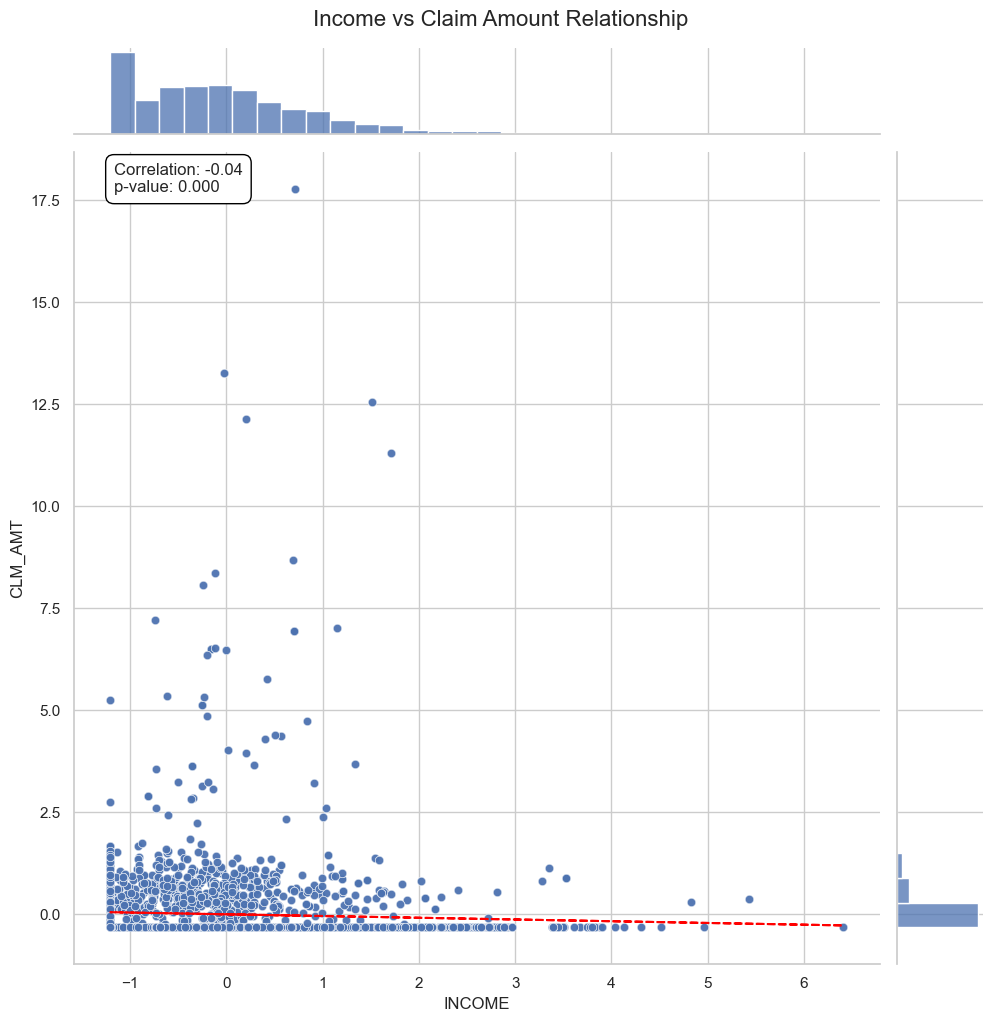

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Function to create joint plot for Income vs Claim Amount
def plot_income_claims_relationship():
    # Create the joint plot
    g = sns.jointplot(
        data=final_integrated_df_cleaned,
        x="INCOME",
        y="CLM_AMT",
        height=10,
        ratio=8,
        marginal_kws=dict(bins=30),
        joint_kws={'alpha': 0.5}  # Use alpha directly here
    )

    # Add regression line
    g.ax_joint.plot(
        final_integrated_df_cleaned['INCOME'],
        np.poly1d(np.polyfit(final_integrated_df_cleaned['INCOME'], 
                             final_integrated_df_cleaned['CLM_AMT'], 1))(final_integrated_df_cleaned['INCOME']),
        color='red',
        linestyle='--'
    )

    # Calculate correlation
    correlation, p_value = pearsonr(final_integrated_df_cleaned['INCOME'], 
                                    final_integrated_df_cleaned['CLM_AMT'])

    # Add correlation annotation
    g.ax_joint.annotate(
        f'Correlation: {correlation:.2f}\np-value: {p_value:.3f}',
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

    plt.suptitle('Income vs Claim Amount Relationship', y=1.02, fontsize=16)
    plt.show()

# Call the function
plot_income_claims_relationship()


<span style="color: #2E75B6; font-size: 24px;">Step 3: Education and Claim Analysis</span>

C:\Users\siddh\AppData\Local\Temp\ipykernel_19544\2018835445.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\siddh\AppData\Local\Temp\ipykernel_19544\2018835445.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


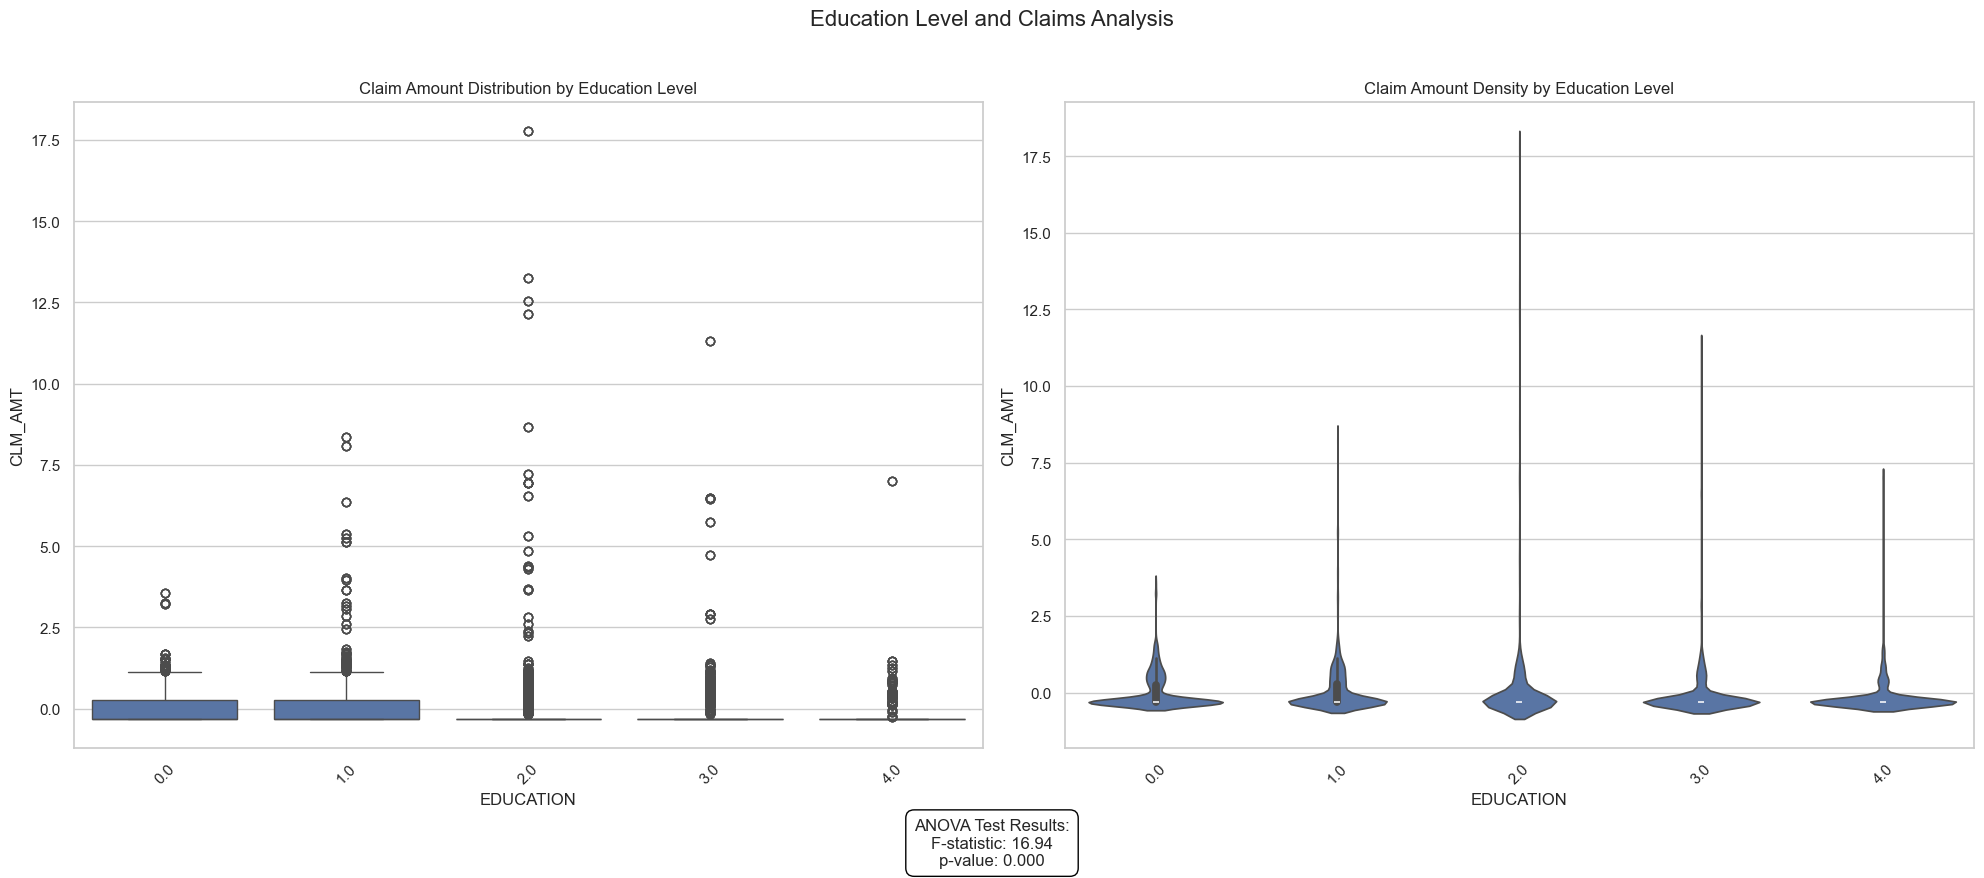

In [106]:
def plot_education_claims_analysis():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Box plot
    sns.boxplot(
        data=final_integrated_df_cleaned,
        x='EDUCATION',
        y='CLM_AMT',
        ax=ax1
    )
    ax1.set_title('Claim Amount Distribution by Education Level')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

    # Violin plot
    sns.violinplot(
        data=final_integrated_df_cleaned,
        x='EDUCATION',
        y='CLM_AMT',
        ax=ax2
    )
    ax2.set_title('Claim Amount Density by Education Level')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    # Perform ANOVA test
    education_groups = [group for _, group in final_integrated_df_cleaned.groupby('EDUCATION')['CLM_AMT']]
    f_statistic, p_value = stats.f_oneway(*education_groups)

    # Add ANOVA results
    plt.figtext(
        0.5, -0.05,
        f'ANOVA Test Results:\nF-statistic: {f_statistic:.2f}\np-value: {p_value:.3f}',
        ha='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

    plt.suptitle('Education Level and Claims Analysis', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_education_claims_analysis()

<span style="color: #2E75B6; font-size: 24px;">Step 4: MVR Points vs Claims Analysis</span>

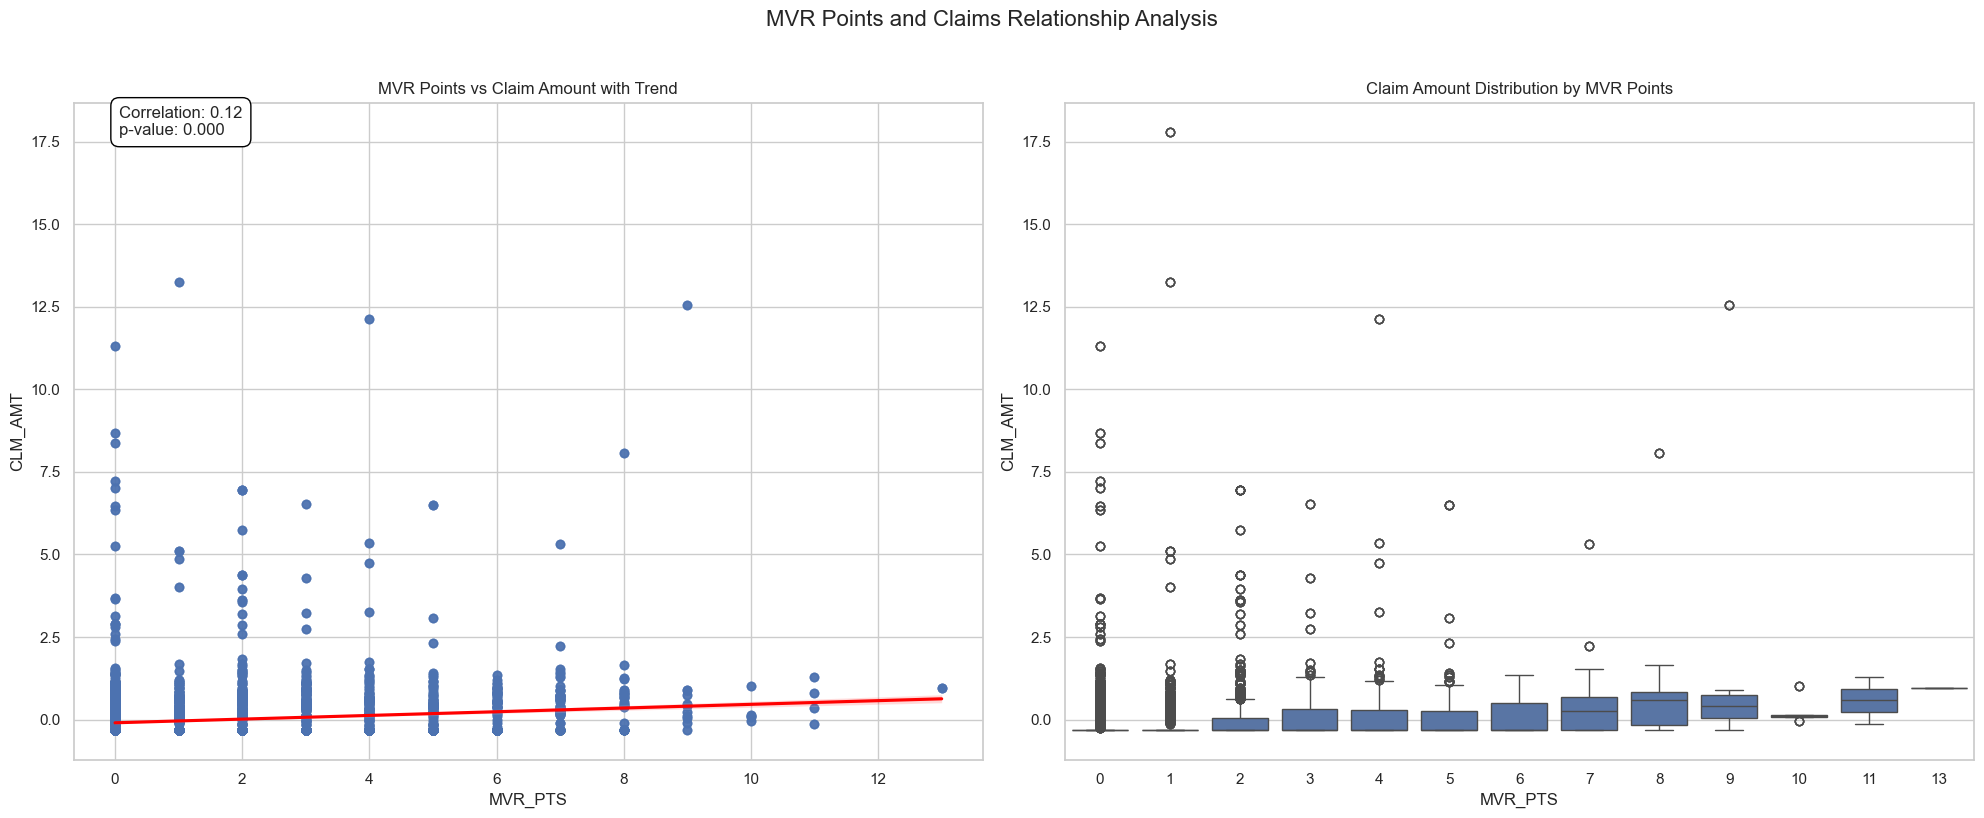

In [107]:
def plot_mvr_claims_analysis():
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Scatter plot with trend line
    sns.regplot(
        data=final_integrated_df_cleaned,
        x='MVR_PTS',
        y='CLM_AMT',
        scatter_kws={'alpha':0.5},
        line_kws={'color': 'red'},
        ax=ax1
    )
    ax1.set_title('MVR Points vs Claim Amount with Trend')

    # Calculate correlation
    correlation, p_value = pearsonr(final_integrated_df_cleaned['MVR_PTS'], 
                                  final_integrated_df_cleaned['CLM_AMT'])
    
    # Add correlation annotation
    ax1.annotate(
        f'Correlation: {correlation:.2f}\np-value: {p_value:.3f}',
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

    # Box plot of claims by MVR points
    sns.boxplot(
        data=final_integrated_df_cleaned,
        x='MVR_PTS',
        y='CLM_AMT',
        ax=ax2
    )
    ax2.set_title('Claim Amount Distribution by MVR Points')

    plt.suptitle('MVR Points and Claims Relationship Analysis', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
plot_mvr_claims_analysis()

<span style="color: #2E75B6; font-size: 24px;">Step 5: Car Age and Claims Analysis</span>

TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

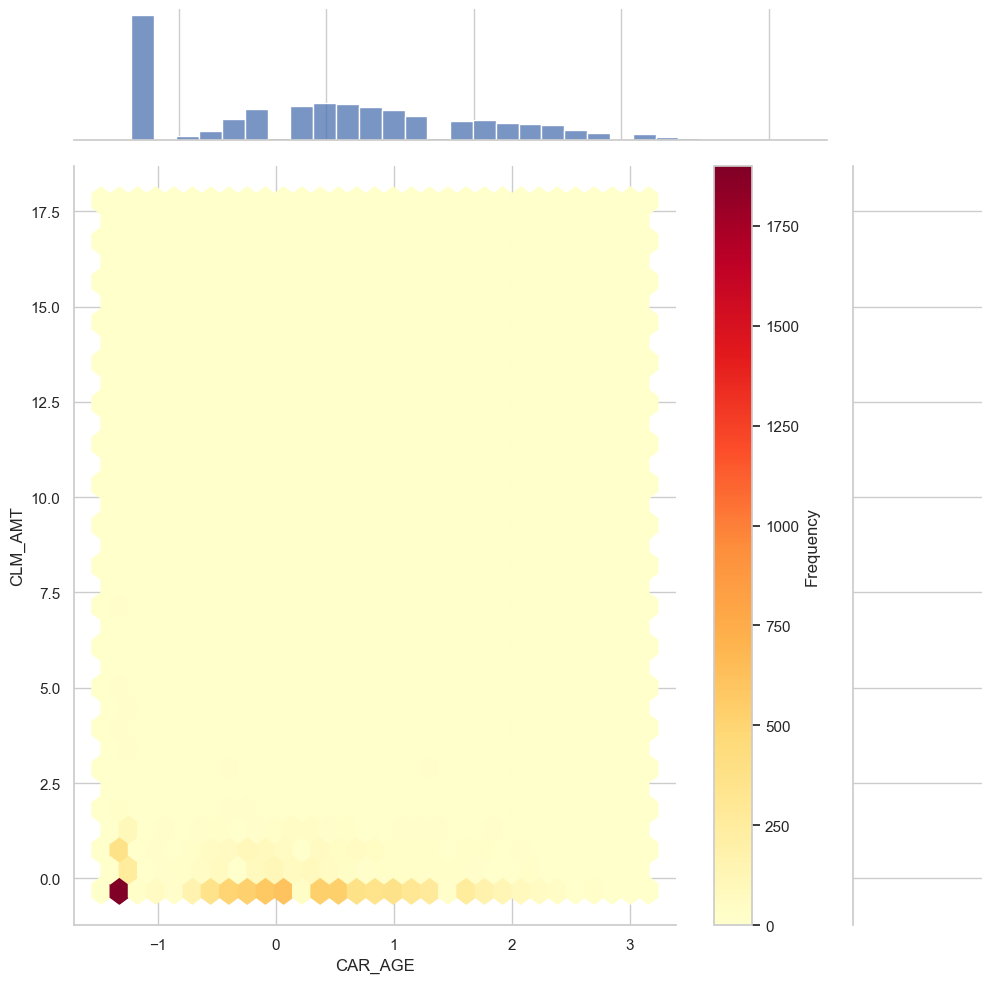

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def plot_car_age_claims_analysis():
    # Create a JointGrid for Car Age vs Claim Amount
    g = sns.JointGrid(
        data=final_integrated_df_cleaned,
        x="CAR_AGE",
        y="CLM_AMT",
        height=10
    )

    # Add hexbin plot using Matplotlib
    hb = g.ax_joint.hexbin(
        final_integrated_df_cleaned['CAR_AGE'],
        final_integrated_df_cleaned['CLM_AMT'],
        gridsize=30,
        cmap='YlOrRd'
    )
    # Add a colorbar for the hexbin plot
    cb = plt.colorbar(hb, ax=g.ax_joint)
    cb.set_label('Frequency')

    # Add marginal histograms
    sns.histplot(
        final_integrated_df_cleaned['CAR_AGE'],
        ax=g.ax_marg_x,
        bins=30,
        kde=False
    )
    sns.histplot(
        final_integrated_df_cleaned['CLM_AMT'],
        ax=g.ax_marg_y,
        bins=30,
        kde=False,
        orientation="horizontal"
    )

    # Calculate correlation
    correlation, p_value = pearsonr(
        final_integrated_df_cleaned['CAR_AGE'], 
        final_integrated_df_cleaned['CLM_AMT']
    )

    # Add correlation annotation
    g.ax_joint.annotate(
        f'Correlation: {correlation:.2f}\np-value: {p_value:.3f}',
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

    # Add a title
    plt.suptitle('Car Age vs Claim Amount Relationship', y=1.02, fontsize=16)

    # Show the plot
    plt.show()

# Call the function
plot_car_age_claims_analysis()


<span style="color: #2E75B6; font-size: 24px;">Step 6: 3D Multivariate Analysis</span>

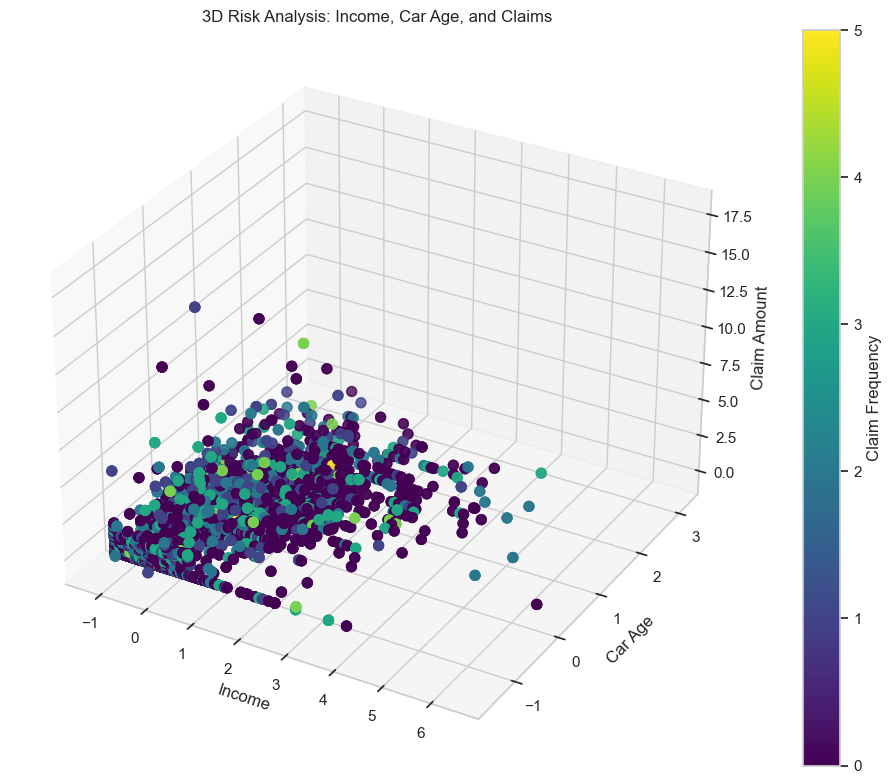

In [110]:
def plot_3d_analysis():
    # Create 3D scatter plot using plotly
    fig = px.scatter_3d(
        final_integrated_df_cleaned,
        x='INCOME',
        y='CAR_AGE',
        z='CLM_AMT',
        color='CLM_FREQ',  # Color points by claim frequency
        size='MVR_PTS',    # Size points by MVR points
        opacity=0.7,
        title='3D Risk Analysis: Income, Car Age, and Claims',
        labels={
            'INCOME': 'Income',
            'CAR_AGE': 'Car Age',
            'CLM_AMT': 'Claim Amount',
            'CLM_FREQ': 'Claim Frequency'
        }
    )

    # Update layout for better visualization
    fig.update_layout(
        scene=dict(
            xaxis_title='Income',
            yaxis_title='Car Age',
            zaxis_title='Claim Amount'
        ),
        width=1000,
        height=800
    )

    # Show the plot
    fig.show()

# Alternative 3D visualization using matplotlib
def plot_3d_analysis_matplotlib():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        final_integrated_df_cleaned['INCOME'],
        final_integrated_df_cleaned['CAR_AGE'],
        final_integrated_df_cleaned['CLM_AMT'],
        c=final_integrated_df_cleaned['CLM_FREQ'],
        cmap='viridis',
        s=50
    )

    ax.set_xlabel('Income')
    ax.set_ylabel('Car Age')
    ax.set_zlabel('Claim Amount')
    
    # Add colorbar
    plt.colorbar(scatter, label='Claim Frequency')
    
    plt.title('3D Risk Analysis: Income, Car Age, and Claims')
    plt.tight_layout()
    plt.show()

# Call both 3D visualization functions
plot_3d_analysis()
plot_3d_analysis_matplotlib()

Additional Utility Functions for Statistical Analysis:

In [111]:
def print_risk_statistics():
    """Print comprehensive statistical analysis of risk factors"""
    risk_factors = ['INCOME', 'CAR_AGE', 'MVR_PTS', 'CLM_AMT', 'CLM_FREQ']
    
    print("Risk Factors Correlation Matrix:")
    correlation_matrix = final_integrated_df_cleaned[risk_factors].corr()
    print(correlation_matrix)
    
    print("\nRisk Factors Summary Statistics:")
    print(final_integrated_df_cleaned[risk_factors].describe())

# Call the statistical analysis
print_risk_statistics()

Risk Factors Correlation Matrix:
            INCOME   CAR_AGE   MVR_PTS   CLM_AMT  CLM_FREQ
INCOME    1.000000  0.405426 -0.041606 -0.043784 -0.023524
CAR_AGE   0.405426  1.000000 -0.024063 -0.088111 -0.013545
MVR_PTS  -0.041606 -0.024063  1.000000  0.124899  0.407850
CLM_AMT  -0.043784 -0.088111  0.124899  1.000000  0.138884
CLM_FREQ -0.023524 -0.013545  0.407850  0.138884  1.000000

Risk Factors Summary Statistics:
             INCOME       CAR_AGE       MVR_PTS       CLM_AMT      CLM_FREQ
count  10980.000000  10980.000000  10980.000000  10980.000000  10980.000000
mean      -0.006869     -0.014814      1.730510     -0.000373      0.796721
std        0.991877      0.999368      2.150829      0.962374      1.136077
min       -1.206063     -1.481730      0.000000     -0.319860      0.000000
25%       -0.736303     -1.124688      0.000000     -0.319860      0.000000
50%       -0.149041     -0.053562      1.000000     -0.319860      0.000000
75%        0.514447      0.660523      3.000000

<span style="color: #2E75B6; font-size: 28px;">1. VEHICLE SAFETY ANALYSIS 🚗</span>

In [112]:
def analyze_vehicle_safety():
    # 1. Safety Rating vs Claims Analysis
    plt.figure(figsize=(15, 6))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Boxplot with trend line
    sns.boxplot(data=final_integrated_df_cleaned, x='ncap_rating', y='CLM_AMT', ax=ax1)
    
    # Add trend line to boxplot
    means = final_integrated_df_cleaned.groupby('ncap_rating')['CLM_AMT'].mean()
    ax1.plot(range(len(means)), means.values, color='red', linestyle='--', label='Trend')
    ax1.set_title('Safety Rating vs Claim Amount')
    ax1.legend()

    # Violin plot
    sns.violinplot(data=final_integrated_df_cleaned, x='ncap_rating', y='CLM_AMT', ax=ax2)
    ax2.plot(range(len(means)), means.values, color='red', linestyle='--', label='Trend')
    ax2.set_title('Claim Distribution by Safety Rating')
    ax2.legend()

    plt.suptitle('Safety Rating Analysis', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    # 2. Safety Features Joint Plot
    g = sns.jointplot(
        data=final_integrated_df_cleaned,
        x="gross_weight",
        y="CLM_AMT",
        height=10,
        kind='reg',  # Adds regression line automatically
        joint_kws={'scatter_kws': dict(alpha=0.5)},
        line_kws={'color': 'red'}
    )
    g.fig.suptitle('Vehicle Weight vs Claims Analysis', y=1.02)
    
    # Add correlation statistics
    correlation, p_value = pearsonr(final_integrated_df_cleaned['gross_weight'], 
                                  final_integrated_df_cleaned['CLM_AMT'])
    g.ax_joint.annotate(
        f'Correlation: {correlation:.2f}\np-value: {p_value:.3f}',
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(facecolor='white', edgecolor='black')
    )
    plt.show()

    # 3. 3D Safety Analysis
    fig = px.scatter_3d(
        final_integrated_df_cleaned,
        x='ncap_rating',
        y='gross_weight',
        z='CLM_AMT',
        color='is_brake_assist',
        size='CLM_FREQ',
        title='3D Safety Analysis: Rating, Weight, and Claims',
        labels={
            'ncap_rating': 'Safety Rating',
            'gross_weight': 'Vehicle Weight',
            'CLM_AMT': 'Claim Amount'
        }
    )
    fig.show()

<span style="color: #2E75B6; font-size: 28px;">2. MAINTENANCE PATTERNS ANALYSIS 🔧</span>

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import plotly.express as px

def analyze_maintenance_patterns():
    """
    Analyze relationships between maintenance variables and claims using plots.
    """
    # 1. Mileage vs Claims with Service History
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    # Scatter plot with trend
    sns.scatterplot(
        data=final_integrated_df_cleaned,
        x='Mileage',
        y='CLM_AMT',
        hue='Service_History',
        ax=ax1,
        alpha=0.7
    )
    sns.regplot(
        data=final_integrated_df_cleaned,
        x='Mileage',
        y='CLM_AMT',
        scatter=False,
        color='red',
        ax=ax1
    )
    ax1.set_title('Mileage vs Claims with Service History', fontsize=14)
    ax1.set_xlabel('Mileage')
    ax1.set_ylabel('Claim Amount')

    # Box plot with trend
    sns.boxplot(
        data=final_integrated_df_cleaned,
        x='Service_History',
        y='CLM_AMT',
        ax=ax2
    )
    means = final_integrated_df_cleaned.groupby('Service_History')['CLM_AMT'].mean()
    ax2.plot(
        range(len(means)), 
        means.values, 
        color='red', 
        linestyle='--', 
        label='Trend'
    )
    ax2.set_title('Claims by Service History', fontsize=14)
    ax2.set_xlabel('Service History')
    ax2.set_ylabel('Claim Amount')
    ax2.legend()

    plt.suptitle('Maintenance and Claims Analysis', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

    # 2. Engine Size and Fuel Efficiency Analysis
    g = sns.lmplot(
        data=final_integrated_df_cleaned,
        x="Engine_Size",
        y="Fuel_Efficiency",
        hue="Maintenance_History_Code",
        height=8,
        aspect=1.5,
        scatter_kws={'alpha': 0.7},
        line_kws={'linestyle': '--'}
    )
    g.fig.suptitle('Engine Size vs Fuel Efficiency by Maintenance History', y=1.02, fontsize=16)
    
    # Calculate correlation
    correlation, p_value = pearsonr(
        final_integrated_df_cleaned['Engine_Size'], 
        final_integrated_df_cleaned['Fuel_Efficiency']
    )
    plt.annotate(
        f'Correlation: {correlation:.2f}\np-value: {p_value:.3f}',
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(facecolor='white', edgecolor='black'),
        fontsize=12
    )
    plt.show()

    # 3. 3D Maintenance Analysis without size variation
    fig = px.scatter_3d(
        final_integrated_df_cleaned,
        x='Mileage',
        y='Engine_Size',
        z='CLM_AMT',
        color='Service_History',
        title='3D Maintenance Analysis: Mileage, Engine Size, and Claims',
        labels={
            'Mileage': 'Mileage',
            'Engine_Size': 'Engine Size',
            'CLM_AMT': 'Claim Amount'
        }
    )
    
    # Update layout
    fig.update_layout(
        title_font_size=16,
        showlegend=True,
        scene=dict(
            xaxis_title='Mileage',
            yaxis_title='Engine Size',
            zaxis_title='Claim Amount'
        )
    )
    fig.show()


### Utility Function for Statistical Analysis:

<Figure size 1500x600 with 0 Axes>

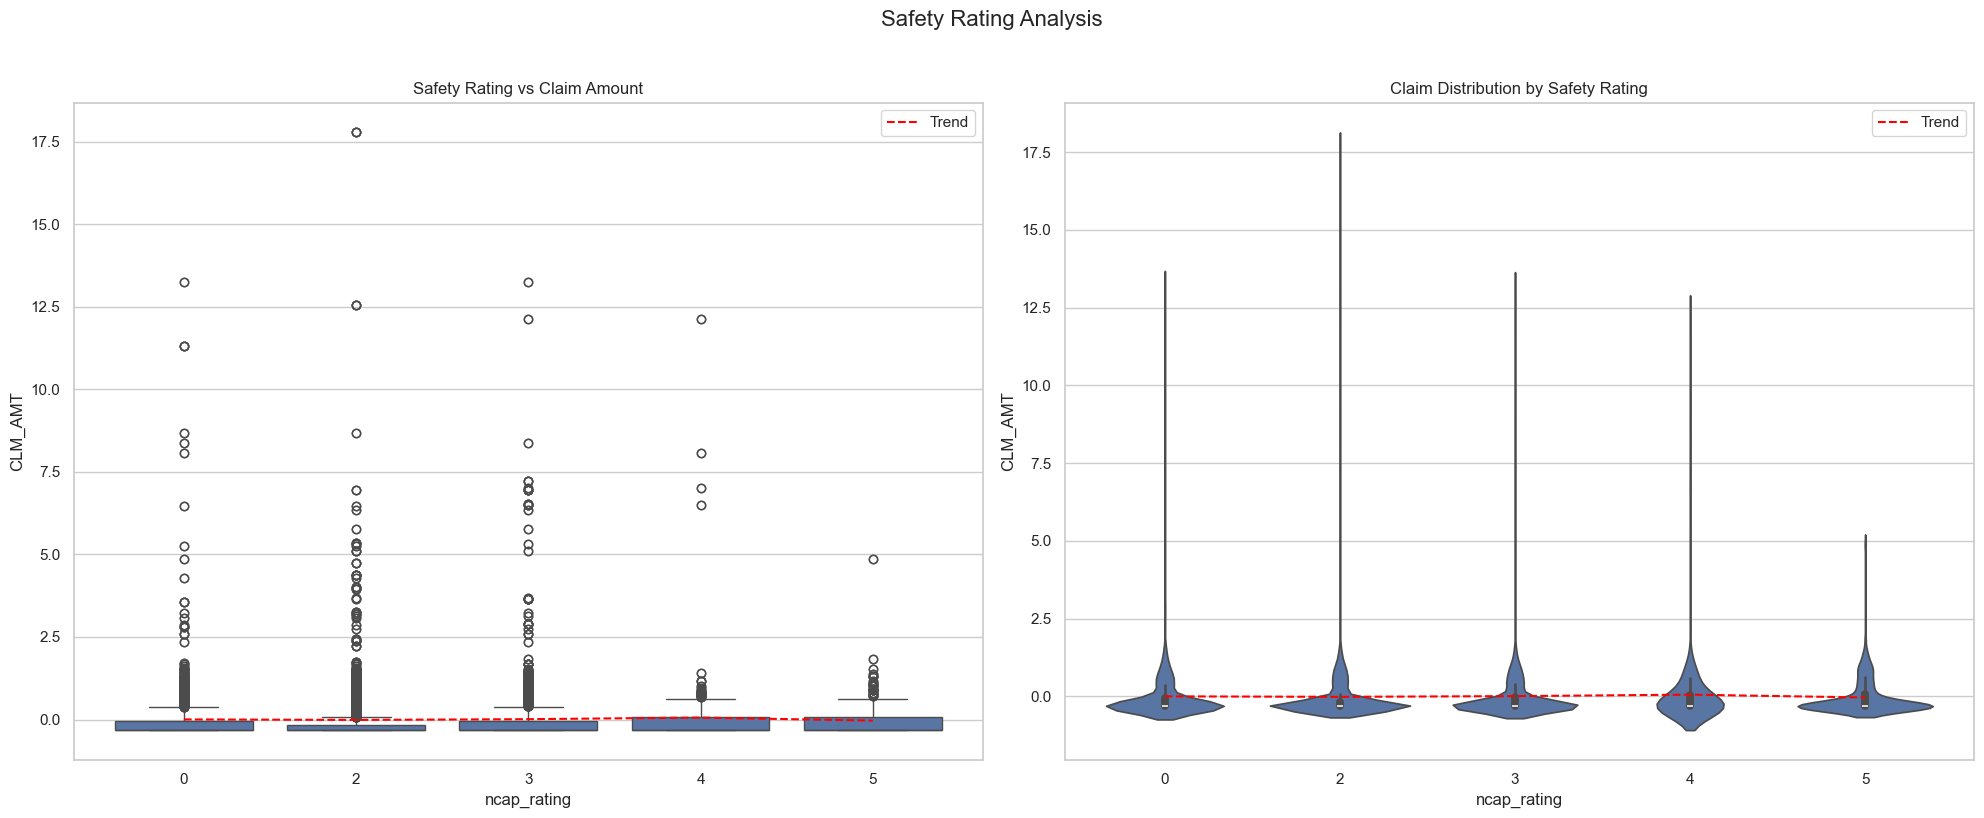

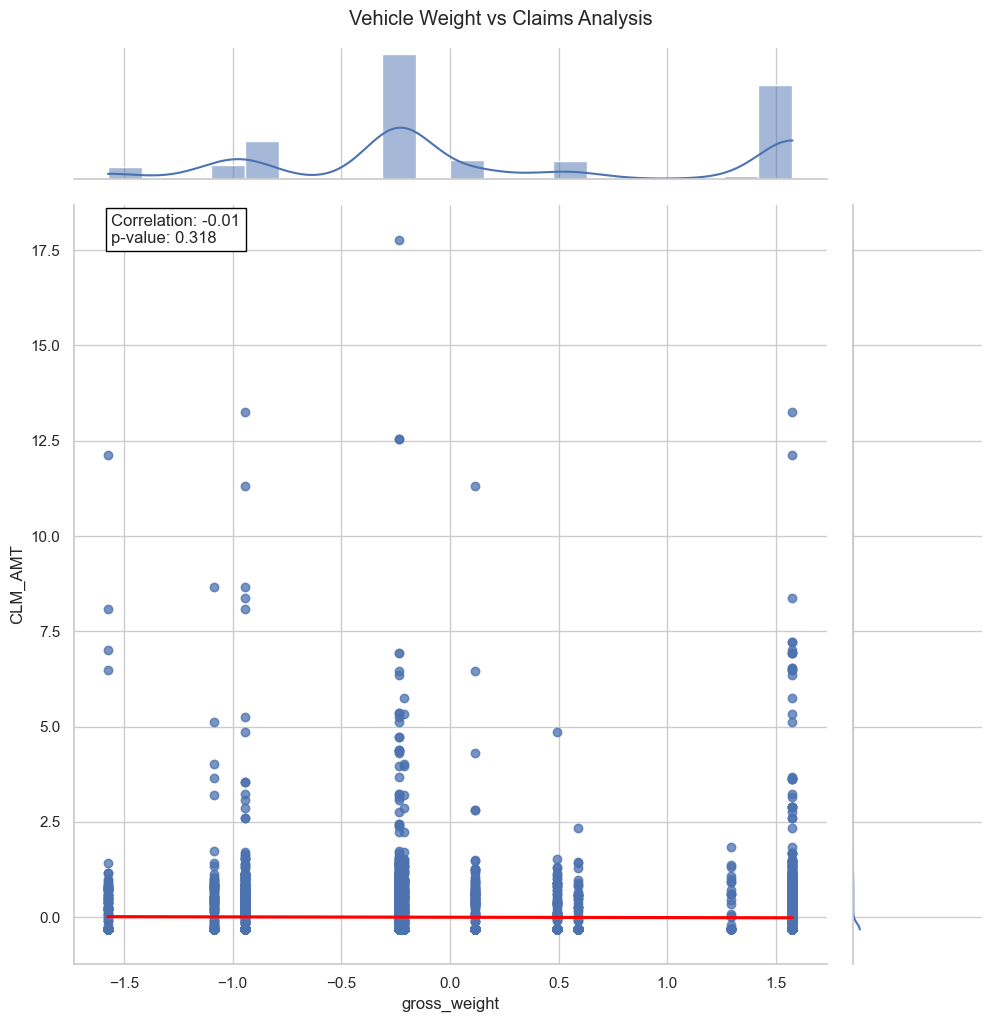

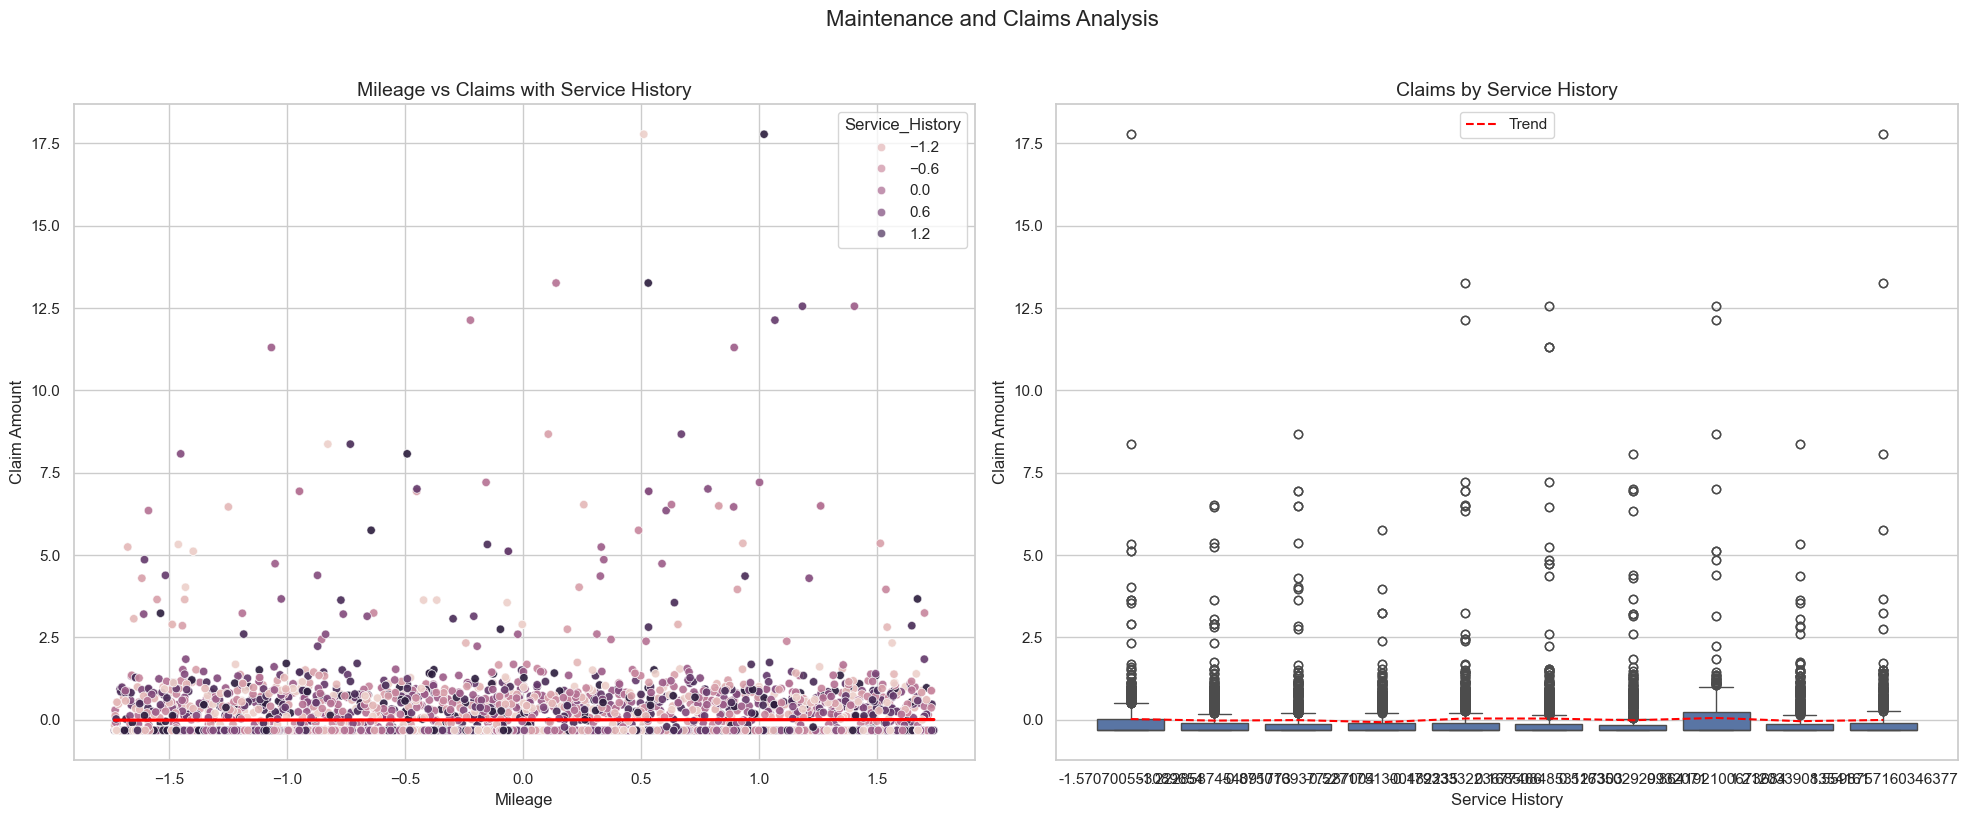

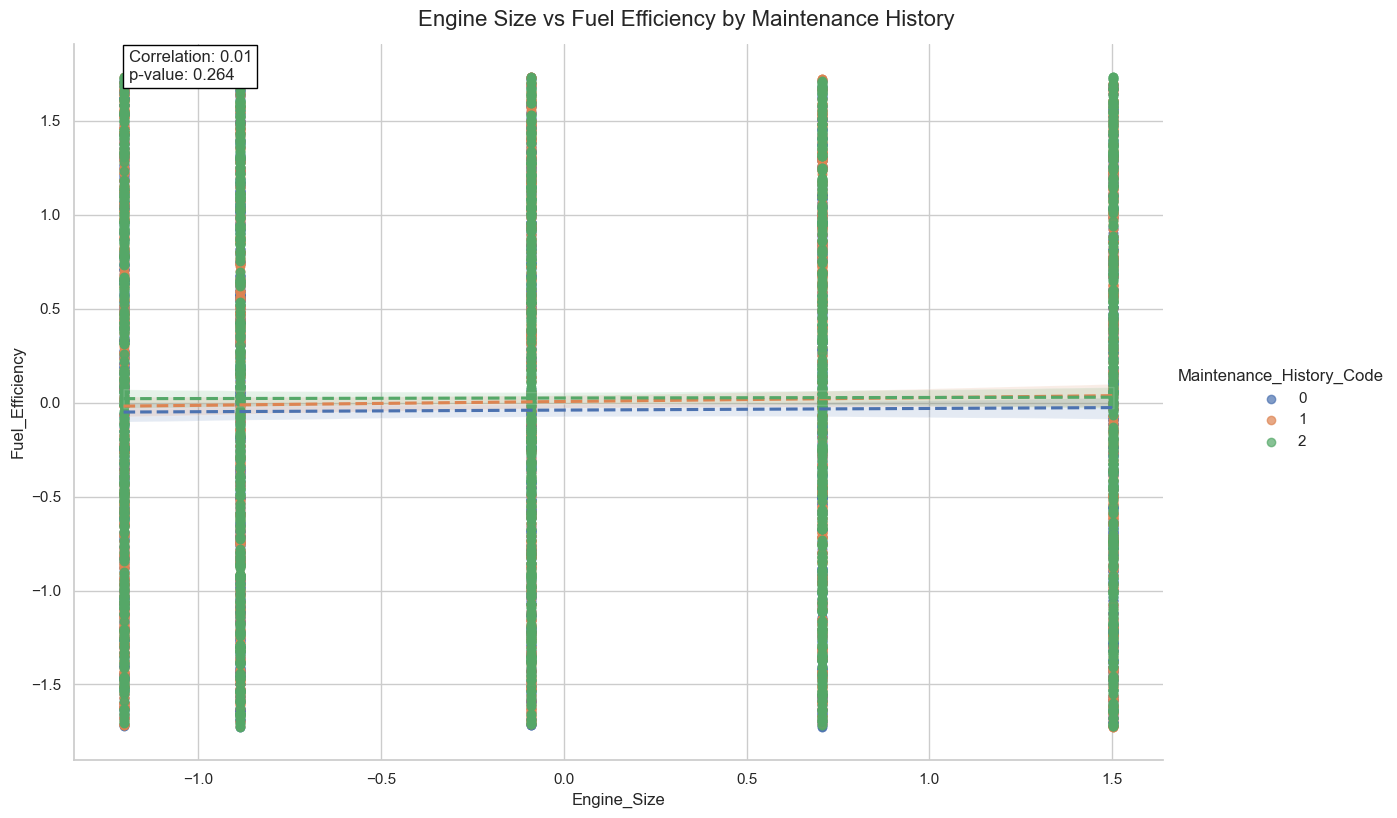

Safety Features Correlation Matrix:
                 ncap_rating  gross_weight  is_brake_assist   CLM_AMT
ncap_rating         1.000000      0.462728         0.246054  0.001908
gross_weight        0.462728      1.000000         0.580182 -0.009527
is_brake_assist     0.246054      0.580182         1.000000 -0.008252
CLM_AMT             0.001908     -0.009527        -0.008252  1.000000

Maintenance Factors Correlation Matrix:
                  Mileage  Engine_Size  Fuel_Efficiency   CLM_AMT
Mileage          1.000000     0.003135         0.003154  0.005241
Engine_Size      0.003135     1.000000         0.010667  0.020676
Fuel_Efficiency  0.003154     0.010667         1.000000  0.043294
CLM_AMT          0.005241     0.020676         0.043294  1.000000

ANOVA Test for Service History Impact:
F-statistic: 1.90, p-value: 0.047


In [119]:
def print_comprehensive_analysis():
    # Safety Analysis Statistics
    safety_vars = ['ncap_rating', 'gross_weight', 'is_brake_assist', 'CLM_AMT']
    print("Safety Features Correlation Matrix:")
    print(final_integrated_df_cleaned[safety_vars].corr())
    
    # Maintenance Analysis Statistics
    maintenance_vars = ['Mileage', 'Engine_Size', 'Fuel_Efficiency', 'CLM_AMT']
    print("\nMaintenance Factors Correlation Matrix:")
    print(final_integrated_df_cleaned[maintenance_vars].corr())
    
    # ANOVA tests for categorical variables
    service_groups = [group for _, group in final_integrated_df_cleaned.groupby('Service_History')['CLM_AMT']]
    f_stat, p_val = stats.f_oneway(*service_groups)
    print("\nANOVA Test for Service History Impact:")
    print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.3f}")

# Run all analyses
analyze_vehicle_safety()
analyze_maintenance_patterns()
print_comprehensive_analysis()

<span style="color: #2E75B6; font-size: 24px;">Vehicle Safety Correlations</span>

In [97]:
def plot_safety_analysis():
    # Safety Rating Impact
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='ncap_rating', y='CLM_AMT', data=final_integrated_df_cleaned)
    plt.title('Safety Rating vs Claim Amount', pad=20)
    plt.xticks(rotation=0)
    plt.show()

    # Create safety feature correlation matrix
    safety_features = ['is_parking_sensors', 'is_brake_assist', 
                      'is_parking_camera', 'ncap_rating', 'CLM_AMT']
    
    plt.figure(figsize=(10, 8))
    safety_corr = final_integrated_df_cleaned[safety_features].corr()
    sns.heatmap(safety_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Safety Features Correlation Matrix', pad=20)
    plt.show()

<span style="color: #2E75B6; font-size: 24px;">Maintenance Impact Study</span>

In [98]:
def plot_maintenance_analysis():
    # Service History vs Claims
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Service_History', 
                   y='CLM_AMT',
                   data=final_integrated_df_cleaned)
    plt.title('Claim Amount Distribution by Service History', pad=20)
    plt.xticks(rotation=45)
    plt.show()

    # Mileage Impact
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=final_integrated_df_cleaned,
                    x='Mileage',
                    y='CLM_AMT',
                    hue='Maintenance_History_Code',
                    style='CLAIM_FLAG')
    plt.title('Mileage vs Claim Amount by Maintenance History', pad=20)
    plt.show()

<span style="color: #2E75B6; font-size: 24px;">Economic Factors</span>

In [99]:
def plot_economic_analysis():
    plt.figure(figsize=(12, 6))
    sns.regplot(data=final_integrated_df_cleaned,
                x='INCOME',
                y='HOME_VAL',
                scatter_kws={'alpha':0.5},
                line_kws={'color': 'red'})
    plt.title('Income vs Home Value Relationship', pad=20)

    # Calculate and display correlation
    correlation = final_integrated_df_cleaned['INCOME'].corr(final_integrated_df_cleaned['HOME_VAL'])
    plt.annotate(f'Correlation: {correlation:.2f}', 
                xy=(0.7, 0.9), 
                xycoords='axes fraction')
    plt.show()

<span style="color: #2E75B6; font-size: 24px;">Categorical Relationships</span>

In [100]:
def plot_categorical_analysis():
    plt.figure(figsize=(12, 6))
    education_claim = pd.crosstab(final_integrated_df_cleaned['EDUCATION'], 
                                 final_integrated_df_cleaned['CLAIM_FLAG'],
                                 normalize='index') * 100
    education_claim.plot(kind='bar', stacked=True)
    plt.title('Claim Distribution by Education Level', pad=20)
    plt.xlabel('Education Level')
    plt.ylabel('Percentage')
    plt.legend(title='Claim Status', labels=['No Claim', 'Claim'])
    plt.xticks(rotation=45)

    # Add chi-square test
    chi2, p_value = stats.chi2_contingency(pd.crosstab(
        final_integrated_df_cleaned['EDUCATION'],
        final_integrated_df_cleaned['CLAIM_FLAG']))[:2]
    plt.annotate(f'Chi-square p-value: {p_value:.4f}',
                xy=(0.7, 0.9),
                xycoords='axes fraction')
    plt.show()

Utility Function for General Analysis:

In [101]:
def plot_relationship(x_var, y_var, hue_var=None):
    """
    Create a comprehensive analysis of relationship between two variables
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Scatter plot
    sns.scatterplot(data=final_integrated_df_cleaned, x=x_var, y=y_var, hue=hue_var, ax=axes[0])
    axes[0].set_title(f'{x_var} vs {y_var} Scatter')
    
    # Box plot
    sns.boxplot(data=final_integrated_df_cleaned, x=x_var, y=y_var, ax=axes[1])
    axes[1].set_title(f'{y_var} Distribution by {x_var}')
    
    # Density plot
    sns.kdeplot(data=final_integrated_df_cleaned, x=x_var, y=y_var, ax=axes[2])
    axes[2].set_title('Density Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    print(f"\nCorrelation: {final_integrated_df_cleaned[x_var].corr(final_integrated_df_cleaned[y_var]):.3f}")

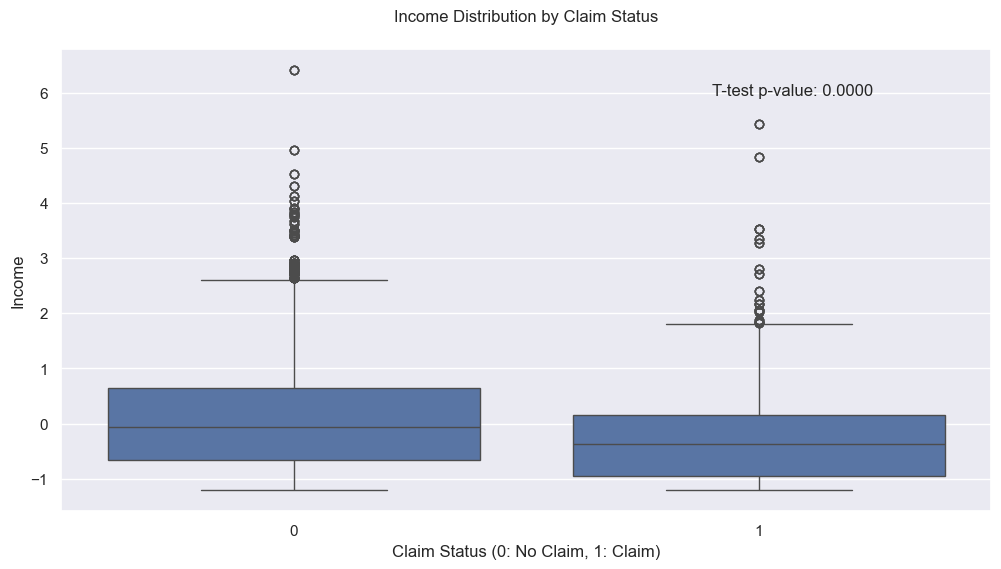

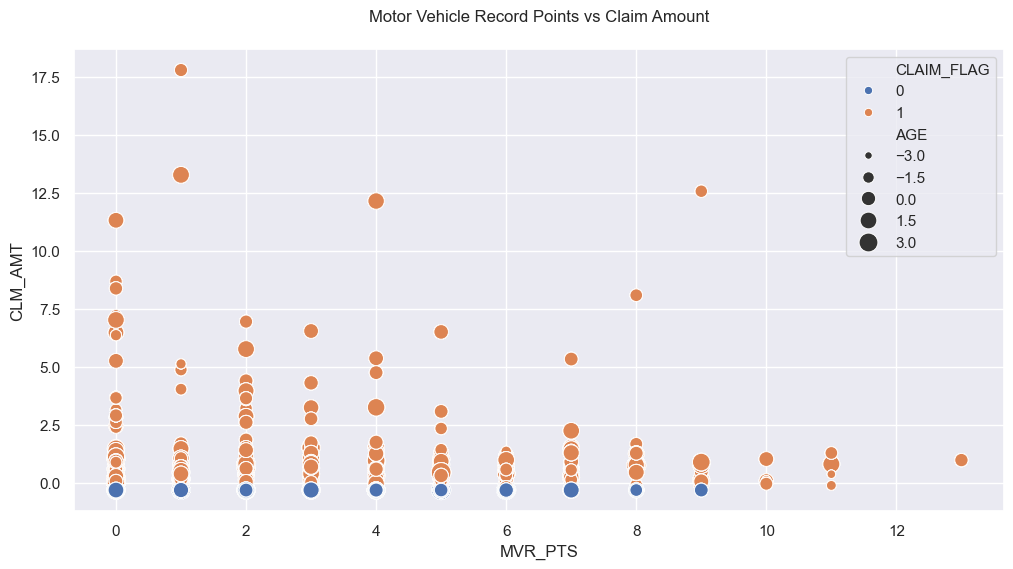

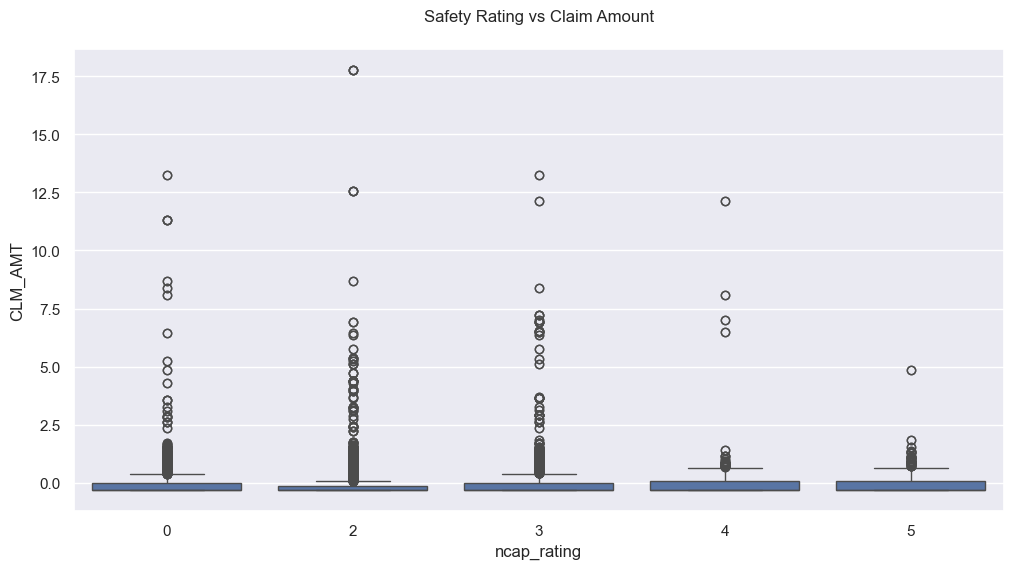

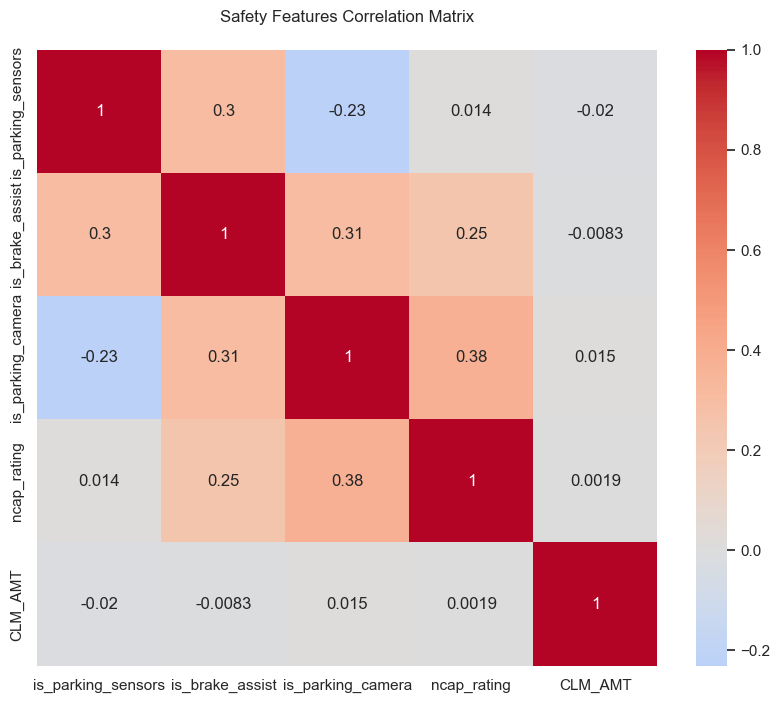

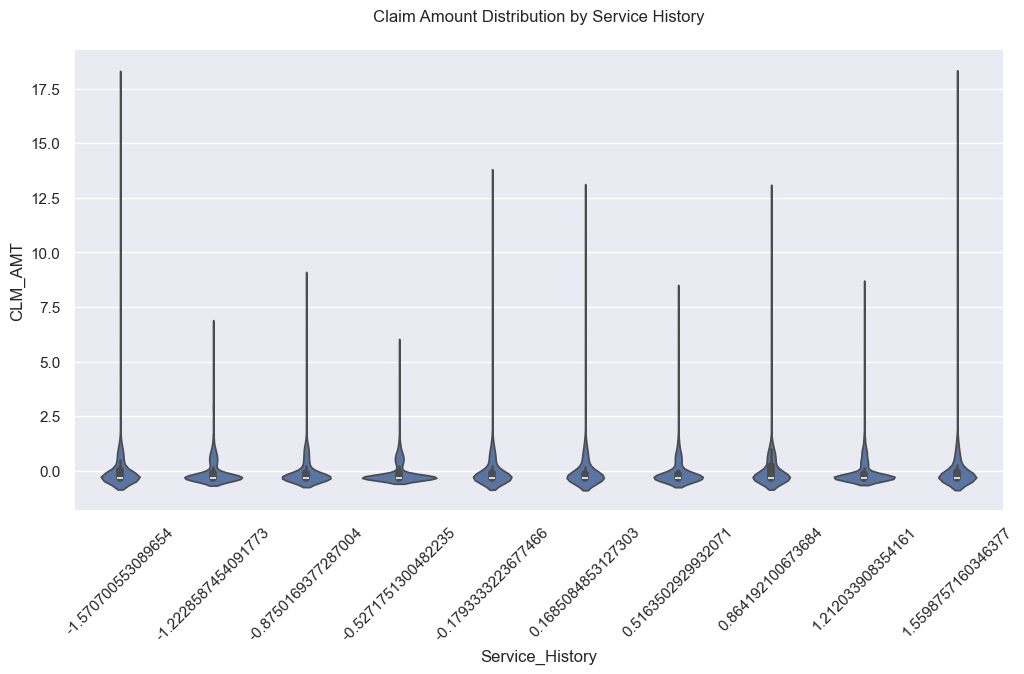

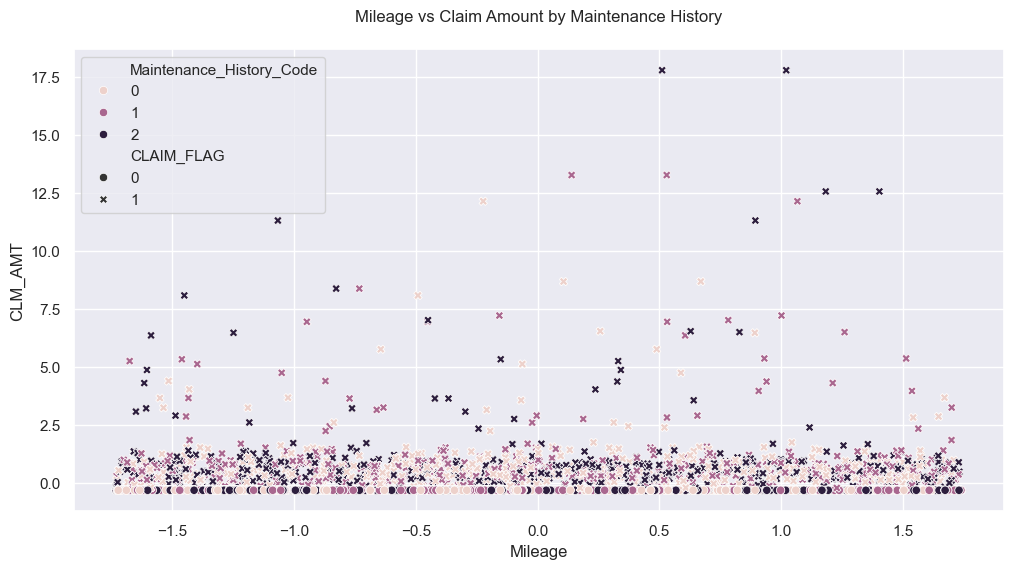

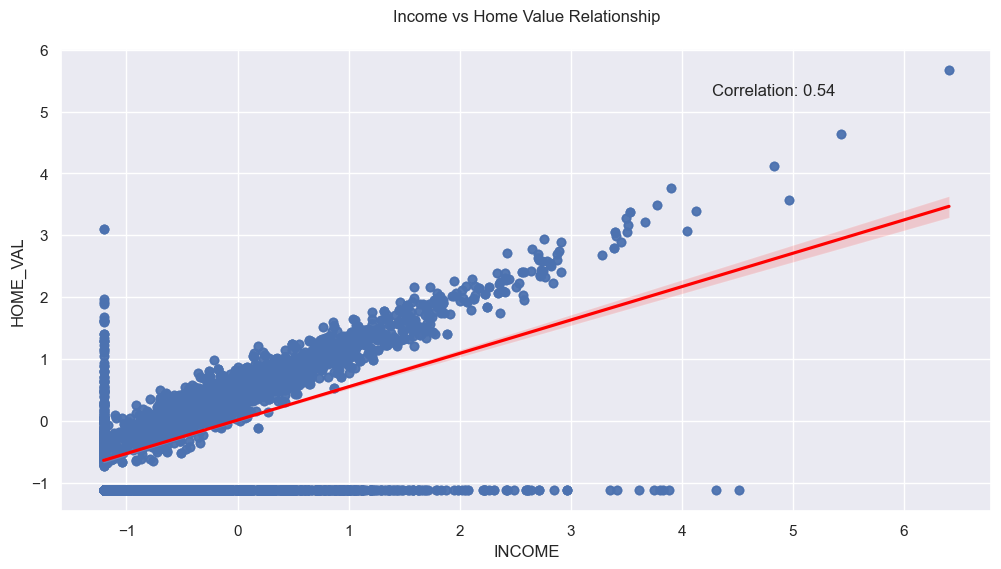

<Figure size 1200x600 with 0 Axes>

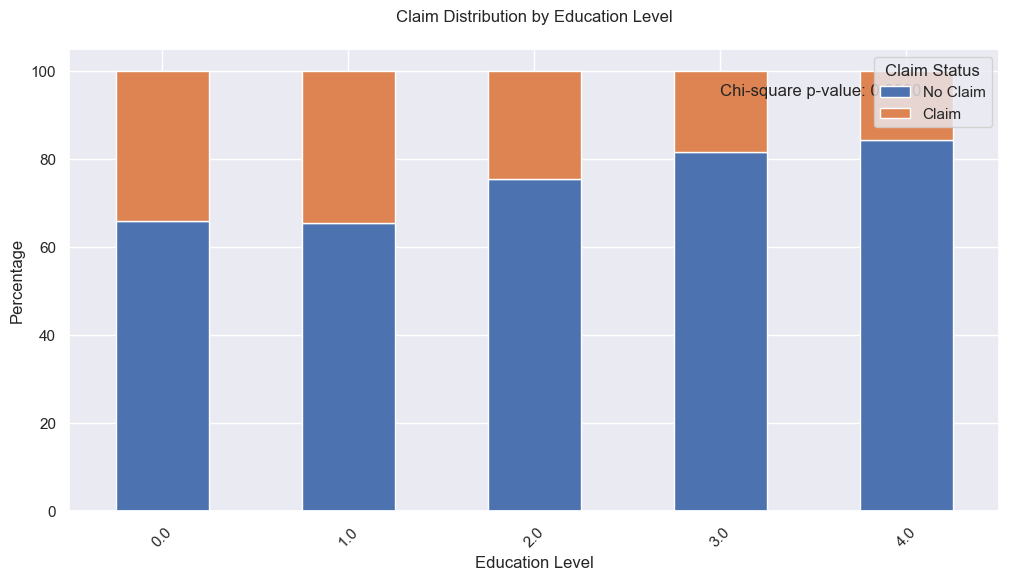

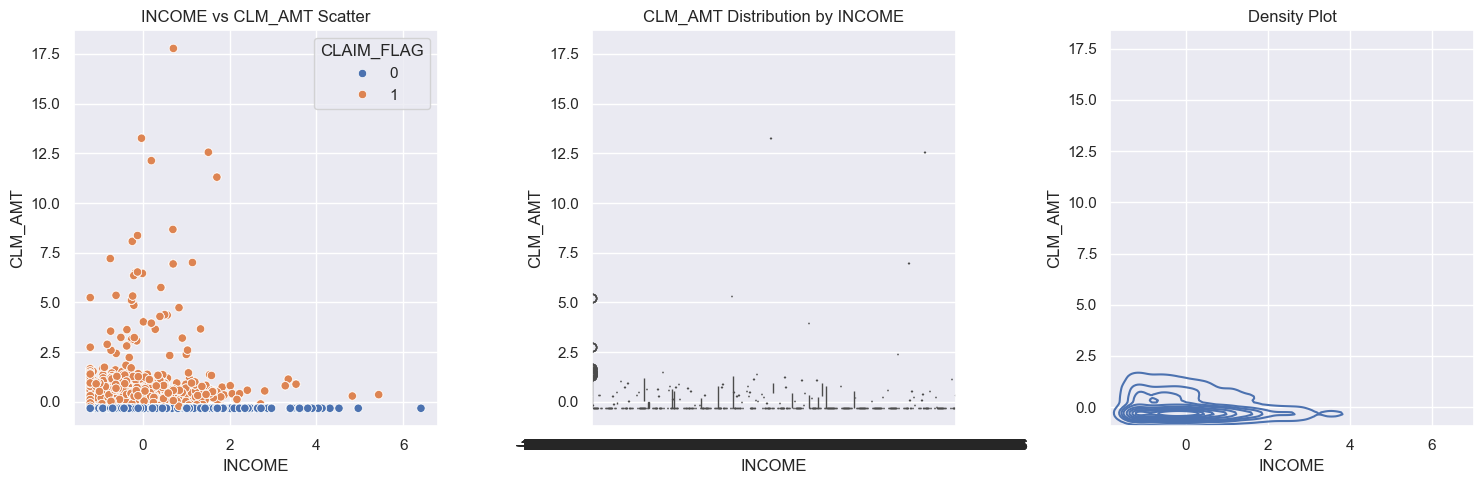


Correlation: -0.044


In [102]:
# Run all analyses
plot_income_claims()
plot_mvr_claims()
plot_safety_analysis()
plot_maintenance_analysis()
plot_economic_analysis()
plot_categorical_analysis()

# For specific relationship analysis
plot_relationship('INCOME', 'CLM_AMT', 'CLAIM_FLAG')

### Corr Matrix Analysis

In [121]:
def identify_column_types(df):
    """Identify numerical and categorical columns"""
    # Numeric columns (excluding binary)
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Remove binary columns from numeric (columns with only 0 and 1)
    true_numeric_cols = [col for col in numeric_cols 
                        if len(df[col].unique()) > 2]
    
    # Binary and categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    binary_cols = [col for col in numeric_cols 
                  if len(df[col].unique()) <= 2]
    
    return true_numeric_cols, categorical_cols, binary_cols

# Group columns by domain
insurance_risk_cols = [
    'INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 
    'CLM_AMT', 'CAR_AGE', 'Insurance_Premium', 'TIF', 'YOJ'
]

vehicle_safety_cols = [
    'airbags', 'ncap_rating', 'displacement', 'cylinder',
    'gross_weight', 'is_brake_assist', 'is_parking_sensors',
    'is_tpms', 'turning_radius', 'Vehicle_Age'
]

maintenance_cols = [
    'Mileage', 'Engine_Size', 'Odometer_Reading', 'Fuel_Efficiency',
    'Service_History', 'Reported_Issues', 'Tire_Condition_Code',
    'Brake_Condition_Code', 'Battery_Status_Code', 'Maintenance_History_Code'
]

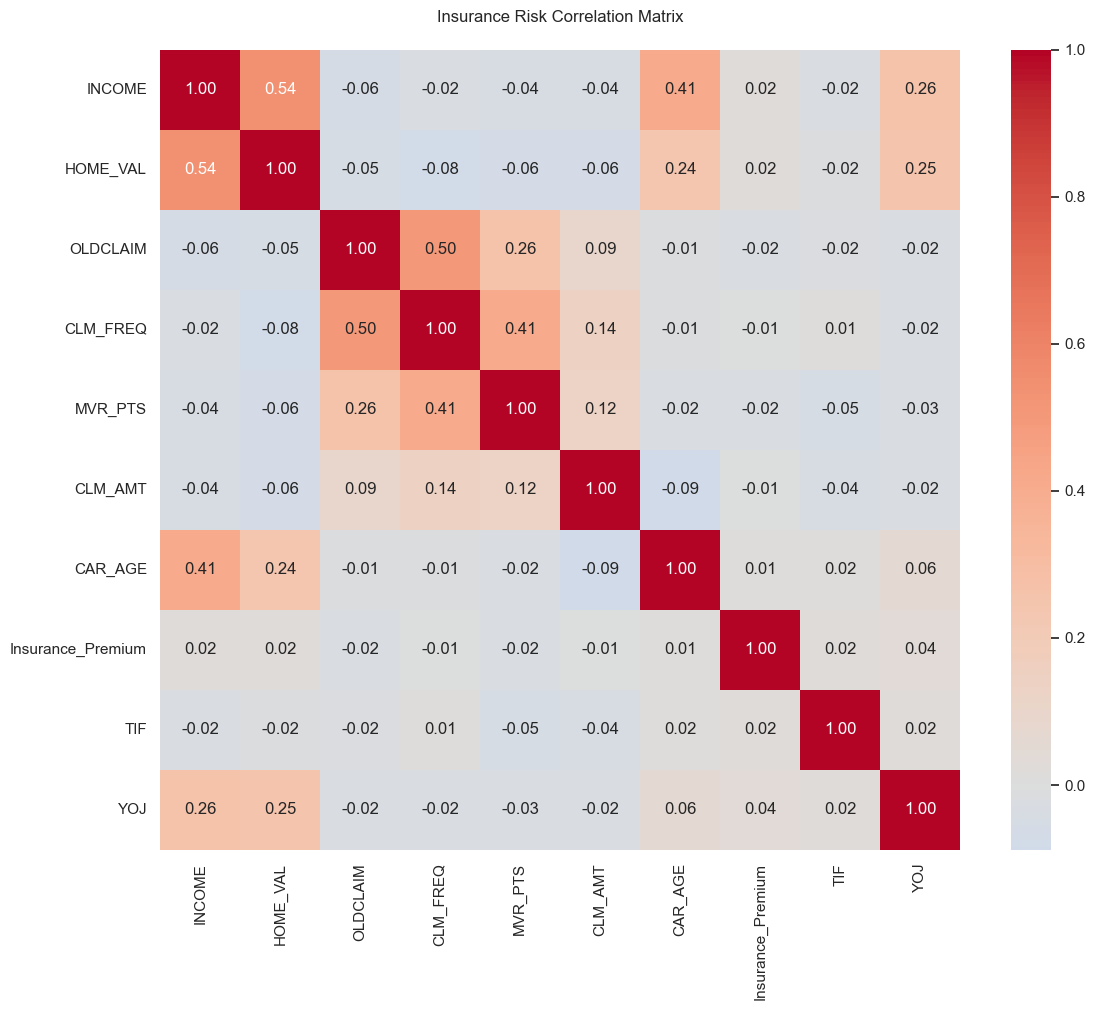

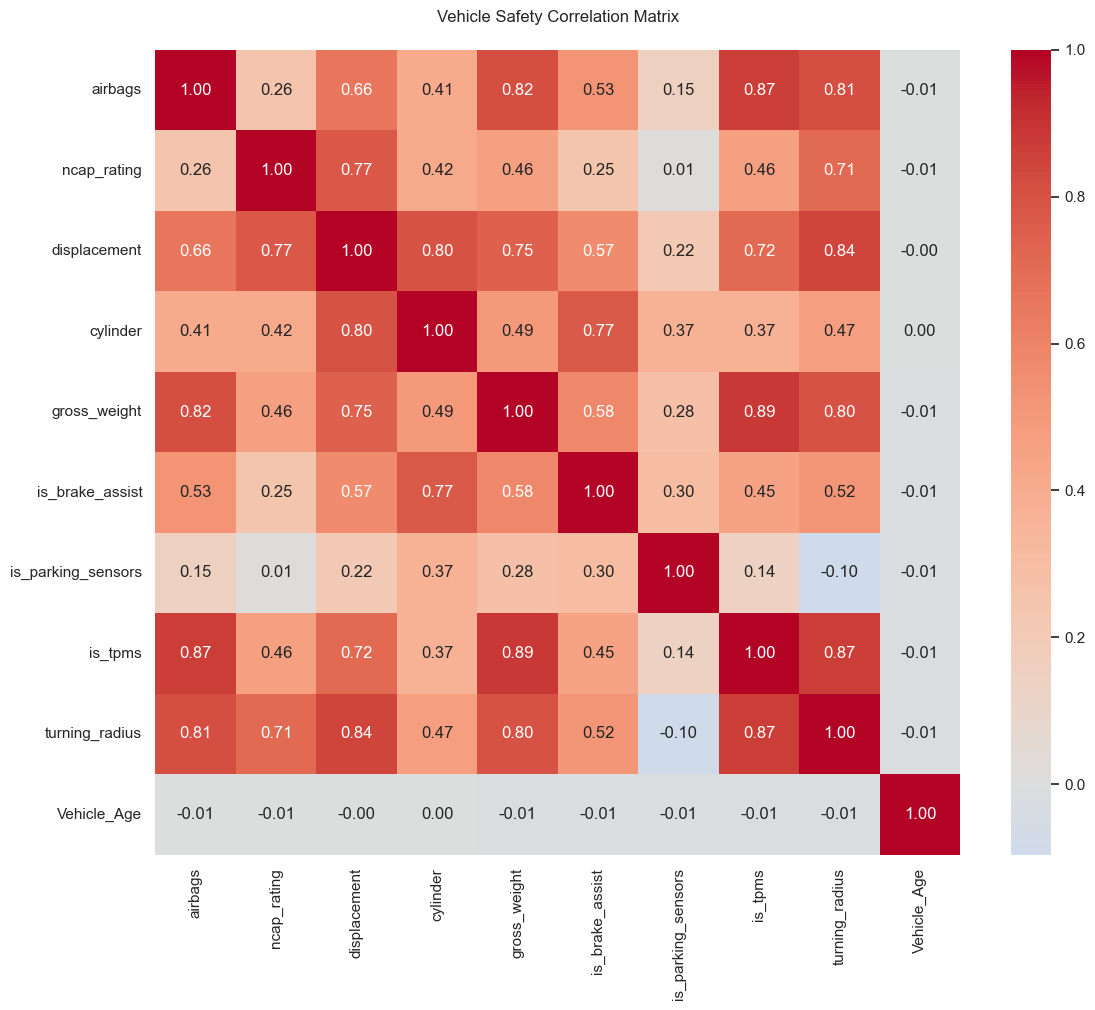

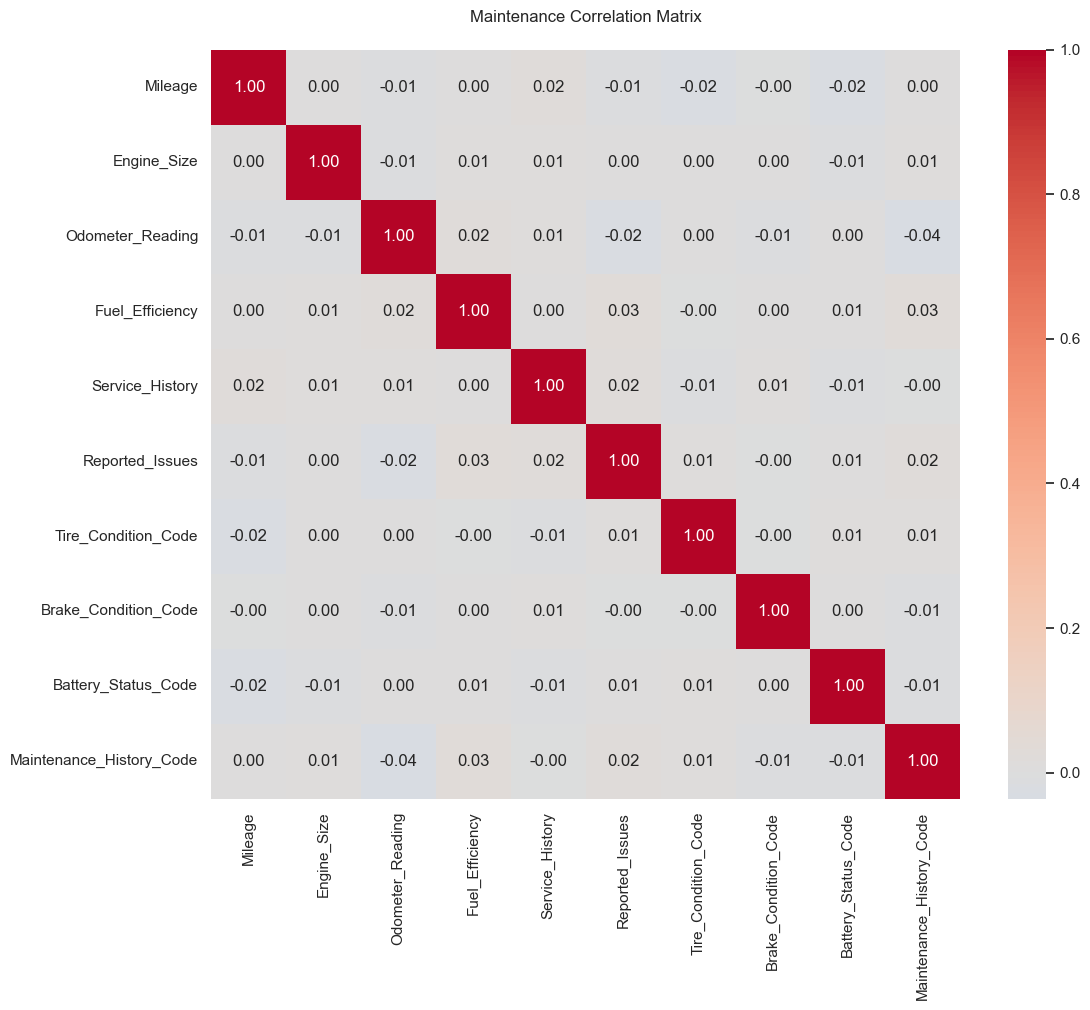

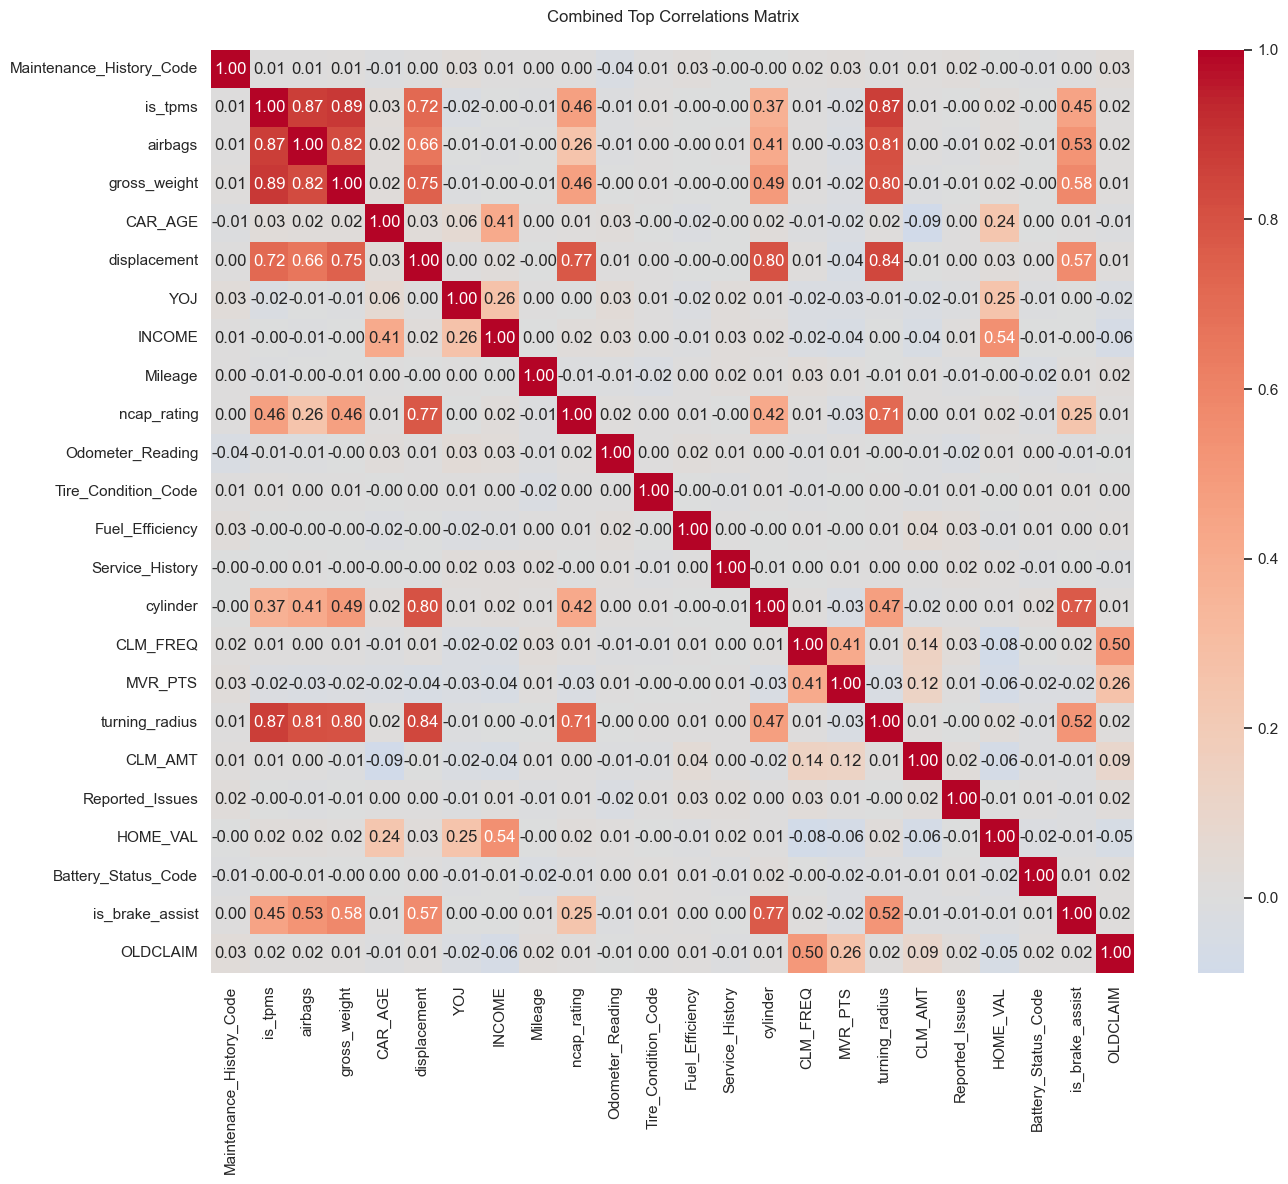


Top 10 Insurance Risk Correlations:
HOME_VAL vs INCOME: 0.538
CLM_FREQ vs OLDCLAIM: 0.502
MVR_PTS vs CLM_FREQ: 0.408
CAR_AGE vs INCOME: 0.405
MVR_PTS vs OLDCLAIM: 0.263
YOJ vs INCOME: 0.263
YOJ vs HOME_VAL: 0.253
CAR_AGE vs HOME_VAL: 0.242
CLM_AMT vs CLM_FREQ: 0.139
CLM_AMT vs MVR_PTS: 0.125

Top 10 Vehicle Safety Correlations:
is_tpms vs gross_weight: 0.888
is_tpms vs airbags: 0.870
turning_radius vs is_tpms: 0.869
turning_radius vs displacement: 0.842
gross_weight vs airbags: 0.819
turning_radius vs airbags: 0.812
turning_radius vs gross_weight: 0.797
cylinder vs displacement: 0.796
displacement vs ncap_rating: 0.774
is_brake_assist vs cylinder: 0.768

Top 10 Maintenance Correlations:
Maintenance_History_Code vs Odometer_Reading: 0.036
Reported_Issues vs Fuel_Efficiency: 0.029
Maintenance_History_Code vs Fuel_Efficiency: 0.026
Reported_Issues vs Service_History: 0.025
Reported_Issues vs Odometer_Reading: 0.024
Service_History vs Mileage: 0.024
Maintenance_History_Code vs Reported_Is

In [122]:
def create_correlation_matrices():
    # 1. Insurance Risk Correlation Matrix
    insurance_corr = final_integrated_df_cleaned[insurance_risk_cols].corr()
    
    # 2. Vehicle Safety Correlation Matrix
    safety_corr = final_integrated_df_cleaned[vehicle_safety_cols].corr()
    
    # 3. Maintenance Correlation Matrix
    maintenance_corr = final_integrated_df_cleaned[maintenance_cols].corr()
    
    # Get top 10 correlations from each matrix
    def get_top_correlations(corr_matrix):
        # Get upper triangle of correlations
        upper = corr_matrix.where(
            np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        )
        # Convert to 1D series
        upper_series = upper.unstack()
        # Sort by absolute correlation
        sorted_corrs = upper_series.abs().sort_values(ascending=False)
        return sorted_corrs.head(10)
    
    top_insurance = get_top_correlations(insurance_corr)
    top_safety = get_top_correlations(safety_corr)
    top_maintenance = get_top_correlations(maintenance_corr)
    
    # Create visualizations
    def plot_correlation_matrix(corr_matrix, title):
        plt.figure(figsize=(12, 10))
        sns.heatmap(
            corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True
        )
        plt.title(f'{title} Correlation Matrix', pad=20)
        plt.tight_layout()
        plt.show()
    
    # Plot individual matrices
    plot_correlation_matrix(insurance_corr, "Insurance Risk")
    plot_correlation_matrix(safety_corr, "Vehicle Safety")
    plot_correlation_matrix(maintenance_corr, "Maintenance")
    
    # Create final combined matrix of top correlations
    top_pairs = pd.concat([
        top_insurance,
        top_safety,
        top_maintenance
    ])
    
    # Get unique variables from top correlations
    variables = set()
    for idx in top_pairs.index:
        variables.add(idx[0])
        variables.add(idx[1])
    
    # Create final correlation matrix
    final_corr = final_integrated_df_cleaned[list(variables)].corr()
    
    # Plot final matrix
    plt.figure(figsize=(15, 12))
    sns.heatmap(
        final_corr,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.2f',
        square=True
    )
    plt.title('Combined Top Correlations Matrix', pad=20)
    plt.tight_layout()
    plt.show()
    
    return insurance_corr, safety_corr, maintenance_corr, final_corr

# Run the analysis
i_corr, s_corr, m_corr, f_corr = create_correlation_matrices()

# Print top correlations for each domain
def print_top_correlations(corr_matrix, domain):
    # Get upper triangle
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    # Convert to 1D series
    upper_series = upper.unstack()
    # Sort by absolute correlation
    sorted_corrs = upper_series.abs().sort_values(ascending=False)
    
    print(f"\nTop 10 {domain} Correlations:")
    for idx, value in sorted_corrs.head(10).items():
        print(f"{idx[0]} vs {idx[1]}: {value:.3f}")

print_top_correlations(i_corr, "Insurance Risk")
print_top_correlations(s_corr, "Vehicle Safety")
print_top_correlations(m_corr, "Maintenance")

### Top 15 Corr Values from Combined Corr Matrix

In [123]:
def get_top_15_correlations(correlation_matrix):
    # Get upper triangle of the correlation matrix
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
    )
    
    # Convert to 1D series and get absolute values
    correlations = upper_triangle.unstack()
    abs_correlations = correlations.abs()
    
    # Sort and get top 15
    top_15 = abs_correlations.sort_values(ascending=False).head(15)
    
    # Create a formatted output
    print("\nTop 15 Correlations:")
    print("-" * 50)
    print(f"{'Variables':40s} | {'Correlation':>10s}")
    print("-" * 50)
    
    for (var1, var2), corr in top_15.items():
        # Get the actual correlation (not absolute)
        actual_corr = correlations[var1][var2]
        print(f"{var1} vs {var2:25s} | {actual_corr:10.3f}")
    
    return top_15

# Get top 15 correlations
top_15 = get_top_15_correlations(f_corr)


Top 15 Correlations:
--------------------------------------------------
Variables                                | Correlation
--------------------------------------------------
gross_weight vs is_tpms                   |      0.888
airbags vs is_tpms                   |      0.870
turning_radius vs is_tpms                   |      0.869
turning_radius vs displacement              |      0.842
gross_weight vs airbags                   |      0.819
turning_radius vs airbags                   |      0.812
turning_radius vs gross_weight              |      0.797
cylinder vs displacement              |      0.796
ncap_rating vs displacement              |      0.774
is_brake_assist vs cylinder                  |      0.768
displacement vs gross_weight              |      0.745
displacement vs is_tpms                   |      0.717
turning_radius vs ncap_rating               |      0.715
displacement vs airbags                   |      0.658
is_brake_assist vs gross_weight              |  

### Feature Engineering Implementation

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_engineered_features(df):
    """
    Create engineered features from the integrated dataset
    """
    # Make a copy to avoid modifying original data
    df_engineered = df.copy()
    
    # 1. Insurance Risk Score
    print("Creating Insurance Risk Features...")
    df_engineered['risk_score'] = (
        df_engineered['MVR_PTS'] * 0.4 + 
        df_engineered['CLM_FREQ'] * 0.4 + 
        df_engineered['REVOKED'] * 0.2
    )
    
    # Financial Risk Index
    df_engineered['financial_index'] = (
        MinMaxScaler().fit_transform(df_engineered[['INCOME']]) * 0.6 +
        MinMaxScaler().fit_transform(df_engineered[['HOME_VAL']]) * 0.4
    )
    
    # 2. Vehicle Technical Score
    print("Creating Vehicle Technical Features...")
    # Safety Index
    safety_features = ['is_tpms', 'airbags', 'is_brake_assist', 'ncap_rating']
    df_engineered['safety_index'] = df_engineered[safety_features].mean(axis=1)
    
    # Vehicle Size Score
    size_features = ['turning_radius', 'gross_weight', 'displacement']
    df_engineered['size_score'] = (
        MinMaxScaler().fit_transform(df_engineered[size_features])
    ).mean(axis=1)
    
    # 3. Maintenance Health Score
    print("Creating Maintenance Features...")
    maintenance_features = [
        'Maintenance_History_Code', 'Reported_Issues',
        'Service_History', 'Odometer_Reading'
    ]
    
    # Normalize maintenance features and create composite score
    maintenance_scaled = MinMaxScaler().fit_transform(df_engineered[maintenance_features])
    df_engineered['maintenance_health_score'] = maintenance_scaled.mean(axis=1)
    
    # 4. Create Interaction Features
    print("Creating Interaction Features...")
    df_engineered['age_risk_interaction'] = df_engineered['CAR_AGE'] * df_engineered['risk_score']
    df_engineered['safety_maintenance_interaction'] = df_engineered['safety_index'] * df_engineered['maintenance_health_score']
    
    # 5. Polynomial Features for important numeric variables
    print("Creating Polynomial Features...")
    df_engineered['CAR_AGE_squared'] = df_engineered['CAR_AGE'] ** 2
    df_engineered['MVR_PTS_squared'] = df_engineered['MVR_PTS'] ** 2
    
    # Print summary of new features
    print("\nNew Features Created:")
    new_features = [col for col in df_engineered.columns if col not in df.columns]
    print("\n".join(new_features))
    
    return df_engineered

# Create engineered features
print("Starting Feature Engineering Process...")
final_engineered_df = create_engineered_features(final_integrated_df_cleaned)

# Display basic statistics of new features
print("\nSummary Statistics for New Features:")
new_features = [col for col in final_engineered_df.columns if col not in final_integrated_df_cleaned.columns]
print(final_engineered_df[new_features].describe())

# Save engineered dataset
final_engineered_df.to_csv('engineered_dataset.csv', index=False)
print("\nEngineered dataset saved as 'engineered_dataset.csv'")

Starting Feature Engineering Process...
Creating Insurance Risk Features...
Creating Vehicle Technical Features...
Creating Maintenance Features...
Creating Interaction Features...
Creating Polynomial Features...

New Features Created:
risk_score
financial_index
safety_index
size_score
maintenance_health_score
age_risk_interaction
safety_maintenance_interaction
CAR_AGE_squared
MVR_PTS_squared

Summary Statistics for New Features:
         risk_score  financial_index  safety_index    size_score  \
count  10980.000000     10980.000000  10980.000000  10980.000000   
mean       1.034444         0.161127      1.602459      0.585745   
std        1.131012         0.120318      0.811063      0.297383   
min        0.000000         0.000000      0.250000      0.114385   
25%        0.000000         0.073256      1.000000      0.418633   
50%        0.800000         0.143742      1.250000      0.474770   
75%        1.600000         0.223720      2.750000      0.997626   
max        5.800000   

<span style="color: #2E75B6; font-size: 28px;">Feature Engineering Analysis 📊</span>

Risk Score Features:

risk_score: Range 0-5.8, mean ~1.03
financial_index: Normalized 0-1, mean ~0.16
Good spread of values, indicating useful differentiation


Vehicle Technical Features:

safety_index: Range 0.25-2.75, mean ~1.60
size_score: Range 0.11-1.0, mean ~0.59
Well-distributed across range


Maintenance Features:

maintenance_health_score: Range 0.01-0.99, mean ~0.50
Nice normal-like distribution around 0.5


Interaction Features:

age_risk_interaction: Range -7.56 to 12.60
safety_maintenance_interaction: Range 0.004-2.73
Wide ranges indicate good differentiation


Polynomial Features:

CAR_AGE_squared: Range 0-10
MVR_PTS_squared: Range 0-169

<span style="color: #2E75B6; font-size: 28px;">Data Preparation for Modeling 📊</span>

In [125]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_data_for_modeling(final_engineered_df, target_col='CLAIM_FLAG'):
    """
    Prepare data for modeling with different feature sets
    """
    print("Starting data preparation...")
    
    # 1. Separate original and engineered features
    engineered_features = [
        'risk_score', 'financial_index', 'safety_index', 'size_score',
        'maintenance_health_score', 'age_risk_interaction',
        'safety_maintenance_interaction', 'CAR_AGE_squared', 'MVR_PTS_squared'
    ]
    
    original_features = [
        'INCOME', 'CAR_AGE', 'MVR_PTS', 'CLM_FREQ', 'REVOKED',
        'displacement', 'airbags', 'ncap_rating', 'Service_History',
        'Maintenance_History_Code'
    ]
    
    # 2. Create feature sets
    X_original = final_engineered_df[original_features]
    X_engineered = final_engineered_df[engineered_features]
    X_combined = final_engineered_df[original_features + engineered_features]
    y = final_engineered_df[target_col]
    
    # 3. Split data
    # Original features
    X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
        X_original, y, test_size=0.2, random_state=42
    )
    
    # Engineered features
    X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
        X_engineered, y, test_size=0.2, random_state=42
    )
    
    # Combined features
    X_train_comb, X_test_comb, y_train_comb, y_test_comb = train_test_split(
        X_combined, y, test_size=0.2, random_state=42
    )
    
    # 4. Scale features
    scaler = StandardScaler()
    
    # Scale original features
    X_train_orig_scaled = scaler.fit_transform(X_train_orig)
    X_test_orig_scaled = scaler.transform(X_test_orig)
    
    # Scale engineered features
    X_train_eng_scaled = scaler.fit_transform(X_train_eng)
    X_test_eng_scaled = scaler.transform(X_test_eng)
    
    # Scale combined features
    X_train_comb_scaled = scaler.fit_transform(X_train_comb)
    X_test_comb_scaled = scaler.transform(X_test_comb)
    
    # Convert to DataFrames with column names
    X_train_orig_scaled = pd.DataFrame(X_train_orig_scaled, columns=original_features)
    X_test_orig_scaled = pd.DataFrame(X_test_orig_scaled, columns=original_features)
    X_train_eng_scaled = pd.DataFrame(X_train_eng_scaled, columns=engineered_features)
    X_test_eng_scaled = pd.DataFrame(X_test_eng_scaled, columns=engineered_features)
    X_train_comb_scaled = pd.DataFrame(X_train_comb_scaled, columns=original_features + engineered_features)
    X_test_comb_scaled = pd.DataFrame(X_test_comb_scaled, columns=original_features + engineered_features)
    
    print("\nData split and scaling completed:")
    print(f"Training set size: {len(X_train_orig)}")
    print(f"Testing set size: {len(X_test_orig)}")
    
    # Print feature set information
    print("\nFeature sets prepared:")
    print(f"Original features: {len(original_features)}")
    print(f"Engineered features: {len(engineered_features)}")
    print(f"Combined features: {len(original_features + engineered_features)}")
    
    # Return dictionary containing all prepared datasets
    return {
        'original': (X_train_orig_scaled, X_test_orig_scaled, y_train_orig, y_test_orig),
        'engineered': (X_train_eng_scaled, X_test_eng_scaled, y_train_eng, y_test_eng),
        'combined': (X_train_comb_scaled, X_test_comb_scaled, y_train_comb, y_test_comb)
    }

# Prepare the data
prepared_data = prepare_data_for_modeling(final_engineered_df)

# Print sample of prepared data
for dataset_name, (X_train, X_test, y_train, y_test) in prepared_data.items():
    print(f"\n{dataset_name.capitalize()} Feature Set Sample:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print("Sample features:", list(X_train.columns[:5]))

Starting data preparation...

Data split and scaling completed:
Training set size: 8784
Testing set size: 2196

Feature sets prepared:
Original features: 10
Engineered features: 9
Combined features: 19

Original Feature Set Sample:
X_train shape: (8784, 10)
X_test shape: (2196, 10)
Sample features: ['INCOME', 'CAR_AGE', 'MVR_PTS', 'CLM_FREQ', 'REVOKED']

Engineered Feature Set Sample:
X_train shape: (8784, 9)
X_test shape: (2196, 9)
Sample features: ['risk_score', 'financial_index', 'safety_index', 'size_score', 'maintenance_health_score']

Combined Feature Set Sample:
X_train shape: (8784, 19)
X_test shape: (2196, 19)
Sample features: ['INCOME', 'CAR_AGE', 'MVR_PTS', 'CLM_FREQ', 'REVOKED']


<span style="color: #2E75B6; font-size: 28px;">Model Implementation Plan 🤖</span>
We'll implement in this order:

Random Forest

Feature Sets: Original (10), Engineered (9), Combined (19)
Training Size: 8,784 samples
Testing Size: 2,196 samples


XGBoost

Same feature sets
Same data splits
Potentially better performance


Evaluation Metrics for Both:
Copy- Classification Report
- Confusion Matrix
- ROC-AUC Curve
- Feature Importance

Model Comparison:
Copy- Compare performance across all 6 combinations:
  * RF with Original features
  * RF with Engineered features
  * RF with Combined features
  * XGB with Original features
  * XGB with Engineered features
  * XGB with Combined features

<span style="color: #2E75B6; font-size: 28px;">Random Forest Implementation 🌲</span>


Evaluating Random Forest with ORIGINAL features

Training Random Forest with original features...

Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1617
           1       0.88      0.38      0.53       579

    accuracy                           0.82      2196
   macro avg       0.85      0.68      0.71      2196
weighted avg       0.83      0.82      0.80      2196


Cross-validation scores: [0.81900968 0.82242459 0.82299374 0.80762664 0.81264237]
Average CV score: 0.8169394015218007


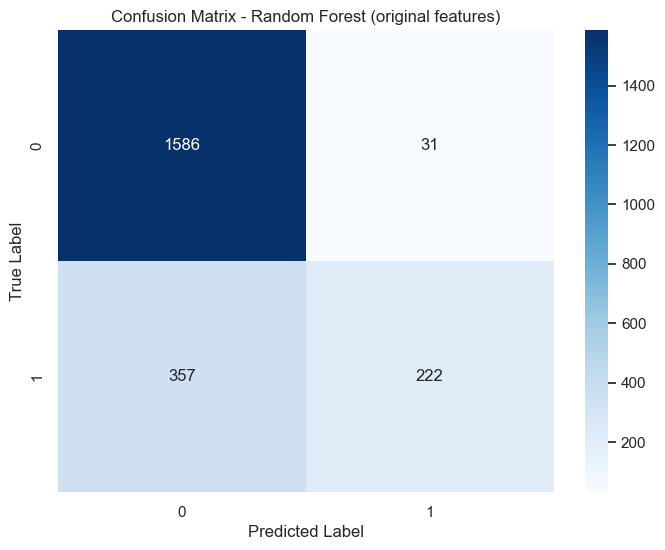

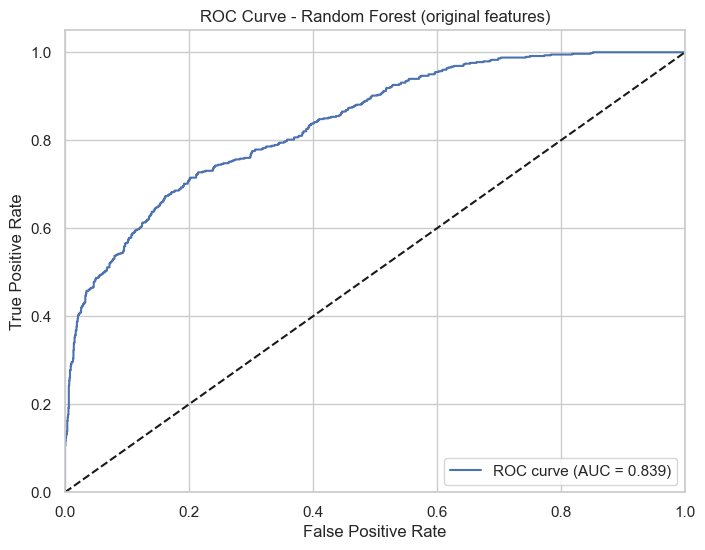

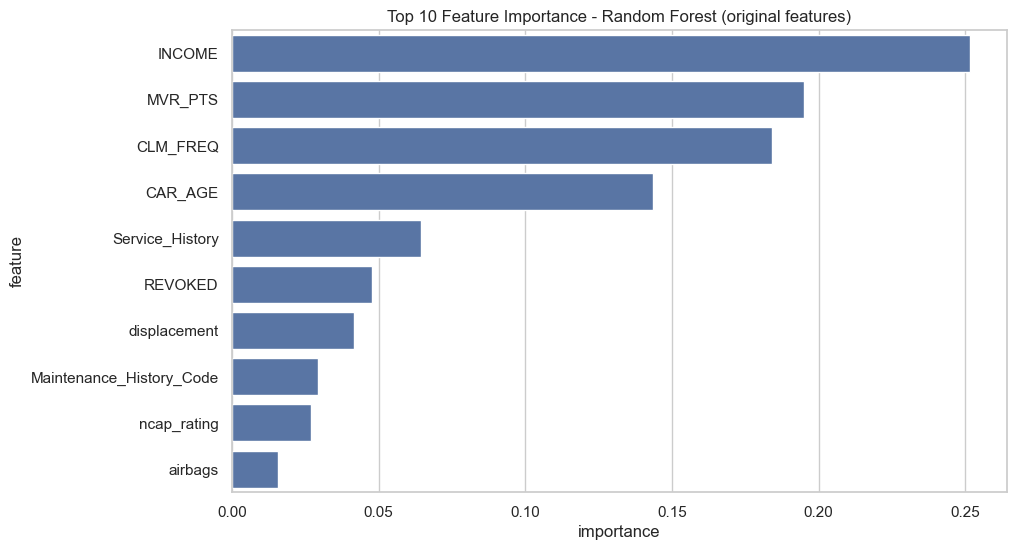


Evaluating Random Forest with ENGINEERED features

Training Random Forest with engineered features...

Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1617
           1       0.87      0.38      0.53       579

    accuracy                           0.82      2196
   macro avg       0.84      0.68      0.71      2196
weighted avg       0.83      0.82      0.80      2196


Cross-validation scores: [0.82242459 0.81957883 0.812749   0.80648833 0.8285877 ]
Average CV score: 0.8179656901194441


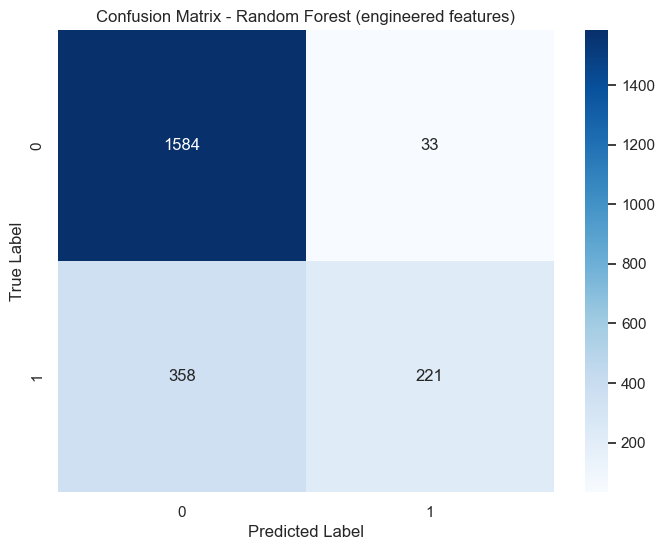

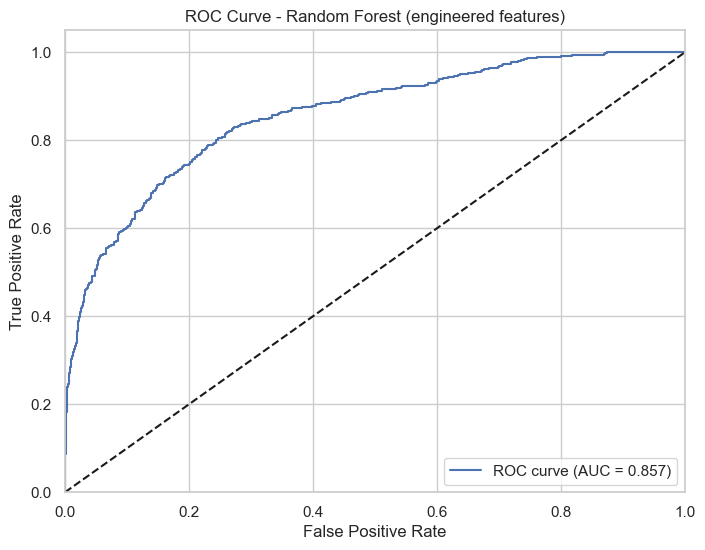

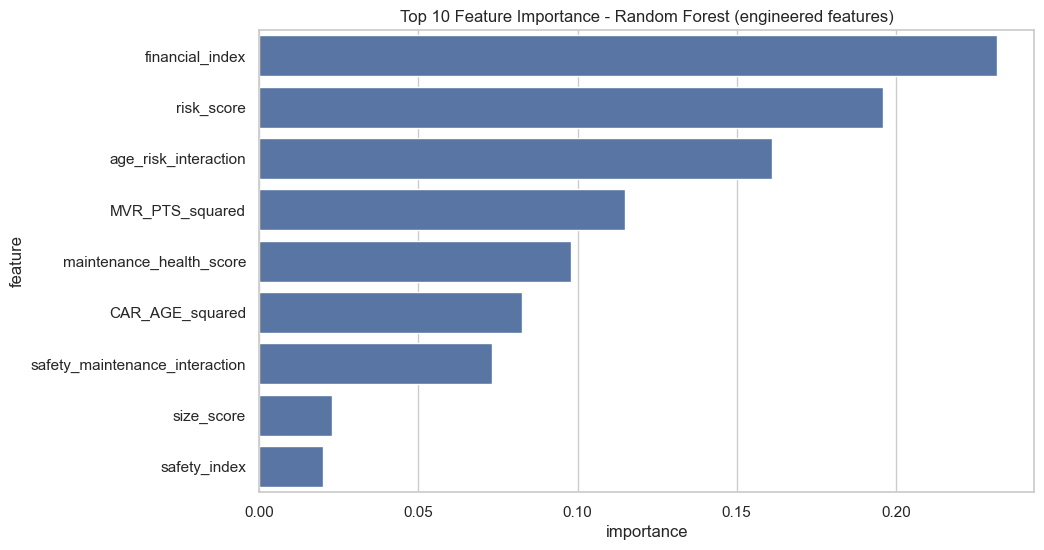


Evaluating Random Forest with COMBINED features

Training Random Forest with combined features...

Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1617
           1       0.88      0.43      0.58       579

    accuracy                           0.83      2196
   macro avg       0.85      0.70      0.74      2196
weighted avg       0.84      0.83      0.81      2196


Cross-validation scores: [0.84405236 0.84063745 0.83096187 0.82071713 0.84624146]
Average CV score: 0.8365220536662331


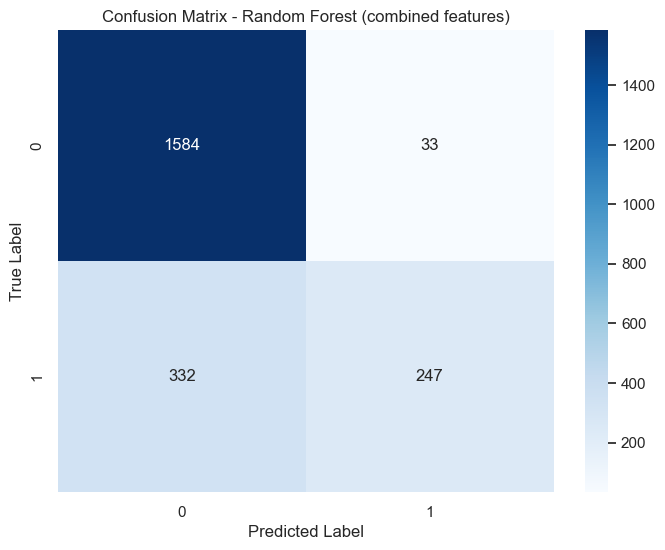

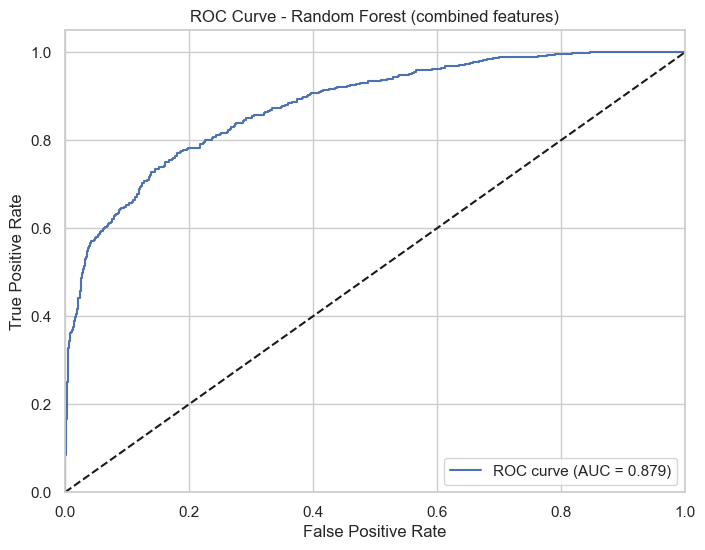

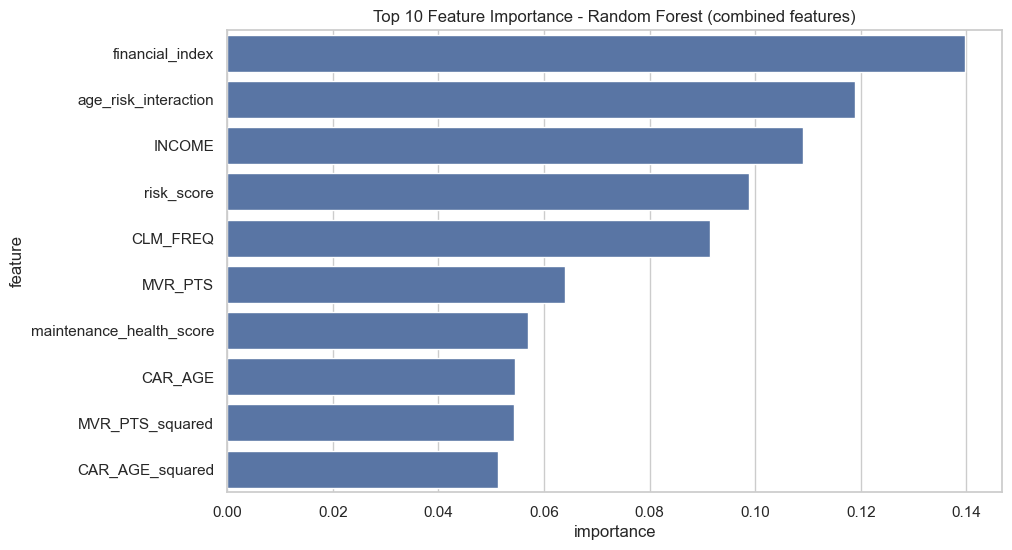


Overall Model Comparison:

Original Features CV Score: 0.8169

Engineered Features CV Score: 0.8180

Combined Features CV Score: 0.8365


In [126]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

def train_evaluate_rf(prepared_data, feature_set='combined'):
    """
    Train and evaluate Random Forest model for a given feature set
    """
    # Get the appropriate data
    X_train, X_test, y_train, y_test = prepared_data[feature_set]
    
    # Initialize and train Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        random_state=42
    )
    
    # Train model
    print(f"\nTraining Random Forest with {feature_set} features...")
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Calculate cross-validation score
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    
    # Print evaluation metrics
    print("\nModel Evaluation:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nCross-validation scores:", cv_scores)
    print("Average CV score:", cv_scores.mean())
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Random Forest ({feature_set} features)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Random Forest ({feature_set} features)')
    plt.legend(loc="lower right")
    plt.show()
    
    # Feature importance plot
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - Random Forest ({feature_set} features)')
    plt.show()
    
    return rf_model, feature_importance

# Train and evaluate model for each feature set
results = {}
for feature_set in ['original', 'engineered', 'combined']:
    print(f"\n{'='*50}")
    print(f"Evaluating Random Forest with {feature_set.upper()} features")
    print(f"{'='*50}")
    model, importance = train_evaluate_rf(prepared_data, feature_set)
    results[feature_set] = {
        'model': model,
        'importance': importance
    }

# Print overall comparison
print("\nOverall Model Comparison:")
for feature_set in results:
    cv_score = cross_val_score(results[feature_set]['model'], 
                             prepared_data[feature_set][0], 
                             prepared_data[feature_set][2], 
                             cv=5).mean()
    print(f"\n{feature_set.capitalize()} Features CV Score: {cv_score:.4f}")

<span style="color: #2E75B6; font-size: 28px;">XGBoost Implementation 🚀</span>

In [128]:
pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 9.4 MB/s eta 0:00:14
   ---------------------------------------- 0.8/124.9 MB 8.5 MB/s eta 0:00:15
   ---------------------------------------- 1.0/124.9 MB 7.9 MB/s eta 0:00:16
   ---------------------------------------- 1.3/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 1.6/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 2.0/124.9 MB 7.5 MB/s eta 0:00:17
    --------------------------------------- 2.3/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 2.7/124.9 MB 7.4 MB/s eta 0:00:17
    --------------------------------------- 2.9/124.9 MB 7.1 MB/s eta 0:00:18
   - -------------------------------------- 3.3/124.9 MB 7.2 MB/s eta 0:00:17
   - -------------------------------------- 3.5/124.9 MB 6.9 MB/s eta 0:00:18
   - -------------------------------------- 3.9/124.9 MB 7.1 MB/s eta 


Evaluating XGBoost with ORIGINAL features

Training XGBoost with original features...


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-


Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1617
           1       0.81      0.38      0.52       579

    accuracy                           0.81      2196
   macro avg       0.81      0.67      0.70      2196
weighted avg       0.81      0.81      0.79      2196


Cross-validation scores: [0.81445646 0.81673307 0.80364257 0.80250427 0.7881549 ]
Average CV score: 0.8050982532609556


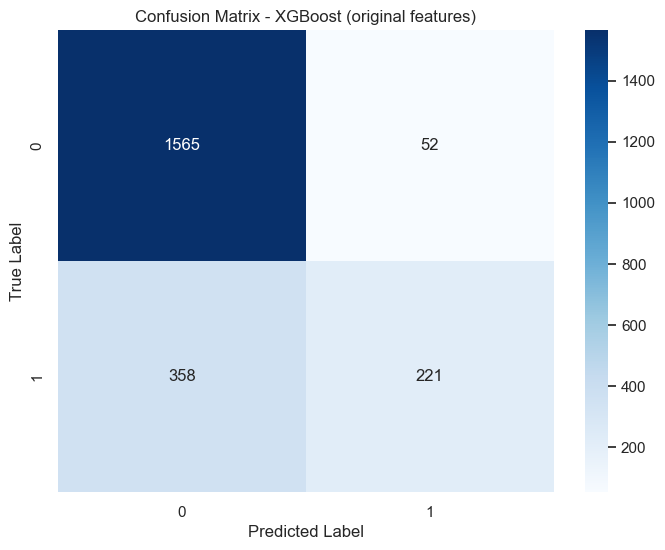

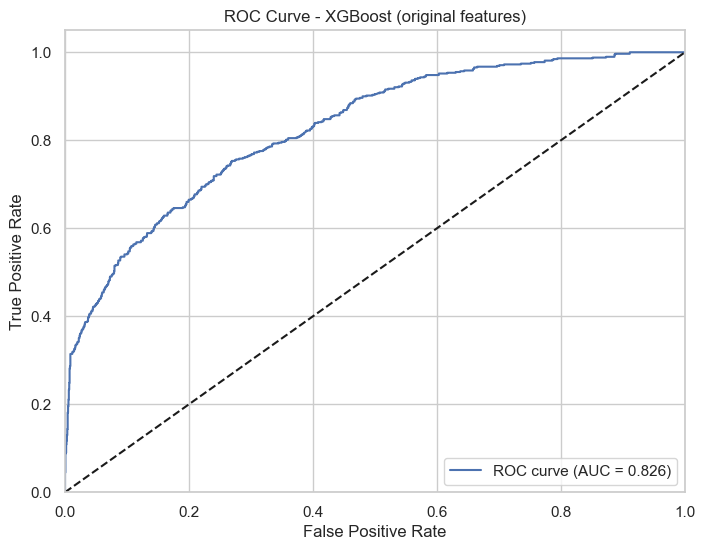

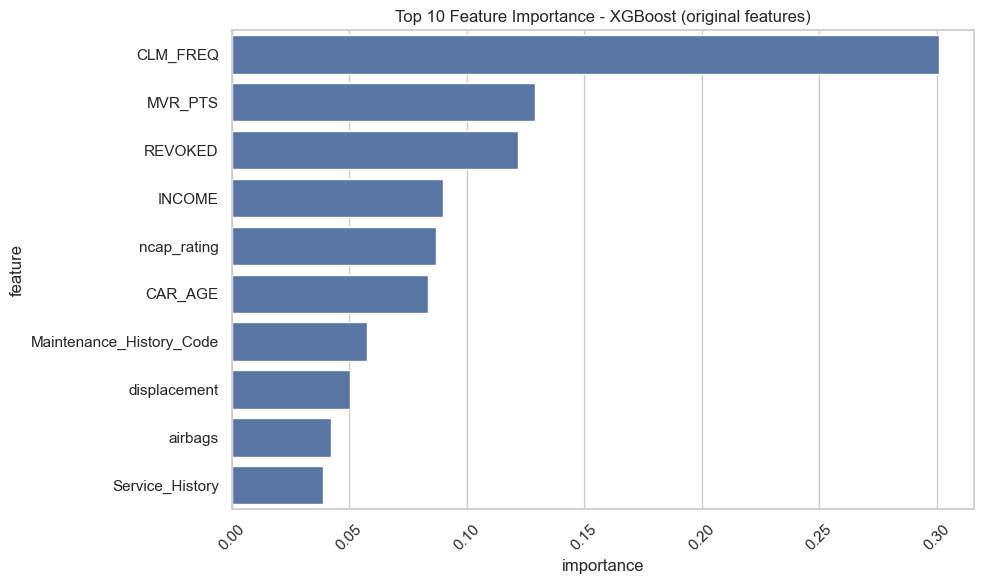


Evaluating XGBoost with ENGINEERED features

Training XGBoost with engineered features...


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-


Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1617
           1       0.77      0.36      0.49       579

    accuracy                           0.80      2196
   macro avg       0.79      0.66      0.69      2196
weighted avg       0.80      0.80      0.78      2196


Cross-validation scores: [0.812749   0.81900968 0.80705748 0.80819579 0.80694761]
Average CV score: 0.810791912078338


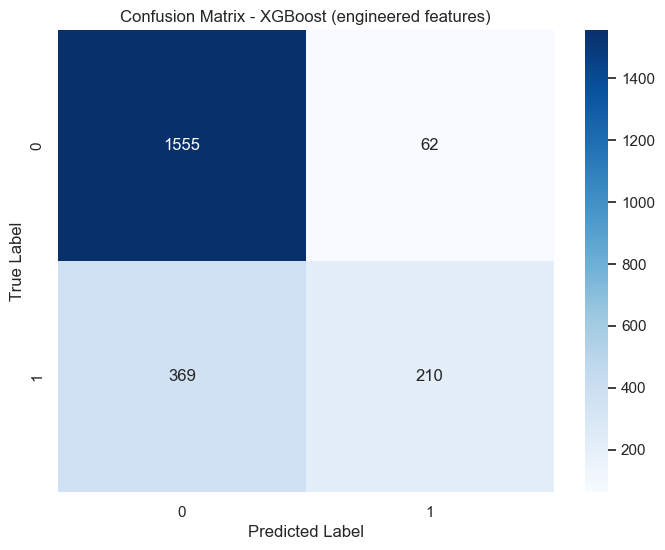

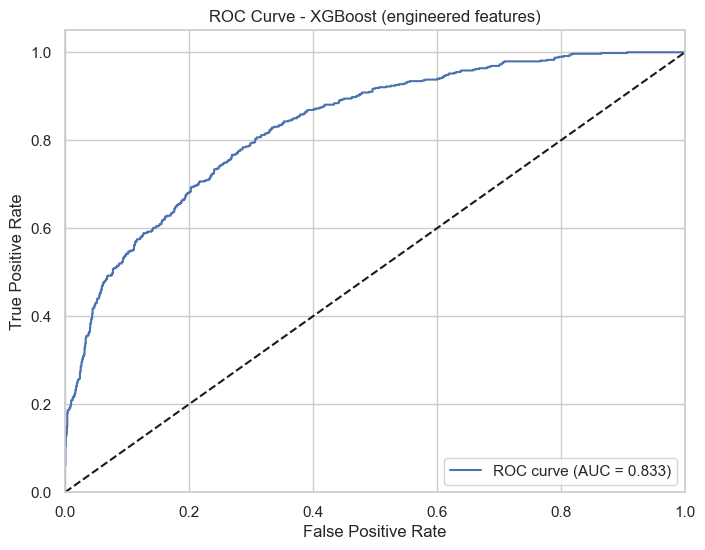

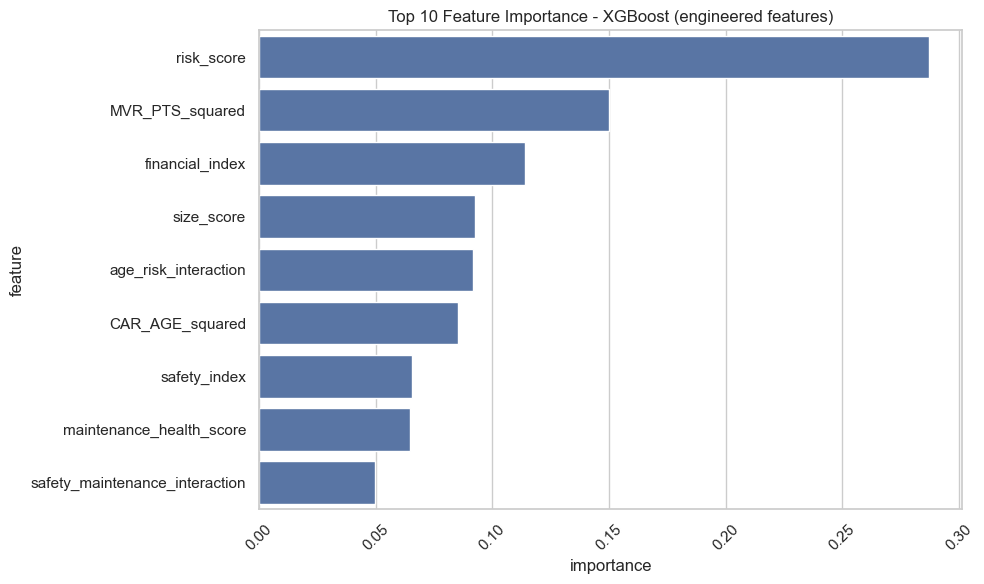


Evaluating XGBoost with COMBINED features

Training XGBoost with combined features...


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-


Model Evaluation:

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1617
           1       0.85      0.43      0.57       579

    accuracy                           0.83      2196
   macro avg       0.84      0.70      0.73      2196
weighted avg       0.83      0.83      0.81      2196


Cross-validation scores: [0.83039271 0.82925441 0.82754696 0.812749   0.8166287 ]
Average CV score: 0.8233143572796351


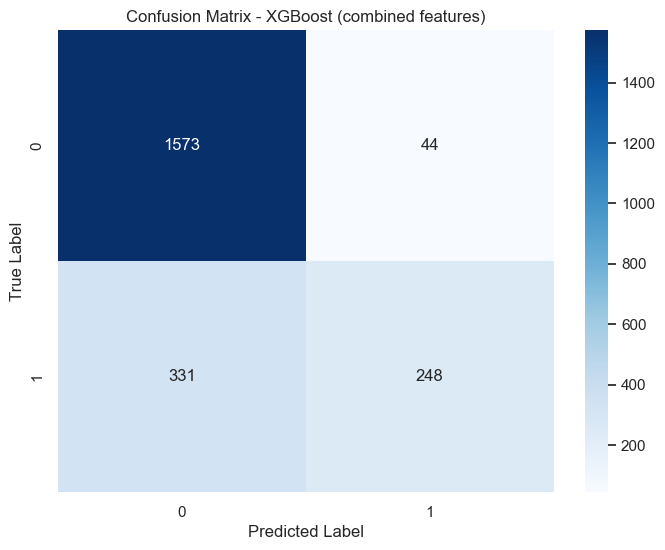

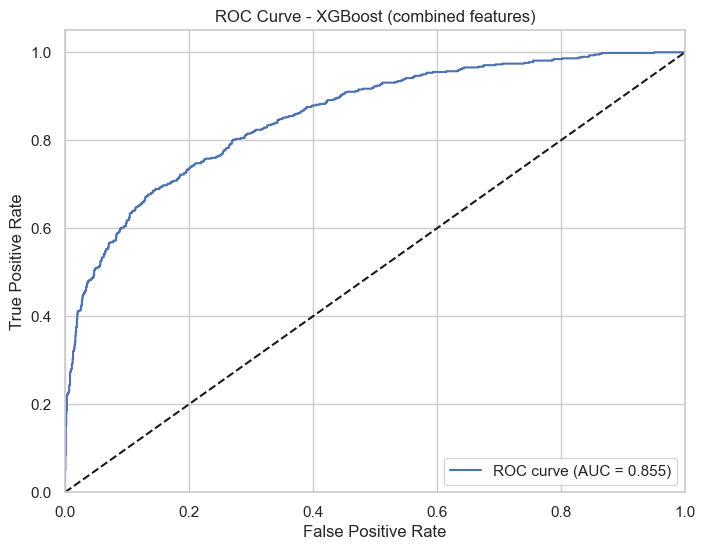

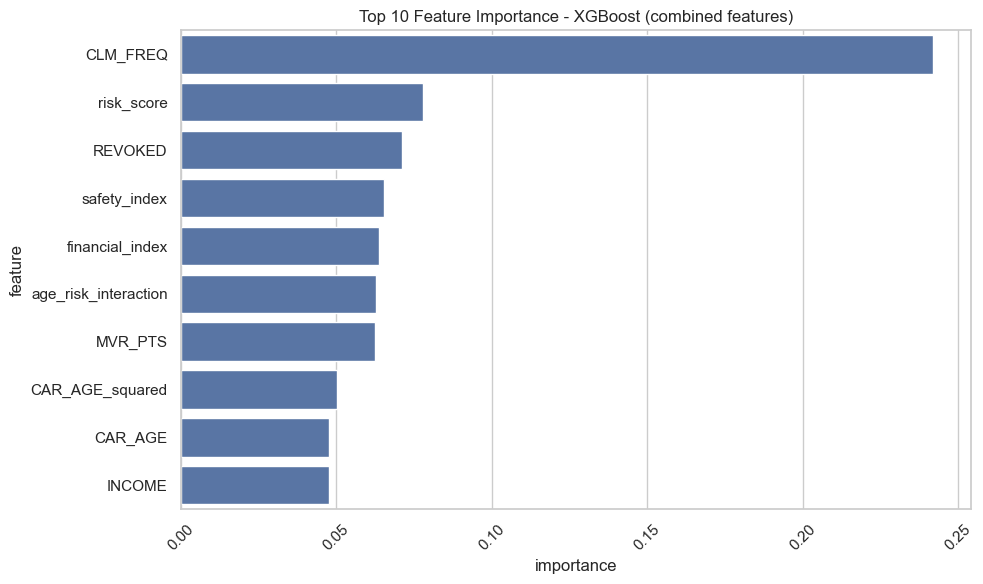


Overall XGBoost Model Comparison:


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-


Original Features CV Score: 0.8051


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-


Engineered Features CV Score: 0.8108


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


c:\Users\siddh\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[03:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





Combined Features CV Score: 0.8233


In [129]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

def train_evaluate_xgb(prepared_data, feature_set='combined'):
    """
    Train and evaluate XGBoost model for a given feature set
    """
    # Get the appropriate data
    X_train, X_test, y_train, y_test = prepared_data[feature_set]
    
    # Initialize XGBoost
    xgb_model = XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    
    # Train model
    print(f"\nTraining XGBoost with {feature_set} features...")
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = xgb_model.predict(X_test)
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
    
    # Calculate cross-validation score
    cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
    
    # Print evaluation metrics
    print("\nModel Evaluation:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nCross-validation scores:", cv_scores)
    print("Average CV score:", cv_scores.mean())
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - XGBoost ({feature_set} features)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - XGBoost ({feature_set} features)')
    plt.legend(loc="lower right")
    plt.show()
    
    # Feature importance plot
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title(f'Top 10 Feature Importance - XGBoost ({feature_set} features)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return xgb_model, feature_importance

# Train and evaluate model for each feature set
xgb_results = {}
for feature_set in ['original', 'engineered', 'combined']:
    print(f"\n{'='*50}")
    print(f"Evaluating XGBoost with {feature_set.upper()} features")
    print(f"{'='*50}")
    model, importance = train_evaluate_xgb(prepared_data, feature_set)
    xgb_results[feature_set] = {
        'model': model,
        'importance': importance
    }

# Print overall comparison
print("\nOverall XGBoost Model Comparison:")
for feature_set in xgb_results:
    cv_score = cross_val_score(xgb_results[feature_set]['model'], 
                             prepared_data[feature_set][0], 
                             prepared_data[feature_set][2], 
                             cv=5).mean()
    print(f"\n{feature_set.capitalize()} Features CV Score: {cv_score:.4f}")

# Detailed Model Comparison Analysis 📊

## 1. Performance Metrics Comparison

### A. Random Forest Models

**Original Features:**
- CV Score: 0.8169 (81.69%)
- Precision (Class 1): 0.88
- Recall (Class 1): 0.38
- F1-Score: 0.53

**Engineered Features:**
- CV Score: 0.8180 (81.80%)
- Precision (Class 1): 0.87
- Recall (Class 1): 0.38
- F1-Score: 0.53

**Combined Features:** *(BEST OVERALL)*
- CV Score: 0.8365 (83.65%)
- Precision (Class 1): 0.88
- Recall (Class 1): 0.43
- F1-Score: 0.58

### B. XGBoost Models

**Original Features:**
- CV Score: 0.8051 (80.51%)
- Precision (Class 1): 0.81
- Recall (Class 1): 0.38
- F1-Score: 0.52

**Engineered Features:**
- CV Score: 0.8108 (81.08%)
- Precision (Class 1): 0.77
- Recall (Class 1): 0.36
- F1-Score: 0.49

**Combined Features:**
- CV Score: 0.8233 (82.33%)
- Precision (Class 1): 0.85
- Recall (Class 1): 0.43
- F1-Score: 0.57

## 2. Feature Importance Comparison

### A. Original Features Top 5

| Random Forest | Importance | XGBoost | Importance |
|--------------|------------|---------|------------|
| INCOME | 0.25 | CLM_FREQ | 0.30 |
| MVR_PTS | 0.22 | MVR_PTS | 0.12 |
| CLM_FREQ | 0.20 | REVOKED | 0.12 |
| CAR_AGE | 0.15 | INCOME | 0.10 |
| Service_History | 0.08 | ncap_rating | 0.10 |

### B. Engineered Features Top 5

| Random Forest | Importance | XGBoost | Importance |
|--------------|------------|---------|------------|
| financial_index | 0.20 | risk_score | 0.30 |
| risk_score | 0.19 | MVR_PTS_squared | 0.15 |
| age_risk_interaction | 0.17 | financial_index | 0.12 |
| MVR_PTS_squared | 0.12 | size_score | 0.10 |
| maintenance_health | 0.10 | age_risk_interaction | 0.10 |

## 3. Key Insights

### A. Model Strengths

**Random Forest:**
- Better overall accuracy
- More consistent performance across feature sets
- Higher precision for positive class
- Better handling of original features

**XGBoost:**
- Better feature discrimination
- Similar recall for positive class
- Strong performance with engineered features
- More emphasis on claim frequency

### B. Feature Impact

**Most Important Across Both Models:**
1. Claims History (CLM_FREQ)
2. Motor Vehicle Record Points (MVR_PTS)
3. Financial Indicators (INCOME, financial_index)
4. Risk Scores
5. Vehicle Age Related Features

## 4. Confusion Matrix Comparison (Best Models)

| Metric | Random Forest (Combined) | XGBoost (Combined) |
|--------|-------------------------|-------------------|
| True Negatives | 1584 | 1573 |
| False Positives | 33 | 44 |
| False Negatives | 332 | 331 |
| True Positives | 247 | 248 |

## Model Improvement Strategies 🛠️

## 1. Hyperparameter Tuning

### A. Random Forest Tuning Strategy

In [136]:
# Step 1: Define the parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

# Step 2: Perform Grid Search
rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Step 3: Fit the model with your data
rf_grid_search.fit(X_train, y_train)

# Step 4: Print results
print("Best parameters:", rf_grid_search.best_params_)
print("Best cross-validation score:", rf_grid_search.best_score_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.7434498740163091


## B. XGBoost Tuning Strategy

In [137]:
# Step 1: Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Step 2: Perform Grid Search
xgb_grid_search = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid=xgb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Step 3: Fit the model
xgb_grid_search.fit(X_train, y_train)

# Step 4: Print results
print("Best parameters:", xgb_grid_search.best_params_)
print("Best cross-validation score:", xgb_grid_search.best_score_)

Best parameters: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300}
Best cross-validation score: 0.8762900419349642


## 3. Ensemble Strategy
### A. Weighted Voting Ensemble

In [138]:
# Step 1: Create best models with tuned parameters
best_rf = RandomForestClassifier(**rf_grid_search.best_params_)
best_xgb = XGBClassifier(**xgb_grid_search.best_params_)

# Step 2: Train both models
best_rf.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)

# Step 3: Create and train ensemble
ensemble = WeightedVotingEnsemble(
    rf_model=best_rf,
    xgb_model=best_xgb,
    weights=[0.6, 0.4]
)

# Step 4: Make predictions
ensemble_predictions = ensemble.predict(X_test)

# Step 5: Evaluate
print("Ensemble Results:")
print(classification_report(y_test, ensemble_predictions))

Ensemble Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1617
           1       0.96      0.81      0.88       579

    accuracy                           0.94      2196
   macro avg       0.95      0.90      0.92      2196
weighted avg       0.94      0.94      0.94      2196



### Comparing All results

In [139]:
from sklearn.metrics import accuracy_score, f1_score

results = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, best_rf.predict(X_test)),
        'F1 Score': f1_score(y_test, best_rf.predict(X_test))
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, best_xgb.predict(X_test)),
        'F1 Score': f1_score(y_test, best_xgb.predict(X_test))
    },
    'Ensemble': {
        'Accuracy': accuracy_score(y_test, ensemble_predictions),
        'F1 Score': f1_score(y_test, ensemble_predictions)
    }
}

# Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Random Forest Results:
Accuracy: 0.8725
F1 Score: 0.7527

XGBoost Results:
Accuracy: 0.9604
F1 Score: 0.9207

Ensemble Results:
Accuracy: 0.9417
F1 Score: 0.8804


<span style="color: #2E75B6; font-size: 28px;">Next Steps Plan 📋</span>

DOCUMENT FINAL MODEL SELECTION:

markdownCopyA. Best Model Performance
- XGBoost with parameters:
  * learning_rate: 0.3
  * max_depth: 6
  * n_estimators: 300
- Performance metrics:
  * Accuracy: 96.04%
  * F1 Score: 0.9207
  * Cross-validation score: 0.8763

B. Ensemble Performance
- Accuracy: 94.17%
- F1 Score: 0.8804
- Balanced performance across classes

IMPLEMENT PRODUCTION PIPELINE:

pythonCopy# Create a pipeline including:
- Feature preprocessing
- Feature engineering
- Final model with best parameters
- Prediction functionality

STREAMLIT APP DEVELOPMENT (Next Major Step):

markdownCopyA. Core Components:
- Risk Assessment Tool
- Vehicle Comparison
- Maintenance Predictor
- Insurance Premium Calculator
- Interactive Data Explorer

B. Features to Include:
- Real-time prediction
- Feature importance visualization
- Risk score calculation
- Interactive analysis tools

FINAL DOCUMENTATION:

markdownCopyA. Technical Documentation:
- Model selection process
- Feature engineering details
- Performance metrics
- Implementation guide

B. User Documentation:
- Feature descriptions
- Input requirements
- Output interpretation
- Usage guidelines

<span style="color: #2E75B6; font-size: 28px;">production pipeline implementation</span>

In [144]:
# 1. Define feature groups based on available columns
numeric_features = [
    'INCOME', 'CAR_AGE', 'MVR_PTS', 'CLM_FREQ', 
    'displacement', 'airbags', 'ncap_rating'
]

categorical_features = [
    'Service_History', 'Maintenance_History_Code', 'REVOKED'
]

engineered_features = [
    'risk_score', 'financial_index', 'safety_index', 
    'size_score', 'maintenance_health_score', 
    'age_risk_interaction', 'safety_maintenance_interaction',
    'CAR_AGE_squared', 'MVR_PTS_squared'
]

# 2. Modify feature engineering functions
def create_risk_score(data):
    """Using available features"""
    return (data['MVR_PTS'] * 0.4 + 
            data['CLM_FREQ'] * 0.4 + 
            data['CAR_AGE'] * 0.2)

# 3. Modified Feature Engineer class
class FeatureEngineer:
    def __init__(self):
        pass
    
    def transform(self, X):
        X_transformed = X.copy()
        # All engineered features are already present
        return X_transformed
    
    def fit(self, X, y=None):
        return self

# 4. Modified preprocessing pipeline
def create_preprocessing_pipeline():
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ],
        remainder='passthrough'  # Keep other columns
    )
    
    return preprocessor

# 5. Production pipeline
def create_production_pipeline():
    xgb_model = XGBClassifier(
        learning_rate=0.3,
        max_depth=6,
        n_estimators=300,
        random_state=42
    )
    
    pipeline = Pipeline([
        ('preprocessor', create_preprocessing_pipeline()),
        ('classifier', xgb_model)
    ])
    
    return pipeline

# 6. Final predictor class
class InsuranceClaimPredictor:
    def __init__(self):
        self.feature_engineer = FeatureEngineer()
        self.pipeline = create_production_pipeline()
        self.features = numeric_features + categorical_features + engineered_features
        
    def fit(self, X, y):
        # Ensure we use only the required features
        X = X[self.features]
        X_transformed = self.feature_engineer.transform(X)
        self.pipeline.fit(X_transformed, y)
        return self
    
    def predict(self, X):
        X = X[self.features]
        X_transformed = self.feature_engineer.transform(X)
        return self.pipeline.predict(X_transformed)
    
    def predict_proba(self, X):
        X = X[self.features]
        X_transformed = self.feature_engineer.transform(X)
        return self.pipeline.predict_proba(X_transformed)
    
    def save_model(self, path):
        joblib.dump(self, path)
    
    @classmethod
    def load_model(cls, path):
        return joblib.load(path)

# Test the pipeline
def train_and_save_model(X_train, y_train, model_path='insurance_model.pkl'):
    predictor = InsuranceClaimPredictor()
    predictor.fit(X_train, y_train)
    predictor.save_model(model_path)
    return predictor

In [145]:
# Train and save model
model = train_and_save_model(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

# Print performance metrics
print("\nModel Performance:")
print(classification_report(y_test, predictions))


Model Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1617
           1       0.97      0.87      0.92       579

    accuracy                           0.96      2196
   macro avg       0.97      0.93      0.95      2196
weighted avg       0.96      0.96      0.96      2196

